# Fuel Consumption Classification
## Data Mining Assignment 3
### Author: G. Gordon
February 8,2016

In [1]:
# My re-usable variables
my.colors = c('orange','yellow','blue','red','green','brown','cyan','purple','black')
println = function(){
    paste(rep('-',218),collapse='')
}

In [2]:
# Import the fuel data
fueldata = read.csv("fueldata.csv")

In [3]:
"Initial Features"
# Show first 12 records to have a look at the data
head(fueldata,12)
# View summary statistics to get an overview of the data
"Summary Statistics"
println()
summary(fueldata)

[1] "Initial Features"

YR BRAND      MODEL       CLASS ENG CYLINDERS TRANS FUEL CITY_L HWY_L
1  2014 ACURA        ILX     COMPACT 2.0         4   AS5    Z    8.6   5.6
2  2014 ACURA        ILX     COMPACT 2.4         4    M6    Z    9.8   6.5
3  2014 ACURA ILX HYBRID     COMPACT 1.5         4   AV7    Z    5.0   4.8
4  2014 ACURA    MDX 4WD SUV - SMALL 3.5         6   AS6    Z   11.2   7.7
5  2014 ACURA    RDX AWD SUV - SMALL 3.5         6   AS6    Z   10.7   7.3
6  2014 ACURA        RLX    MID-SIZE 3.5         6   AS6    Z   10.5   6.4
7  2014 ACURA         TL    MID-SIZE 3.5         6   AS6    Z   10.4   6.8
8  2014 ACURA     TL AWD    MID-SIZE 3.7         6   AS6    Z   11.4   7.6
9  2014 ACURA     TL AWD    MID-SIZE 3.7         6    M6    Z   11.9   8.0
10 2014 ACURA        TSX     COMPACT 2.4         4   AS5    Z    9.3   6.2
11 2014 ACURA        TSX     COMPACT 2.4         4    M6    Z    9.9   6.8
12 2014 ACURA        TSX     COMPACT 3.5         6   AS5    Z   10.7   7.0
   CITY_MI HWY_MI FUEL_L_YR CO2
1       33     50      1440 166
2       29     43      1660 191
3       56     59       980 113
4       25     37      1920 221
5       26     39      1840 212
6       27     44      1720 198
7       27     42      1760 202
8       25     37      1940 223
9       24     35      2040 235
10      30     46      1580 182
11      29     42      1700 195
12      26     40      1800 207

[1] "Summary Statistics"

[1] "--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------"

       YR                 BRAND              MODEL                 CLASS    
 Min.   :2014   FORD         : 88   F150 FFV    :   8   MID-SIZE      :184  
 1st Qu.:2014   CHEVROLET    : 86   F150 FFV 4X4:   8   COMPACT       :169  
 Median :2014   BMW          : 64   ACCORD      :   6   SUV - SMALL   :154  
 Mean   :2014   MERCEDES-BENZ: 59   BEETLE      :   6   SUV - STANDARD:112  
 3rd Qu.:2014   AUDI         : 49   FOCUS FFV   :   6   FULL-SIZE     : 82  
 Max.   :2014   GMC          : 49   MUSTANG     :   5   TWO-SEATER    : 71  
                (Other)      :666   (Other)     :1022   (Other)       :289  
      ENG          CYLINDERS          TRANS     FUEL        CITY_L     
 Min.   :1.000   Min.   : 3.000   A6     :222   D: 25   Min.   : 3.60  
 1st Qu.:2.000   1st Qu.: 4.000   AS6    :189   E: 92   1st Qu.: 9.00  
 Median :3.400   Median : 6.000   M6     :141   X:508   Median :11.10  
 Mean   :3.356   Mean   : 5.801   A8     : 85   Z:436   Mean   :11.81  
 3rd Qu.:4.300   3rd Qu.

[1] "A closer look at the variety of transmision systems"

Transmission Frequency
1            A4        45
2            A5        30
3            A6       222
4            A7        12
5            A8        85
6            A9         8
7           AM5         2
8           AM6         6
9           AM7        34
10          AS4         1
11          AS5        10
12          AS6       189
13          AS7        77
14          AS8        82
15          AS9         2
16           AV        46
17          AV6         7
18          AV7         4
19          AV8         1
20           M5        48
21           M6       141
22           M7         9

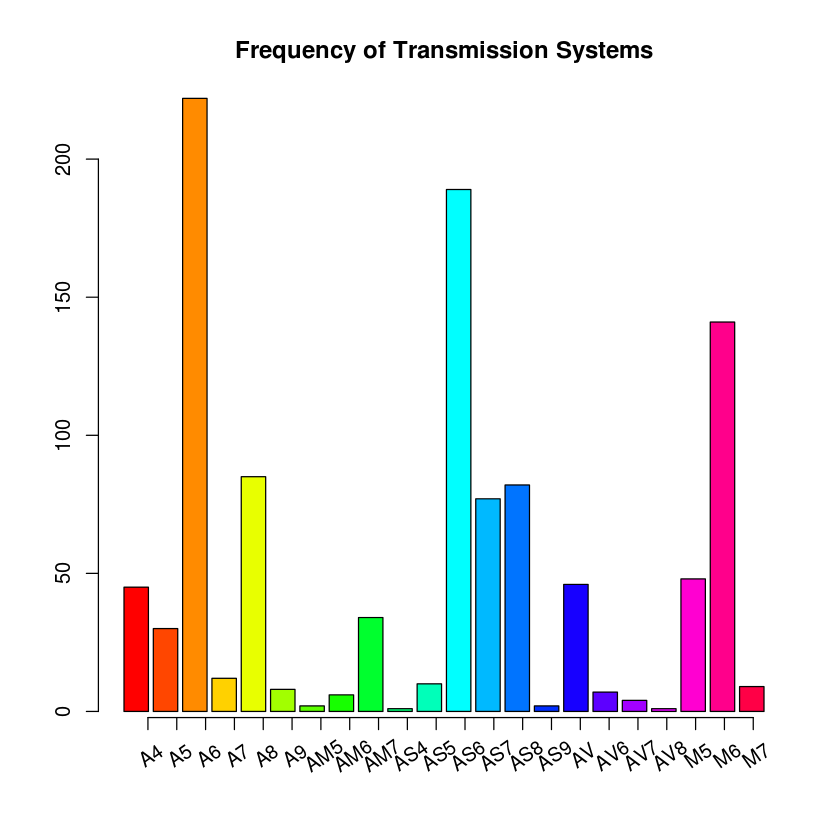

In [4]:
"A closer look at the variety of transmision systems"
k=as.data.frame(t(t(table(fueldata$TRANS))))
k$Var2=NULL
names(k) <- c('Transmission','Frequency')
k
#summary(k)
barplot(k$Frequency,main="Frequency of Transmission Systems",
                    col=rainbow(length(k$Transmission)),names.arg=rep('',length(k$Transmission)))

axis(1, at=seq(1, length(k$Transmission), by=1)*1.18, labels = FALSE)
text(seq(1, length(k$Transmission), by=1)*1.18,-10 , labels = k$Transmission, srt = 35, pos = 1, xpd = TRUE)


In [5]:
# Split Original Transmission Column into additional features (Type,IsCVT, No of Gears)
fuelTransmissions=apply(as.matrix(fueldata$TRAN),1,function(mx){
    li = (strsplit(mx,split="")[[1]])
    if(length(li)==1){ # Cases where transmission is only automatic/manual
        li = c(li,'','')
    }else
    if(length(li)==2){ # cases where only transmission and no. of grears is specified
        if(grepl('[0-9]',paste(li,collapse=''))){
            li = c(li[1],'',li[2])
        }else{
            li = c(li,'')
        }
        
    }
    return (li)
})
fuelTransmissions=as.data.frame(t(fuelTransmissions))

[1] "First 5 Transmissions"

Transmission_Type CVT Gears
1                 A   S     5
2                 M         6
3                 A   V     7
4                 A   S     6
5                 A   S     6
6                 A   S     6

[1] "Summary Statistics for Transmissions"

 Transmission_Type CVT     Gears  
 A:863              :600    : 46  
 M:198             M: 42   4: 46  
                   S:361   5: 90  
                   V: 58   6:565  
                           7:136  
                           8:168  
                           9: 10  

[1] "Distribution of Transmissions across groups"

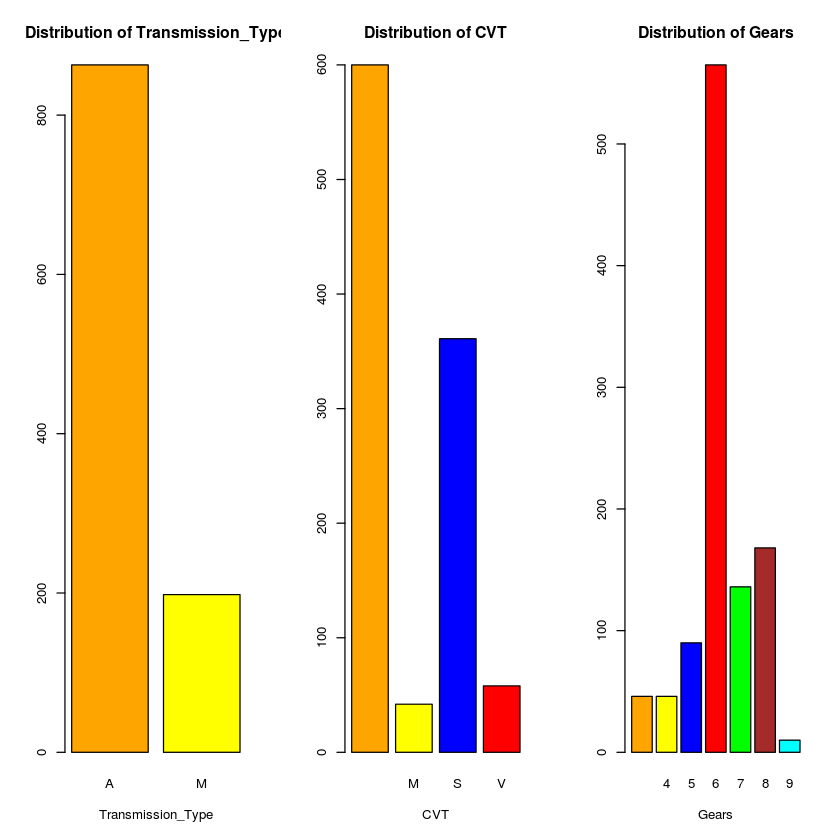

In [6]:

#CVT - http://cars.about.com/od/thingsyouneedtoknow/a/CVT.htm
transmission_labels = c('Transmission_Type','CVT','Gears')
names(fuelTransmissions) <- transmission_labels
"First 5 Transmissions"
head(fuelTransmissions)
"Summary Statistics for Transmissions"
summary(fuelTransmissions)
"Distribution of Transmissions across groups"
par(mfrow=c(1,3))
for(label in transmission_labels){
    barplot(table(fuelTransmissions[label]), 
         main=paste('Distribution of',label),
         xlab=label,
         col=my.colors)
}

In [7]:
# adding new transmissions data
#create copy
fueldata2 = fueldata
for(label in transmission_labels){
    fueldata2[label]=fuelTransmissions[label]
}
"Merged With Transmission Data"
head(fueldata2)

[1] "Merged With Transmission Data"

YR BRAND      MODEL       CLASS ENG CYLINDERS TRANS FUEL CITY_L HWY_L
1 2014 ACURA        ILX     COMPACT 2.0         4   AS5    Z    8.6   5.6
2 2014 ACURA        ILX     COMPACT 2.4         4    M6    Z    9.8   6.5
3 2014 ACURA ILX HYBRID     COMPACT 1.5         4   AV7    Z    5.0   4.8
4 2014 ACURA    MDX 4WD SUV - SMALL 3.5         6   AS6    Z   11.2   7.7
5 2014 ACURA    RDX AWD SUV - SMALL 3.5         6   AS6    Z   10.7   7.3
6 2014 ACURA        RLX    MID-SIZE 3.5         6   AS6    Z   10.5   6.4
  CITY_MI HWY_MI FUEL_L_YR CO2 Transmission_Type CVT Gears
1      33     50      1440 166                 A   S     5
2      29     43      1660 191                 M         6
3      56     59       980 113                 A   V     7
4      25     37      1920 221                 A   S     6
5      26     39      1840 212                 A   S     6
6      27     44      1720 198                 A   S     6

[1] "Unique Combination of Classes ( 15 )"

[1] COMPACT                  SUV - SMALL              MID-SIZE                
 [4] MINICOMPACT              SUBCOMPACT               TWO-SEATER              
 [7] FULL-SIZE                STATION WAGON - SMALL    SUV - STANDARD          
[10] VAN - CARGO              VAN - PASSENGER          PICKUP TRUCK - STANDARD 
[13] MINIVAN                  STATION WAGON - MID-SIZE PICKUP TRUCK - SMALL    
15 Levels: COMPACT FULL-SIZE MID-SIZE MINICOMPACT ... VAN - PASSENGER

COMPACT                FULL-SIZE                 MID-SIZE 
                     169                       82                      184 
             MINICOMPACT                  MINIVAN     PICKUP TRUCK - SMALL 
                      47                       12                       12 
 PICKUP TRUCK - STANDARD STATION WAGON - MID-SIZE    STATION WAGON - SMALL 
                      60                        6                       36 
              SUBCOMPACT              SUV - SMALL           SUV - STANDARD 
                      64                      154                      112 
              TWO-SEATER              VAN - CARGO          VAN - PASSENGER 
                      71                       26                       26

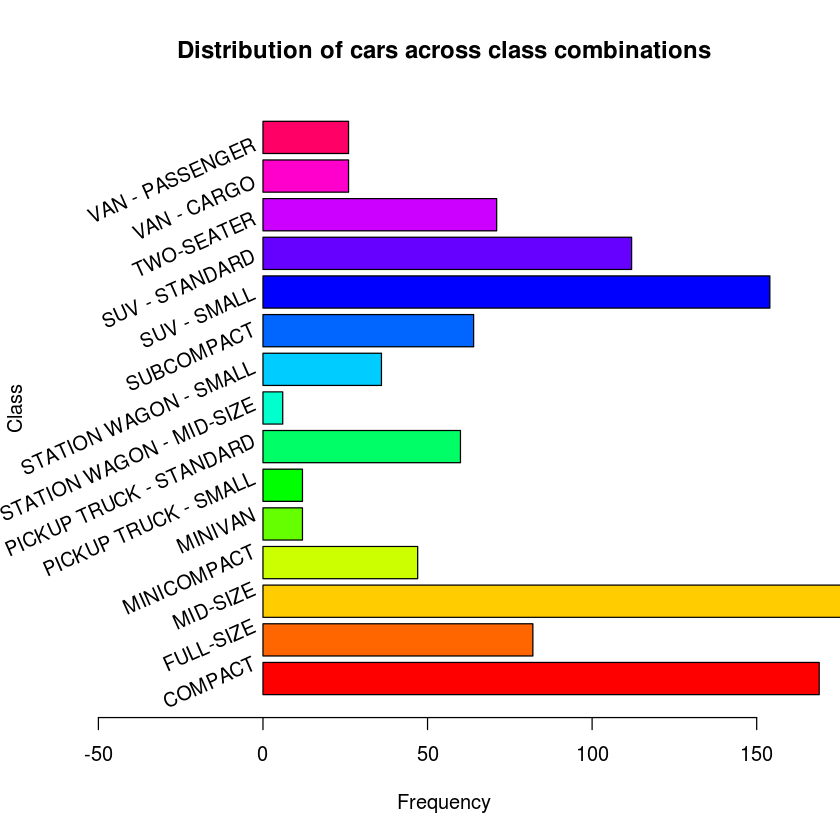

In [8]:
#Look at distribution of cars over unique class combos
cls.freq = table(fueldata$CLASS)


lablist=names(cls.freq)
barplot(cls.freq,names.arg=rep('',length(lablist)),
        horiz=T,
        col=rainbow(length(lablist)),
        xlim=c(-50,160),
        main="Distribution of cars across class combinations",xlab="Frequency",ylab="Class")
par(las=2)
#axis(2, at=seq(1, length(lablist)*2, by=1), labels = FALSE)
text(2,seq(1, length(lablist), by=1)*1.15,offset=0.6 , labels = lablist, srt = 24, pos = 2, xpd = T)


uniqueClassCombos = unique(fueldata$CLASS)
paste("Unique Combination of Classes (",length(uniqueClassCombos),")",collapse='')
uniqueClassCombos

summary(fueldata$CLASS)

In [9]:
# getting unique classes then recode into binary data
#classes = paste(fueldata$CLASS,collapse=' ')
k=gsub("-", "", fueldata$CLASS)
k = gsub("  ", " ", k)
k=paste(k,collapse=' ')
uniqueClasses=unique(strsplit(k,' ')[[1]])
"Unique Classes"
paste("Unique Classes (",length(uniqueClasses),")",collapse='')
uniqueClasses
#NB TOFO: replace FULLSIZE with FULL-SIZE before doing queries

[1] "Unique Classes"

[1] "Unique Classes ( 17 )"

[1] "COMPACT"     "SUV"         "SMALL"       "MIDSIZE"     "MINICOMPACT"
 [6] "SUBCOMPACT"  "TWOSEATER"   "FULLSIZE"    "STATION"     "WAGON"      
[11] "STANDARD"    "VAN"         "CARGO"       "PASSENGER"   "PICKUP"     
[16] "TRUCK"       "MINIVAN"

In [10]:
#Recording Data and adding to fueldata
# Determines if a VECTOR value contains the value in subClass
containsSubClass = function(value, subClass="CLASS"){
    return (grepl(subClass,value))
}
for(unClass in uniqueClasses){
    cleanTemp = gsub("-", "", fueldata2$CLASS)
    cleanTemp = gsub("  ", " ", cleanTemp)
    fueldata2[sprintf('is%s',unClass)]= apply(as.matrix(cleanTemp),1,FUN=containsSubClass,subClass=unClass)
}
"Data with Recoded Values"
head(fueldata2)

[1] "Data with Recoded Values"

YR BRAND      MODEL       CLASS ENG CYLINDERS TRANS FUEL CITY_L HWY_L
1 2014 ACURA        ILX     COMPACT 2.0         4   AS5    Z    8.6   5.6
2 2014 ACURA        ILX     COMPACT 2.4         4    M6    Z    9.8   6.5
3 2014 ACURA ILX HYBRID     COMPACT 1.5         4   AV7    Z    5.0   4.8
4 2014 ACURA    MDX 4WD SUV - SMALL 3.5         6   AS6    Z   11.2   7.7
5 2014 ACURA    RDX AWD SUV - SMALL 3.5         6   AS6    Z   10.7   7.3
6 2014 ACURA        RLX    MID-SIZE 3.5         6   AS6    Z   10.5   6.4
  CITY_MI HWY_MI FUEL_L_YR CO2 Transmission_Type CVT Gears isCOMPACT isSUV
1      33     50      1440 166                 A   S     5      TRUE FALSE
2      29     43      1660 191                 M         6      TRUE FALSE
3      56     59       980 113                 A   V     7      TRUE FALSE
4      25     37      1920 221                 A   S     6     FALSE  TRUE
5      26     39      1840 212                 A   S     6     FALSE  TRUE
6      27     44      1720 198                 A   S     6     FALSE FALSE
  isSMALL isMIDSIZE isMINICOMPACT isSUBCOMPACT isTWOSEATER isFULLSIZE isSTATION
1   FALSE     FALSE         FALSE        FALSE       FALSE      FALSE     FALSE
2   FALSE     FALSE         FALSE        FALSE       FALSE      FALSE     FALSE
3   FALSE     FALSE         FALSE        FALSE       FALSE      FALSE     FALSE
4    TRUE     FALSE         FALSE        FALSE       FALSE      FALSE     FALSE
5    TRUE     FALSE         FALSE        FALSE       FALSE      FALSE     FALSE
6   FALSE      TRUE         FALSE        FALSE       FALSE      FALSE     FALSE
  isWAGON isSTANDARD isVAN isCARGO isPASSENGER isPICKUP isTRUCK isMINIVAN
1   FALSE      FALSE FALSE   FALSE       FALSE    FALSE   FALSE     FALSE
2   FALSE      FALSE FALSE   FALSE       FALSE    FALSE   FALSE     FALSE
3   FALSE      FALSE FALSE   FALSE       FALSE    FALSE   FALSE     FALSE
4   FALSE      FALSE FALSE   FALSE       FALSE    FALSE   FALSE     FALSE
5   FALSE      FALSE FALSE   FALSE       FALSE    FALSE   FALSE     FALSE
6   FALSE      FALSE FALSE   FALSE       FALSE    FALSE   FALSE     FALSE

[1] "Summary Statistics for Fuel Data"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    760    1560    1900    2019    2340    4620 

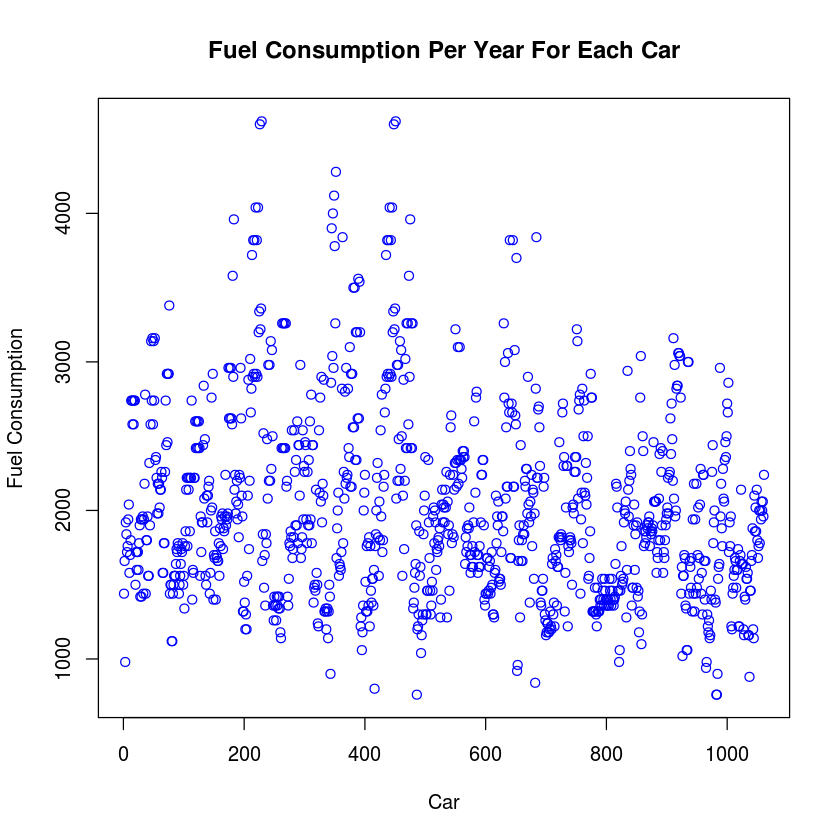

In [11]:
# Taking a closer look at fuel consumption per year to detemine suitable classes
"Summary Statistics for Fuel Data"
summary(fueldata$FUEL_L_YR)
plot(fueldata$FUEL_L_YR,main="Fuel Consumption Per Year For Each Car",
                        xlab="Car",
                        ylab="Fuel Consumption",col=c('blue'))
# Question, was the driver and their lifestyle an impact on the fuel consumption of the recorded car? 
# Based on the data, we cannot answer the above
 

[1] "Using the Distribution of Data to identify possible classes for features"


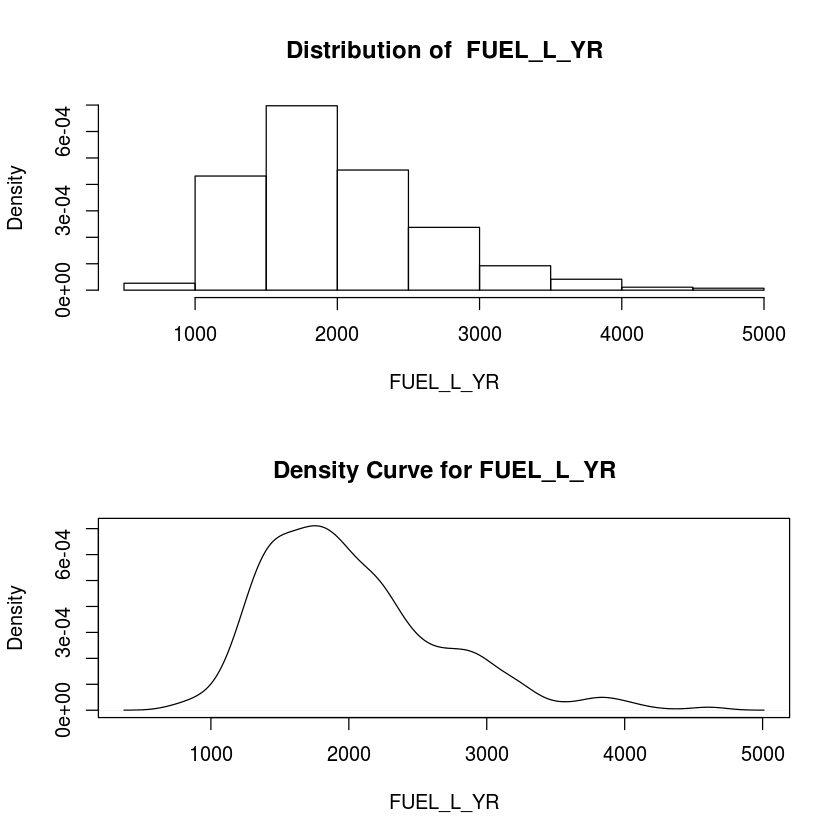

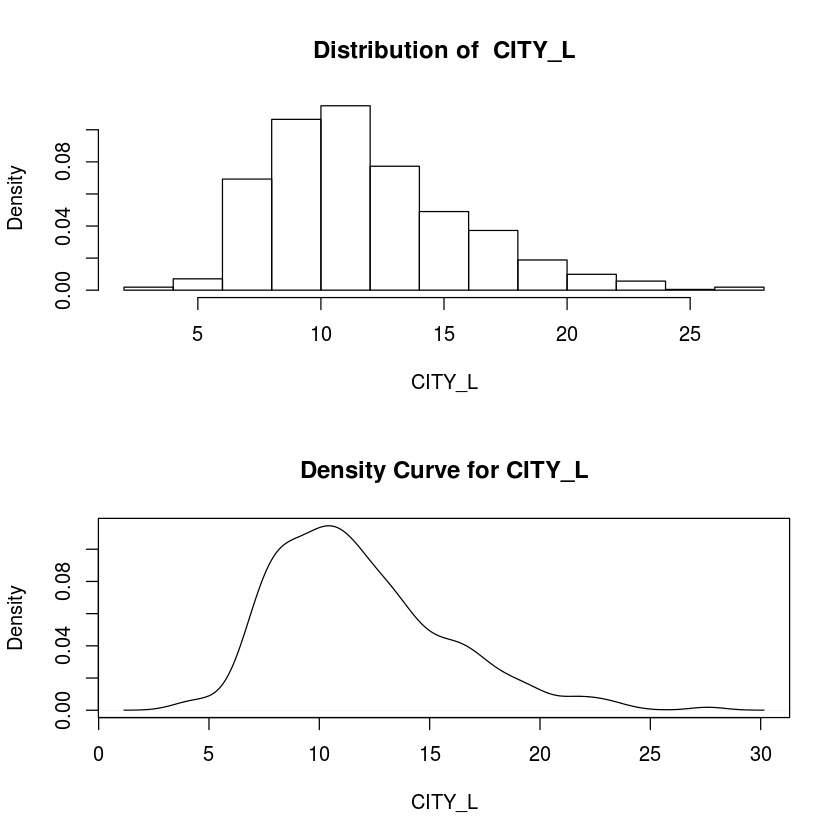

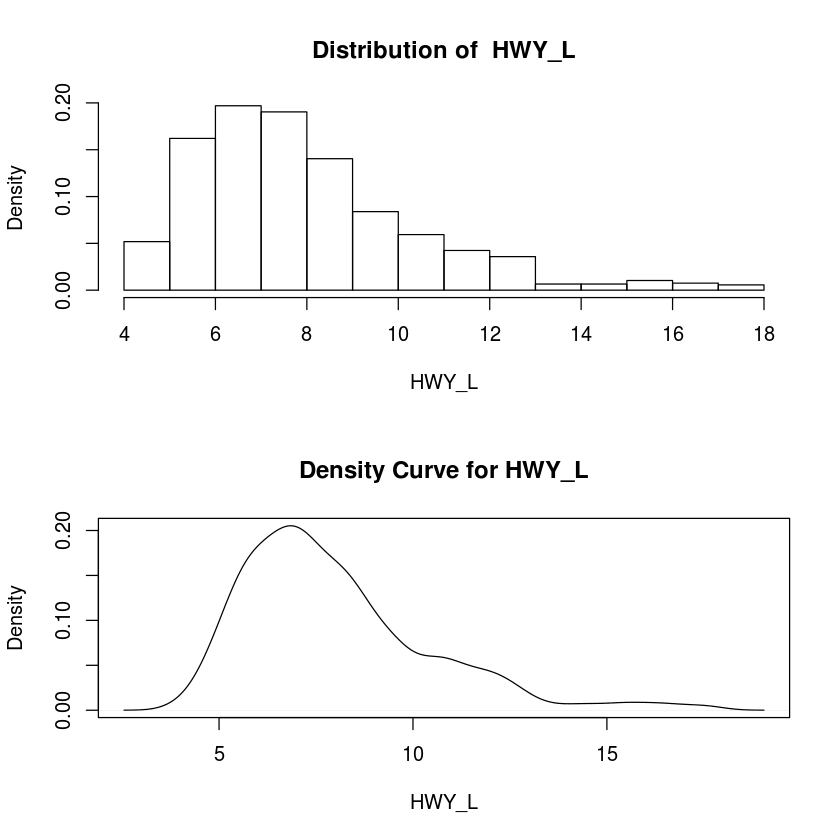

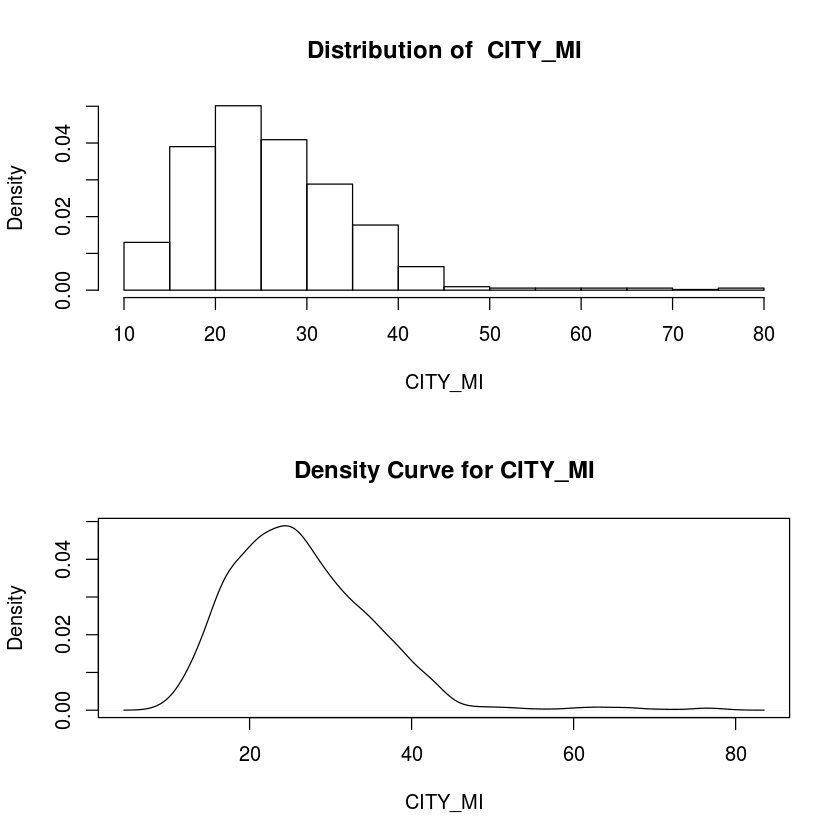

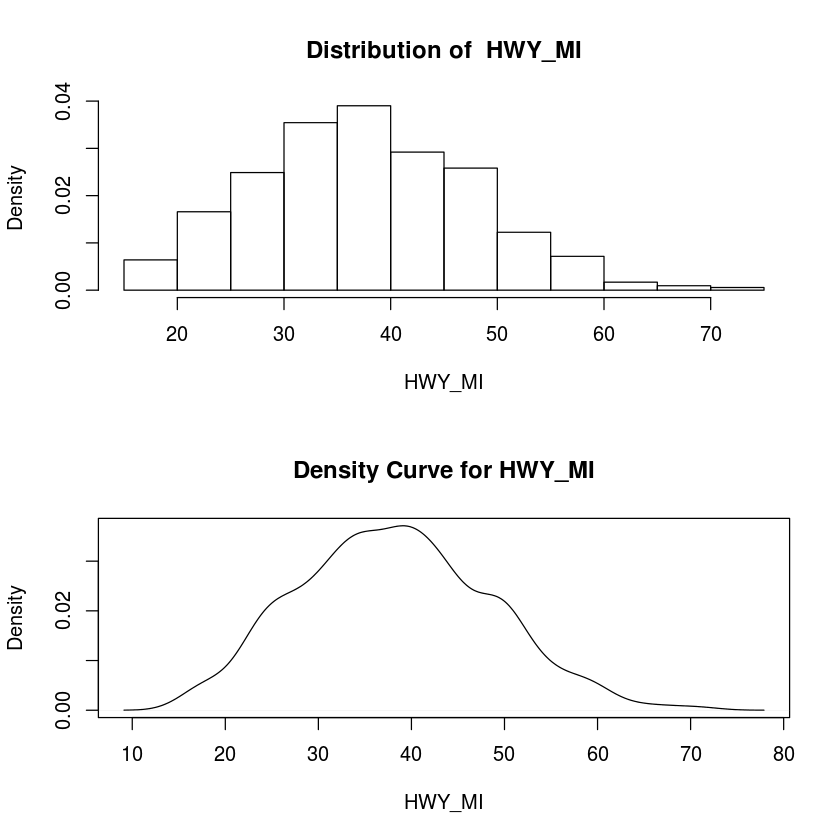

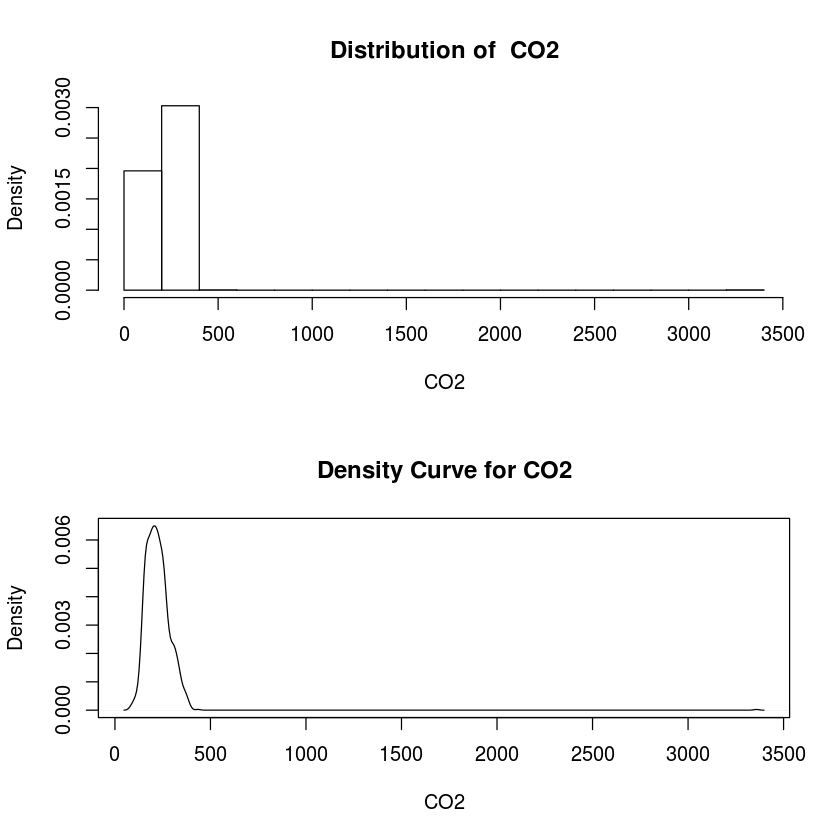

In [12]:
print("Using the Distribution of Data to identify possible classes for features")
for(feature in c('FUEL_L_YR','CITY_L','HWY_L','CITY_MI','HWY_MI','CO2')){
    title = paste("Distribution of ",feature)
    par(mfrow=c(2,1))
    hist(fueldata[,feature],freq=F,main=title,xlab=feature)
    plot(density(fueldata[,feature]),main=paste('Density Curve for',feature),xlab=feature)
}

[1] "No of groups attained: 7"

[1] "Labels for groups attained"

[1] 2 3 1 4 5 6 7

[1] "Classification and Observations are equal?  TRUE"

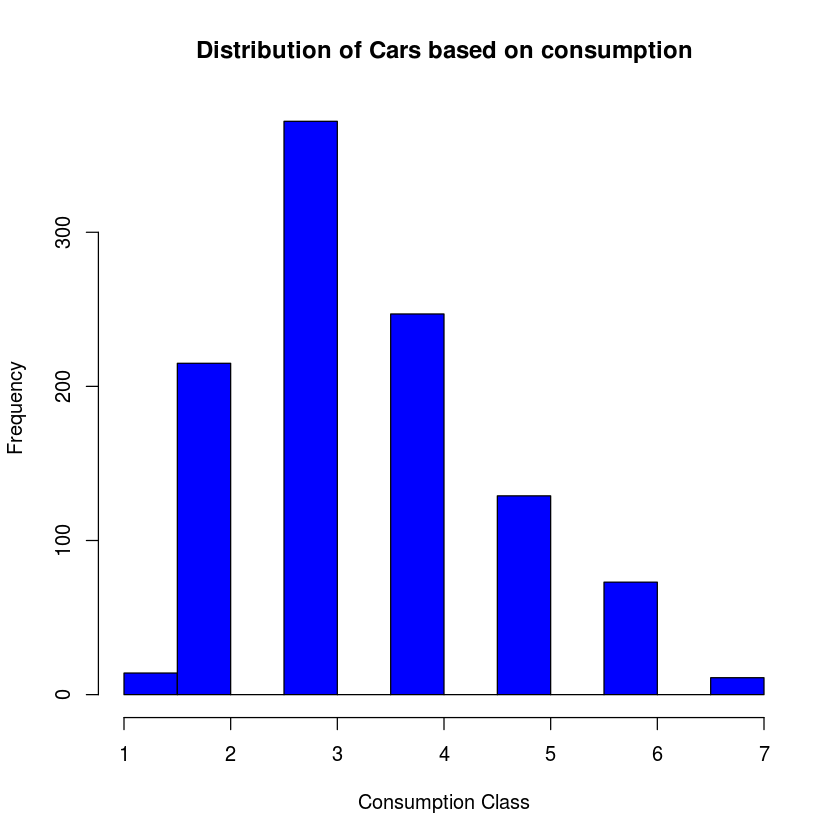

In [13]:
# Based on the density distribution, Possible classes include
#-  0-1000 --> 1
#-  1000-1500 --> 2
#-  1500-2000 --> 3
#-  2000-2500 --> 4
#-  2500-3000 --> 5
#-  3000-4000 --> 6
#-  4000-5000 --> 7
# Will create factors based on ranges
group_bounds = c(
    0, #1
    999, # 2
    1499, #3
    1999, #4
    2499, #5
    2999, #6
    3999 #7
    ,5000 #7
)

classification=cut(fueldata2$FUEL_L_YR,labels=F,breaks=group_bounds)
sprintf("No of groups attained: %s",length(unique(classification)))
"Labels for groups attained"
unique(classification)
# create copy of fueldata and add groups
fueldata3 = fueldata2
fueldata3$consume = classification

paste("Classification and Observations are equal? ",length(classification) == length(fueldata$FUEL_L_YR) )
hist(fueldata3$consume,col=c('blue'),main="Distribution of Cars based on consumption",
                       xlab="Consumption Class",
                       ylab="Frequency")

In [14]:
# Include rpart library
library(rpart)

In [15]:
# Let's describe the data a bit more to help R
factorColumns = c('YR','BRAND','MODEL','CLASS','ENG','CYLINDERS','TRANS','FUEL','CITY_L','HWY_L','CITY_MI','HWY_MI','FUEL_L_YR','CO2' )
# Remove spaces and hyphens in CLASS
fueldata4 = fueldata3
fueldata4$CLASS=gsub(" ","",gsub("-", "", fueldata3$CLASS))
#cdata[,factorColumns] = lapply(cdata[,factorColumns] , factor)

head(fueldata4)


YR BRAND      MODEL    CLASS ENG CYLINDERS TRANS FUEL CITY_L HWY_L CITY_MI
1 2014 ACURA        ILX  COMPACT 2.0         4   AS5    Z    8.6   5.6      33
2 2014 ACURA        ILX  COMPACT 2.4         4    M6    Z    9.8   6.5      29
3 2014 ACURA ILX HYBRID  COMPACT 1.5         4   AV7    Z    5.0   4.8      56
4 2014 ACURA    MDX 4WD SUVSMALL 3.5         6   AS6    Z   11.2   7.7      25
5 2014 ACURA    RDX AWD SUVSMALL 3.5         6   AS6    Z   10.7   7.3      26
6 2014 ACURA        RLX  MIDSIZE 3.5         6   AS6    Z   10.5   6.4      27
  HWY_MI FUEL_L_YR CO2 Transmission_Type CVT Gears isCOMPACT isSUV isSMALL
1     50      1440 166                 A   S     5      TRUE FALSE   FALSE
2     43      1660 191                 M         6      TRUE FALSE   FALSE
3     59       980 113                 A   V     7      TRUE FALSE   FALSE
4     37      1920 221                 A   S     6     FALSE  TRUE    TRUE
5     39      1840 212                 A   S     6     FALSE  TRUE    TRUE
6     44      1720 198                 A   S     6     FALSE FALSE   FALSE
  isMIDSIZE isMINICOMPACT isSUBCOMPACT isTWOSEATER isFULLSIZE isSTATION isWAGON
1     FALSE         FALSE        FALSE       FALSE      FALSE     FALSE   FALSE
2     FALSE         FALSE        FALSE       FALSE      FALSE     FALSE   FALSE
3     FALSE         FALSE        FALSE       FALSE      FALSE     FALSE   FALSE
4     FALSE         FALSE        FALSE       FALSE      FALSE     FALSE   FALSE
5     FALSE         FALSE        FALSE       FALSE      FALSE     FALSE   FALSE
6      TRUE         FALSE        FALSE       FALSE      FALSE     FALSE   FALSE
  isSTANDARD isVAN isCARGO isPASSENGER isPICKUP isTRUCK isMINIVAN consume
1      FALSE FALSE   FALSE       FALSE    FALSE   FALSE     FALSE       2
2      FALSE FALSE   FALSE       FALSE    FALSE   FALSE     FALSE       3
3      FALSE FALSE   FALSE       FALSE    FALSE   FALSE     FALSE       1
4      FALSE FALSE   FALSE       FALSE    FALSE   FALSE     FALSE       3
5      FALSE FALSE   FALSE       FALSE    FALSE   FALSE     FALSE       3
6      FALSE FALSE   FALSE       FALSE    FALSE   FALSE     FALSE       3

In [16]:
allfeatures=names(fueldata4)
"All features that may be considered"
allfeatures

#fueldata4[,-match(c('YR','consume'),allfeatures)]
#fueldata4[,!allfeatures %in% c('YR','consume')]

[1] "All features that may be considered"

[1] "YR"                "BRAND"             "MODEL"            
 [4] "CLASS"             "ENG"               "CYLINDERS"        
 [7] "TRANS"             "FUEL"              "CITY_L"           
[10] "HWY_L"             "CITY_MI"           "HWY_MI"           
[13] "FUEL_L_YR"         "CO2"               "Transmission_Type"
[16] "CVT"               "Gears"             "isCOMPACT"        
[19] "isSUV"             "isSMALL"           "isMIDSIZE"        
[22] "isMINICOMPACT"     "isSUBCOMPACT"      "isTWOSEATER"      
[25] "isFULLSIZE"        "isSTATION"         "isWAGON"          
[28] "isSTANDARD"        "isVAN"             "isCARGO"          
[31] "isPASSENGER"       "isPICKUP"          "isTRUCK"          
[34] "isMINIVAN"         "consume"

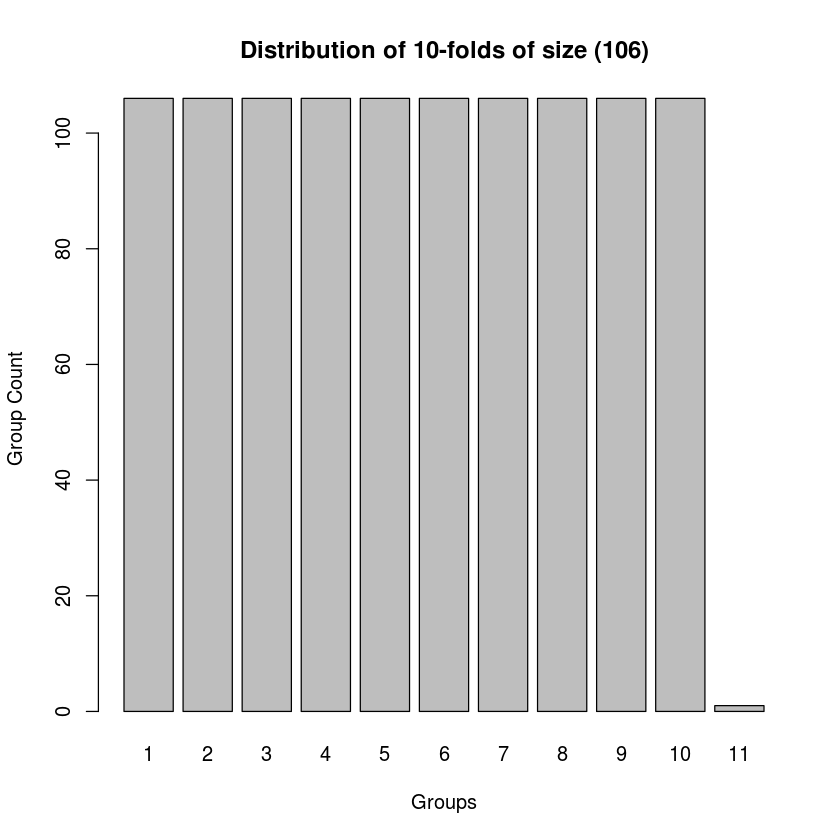

In [17]:
#Implementing K-Fold Validation

number_of_observations = nrow(fueldata4) # number of observations
no_of_folds = 10 # To Perform 10-fold validation
block_size = number_of_observations%/%no_of_folds
set.seed(23) #ensure the following steps will remain consistent
random_keys = runif(number_of_observations) # random value column 
ranks = rank(random_keys)
block = (ranks -1)%/%block_size + 1
#block
block=as.factor(block)
plot(block,main=sprintf("Distribution of %d-folds of size (%d)",no_of_folds,block_size),
        xlab="Groups",ylab="Group Count")
#summary(block)


In [18]:
#Testing implemented K-Fold Validation
all.err = numeric(0)
for(k in 1:no_of_folds){

    train_data = fueldata4[block != k,]
    #print(paste("Training Data size : ",nrow(train_data)))
    test_data = fueldata4[block == k,]
    #print(paste('Test Data size : ',nrow(test_data)))
    model = rpart("consume ~ ENG+CLASS+FUEL+CYLINDERS",data=train_data,method="class")
    #plotcp(model)
    pred = predict(model,newdata=test_data,type="class")
    mc = table(test_data$consume,pred)
    print(paste("Confusion Matrix for Fold ",k))
    print(mc)
    #print(paste("% Correct for fold",k," : ",sum(test_data$consume == pred)))
    err = 1.0 - sum(test_data$consume == pred)/sum(mc)
    
    all.err = rbind(all.err,err)
}
data.frame(error_in_group=all.err)
"Average Error in Model"
mean(all.err)

[1] "Confusion Matrix for Fold  1"
   pred
     1  2  3  4  5  6  7
  2  0 10  9  2  0  0  0
  3  0  3 35  2  0  0  0
  4  0  0  1 19  5  0  0
  5  0  0  0  0 10  0  0
  6  0  0  0  0  4  5  0
  7  0  0  0  0  0  1  0
[1] "Confusion Matrix for Fold  2"
   pred
     1  2  3  4  5  6  7
  1  0  1  1  0  0  0  0
  2  0  8  8  0  0  0  0
  3  0  3 36  4  0  0  0
  4  0  0  6 16  4  0  0
  5  0  0  0  0 14  1  0
  6  0  0  0  0  1  2  1
[1] "Confusion Matrix for Fold  3"
   pred
     1  2  3  4  5  6  7
  2  0 18  5  1  0  0  0
  3  0  4 27  2  0  0  0
  4  0  0 13 15  4  0  0
  5  0  0  1  4  6  0  0
  6  0  0  0  0  3  2  0
  7  0  0  0  0  0  1  0
[1] "Confusion Matrix for Fold  4"
   pred
     1  2  3  4  5  6  7
  1  0  2  0  0  0  0  0
  2  0 15  2  0  0  0  0
  3  0  6 30  3  0  0  0
  4  0  0  7 12  2  0  0
  5  0  0  1  3  9  0  0
  6  0  0  0  0  5  6  0
  7  0  0  0  0  0  3  0
[1] "Confusion Matrix for Fold  5"
   pred
     1  2  3  4  5  6  7
  1  0  1  2  0  0  0  0
  2  0 16 

Warning message:
In data.row.names(row.names, rowsi, i): some row.names duplicated: 2,3,4,5,6,7,8,9,10 --> row.names NOT used

error_in_group
1       0.2547170
2       0.2830189
3       0.3584906
4       0.3207547
5       0.3773585
6       0.2547170
7       0.3113208
8       0.3490566
9       0.3584906
10      0.3301887

[1] "Average Error in Model"

[1] 0.3198113

In [31]:
possible_models = c(
    #'consume ~ BRAND + MODEL + CLASS + ENG + CYLINDERS + FUEL + Transmission_Type + CVT + Gears + CO2',
    'consume ~ ENG+CLASS+FUEL+CYLINDERS + Transmission_Type + CVT + Gears',
    'consume ~ ENG+CLASS+FUEL+CYLINDERS',
    'consume ~ CITY_L + HWY_L + CITY_MI + HWY_MI + CO2'
    #,'consume ~ BRAND + MODEL + CLASS + ENG + CYLINDERS + FUEL + Transmission_Type + CVT + Gears + CO2 + CITY_L + HWY_L + CITY_MI + HWY_MI'
)

possible_models_per_class = c(
    'consume ~ ENG+FUEL+CYLINDERS + Transmission_Type + CVT + Gears',
    'consume ~ ENG+FUEL+CYLINDERS',
    'consume ~ CITY_L + HWY_L + CITY_MI + HWY_MI + CO2'
)

In [20]:
head(fueldata4[,1:17])

YR BRAND      MODEL    CLASS ENG CYLINDERS TRANS FUEL CITY_L HWY_L CITY_MI
1 2014 ACURA        ILX  COMPACT 2.0         4   AS5    Z    8.6   5.6      33
2 2014 ACURA        ILX  COMPACT 2.4         4    M6    Z    9.8   6.5      29
3 2014 ACURA ILX HYBRID  COMPACT 1.5         4   AV7    Z    5.0   4.8      56
4 2014 ACURA    MDX 4WD SUVSMALL 3.5         6   AS6    Z   11.2   7.7      25
5 2014 ACURA    RDX AWD SUVSMALL 3.5         6   AS6    Z   10.7   7.3      26
6 2014 ACURA        RLX  MIDSIZE 3.5         6   AS6    Z   10.5   6.4      27
  HWY_MI FUEL_L_YR CO2 Transmission_Type CVT Gears
1     50      1440 166                 A   S     5
2     43      1660 191                 M         6
3     59       980 113                 A   V     7
4     37      1920 221                 A   S     6
5     39      1840 212                 A   S     6
6     44      1720 198                 A   S     6

In [21]:

get_mean_error_using_k_fold=function (df,modelfunc="consume ~ ENG+CLASS+FUEL+CYLINDERS",no_of_folds = 10,
                                     rand_seed=23,
                                     plot_group_distribution=F,
                                     plot_models=F,
                                     show_confusion_matrices=F,
                                     show_error_per_groups=F,
                                     show_average_error=F,
                                     min_split=100)
{
    number_of_observations = nrow(df) # number of observations
    
    block_size = number_of_observations%/%no_of_folds
    set.seed(rand_seed) #ensure the following steps will remain consistent
    random_keys = runif(number_of_observations) # random value column 
    ranks = rank(random_keys)
    block = (ranks -1)%/%block_size + 1
    #block
    block=as.factor(block)
    
    if(plot_group_distribution ==T){
        plot(block,main=sprintf("Distribution of %d-folds of size (%d)",no_of_folds,block_size),
             xlab="Groups",ylab="Group Count")
    }
    
    all.err = numeric(0)
    for(k in 1:no_of_folds){
        
        train_data = fueldata4[block != k,]
        #print(paste("Training Data size : ",nrow(train_data)))
        test_data = fueldata4[block == k,]
        #print(paste('Test Data size : ',nrow(test_data)))
        model = rpart(modelfunc,data=train_data,method="class",control=rpart.control(minsplit=min_split))
        if(plot_models == T){
            plotcp(model)
        }
        pred = predict(model,newdata=test_data,type="class")
        mc = table(test_data$consume,pred)
        if(show_confusion_matrices == T){
            print(paste("Confusion Matrix for Fold ",k))
            print(mc)
        }
        #print(paste("% Correct for fold",k," : ",sum(test_data$consume == pred)))
        err = 1.0 - sum(test_data$consume == pred)/sum(mc)
        
        all.err = rbind(all.err,err)
    }
    if(show_error_per_groups == T){
        data.frame(error_in_group=all.err)
    }
    mean_err=mean(all.err)
    if(show_average_error == T){
        print(paste("Average Error in Model '",modelfunc,"' = ",mean_err))
    }
    return (mean_err)
}

In [22]:
# NO longer in use, rpart performs cross validation
model_errors = c()
for(possible_model in possible_models){
    break 
    model_errors=c(
                   model_errors,
                   get_mean_error_using_k_fold(fueldata4,modelfunc=possible_model,
                                                plot_group_distribution=T,
                                     plot_models=T,
                                     show_confusion_matrices=T,
                                     show_error_per_groups=T,
                                     show_average_error=T))
}
#"Error in Each Model"
#data.frame(Error=model_errors,Model=possible_models)

In [23]:
library(sqldf)

Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite
Loading required package: DBI


[1] "No of Test :  213  | No in Train :  848  | % Split : 80 %"


[1] "--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------"

[1] "Model :  consume ~ ENG+CLASS+FUEL+CYLINDERS + Transmission_Type + CVT + Gears"

Classification tree:
rpart(formula = possible_model, data = train_data, method = "class", 
    control = rpart.control(minsplit = 100, minbucket = 100, 
        xval = 10))

Variables actually used in tree construction:
[1] CLASS ENG  

Root node error: 545/848 = 0.64269

n= 848 

        CP nsplit rel error  xerror     xstd
1 0.174312      0   1.00000 1.00000 0.025605
2 0.137615      1   0.82569 0.82569 0.026666
3 0.031193      2   0.68807 0.68807 0.026537
4 0.010000      4   0.62569 0.70092 0.026585


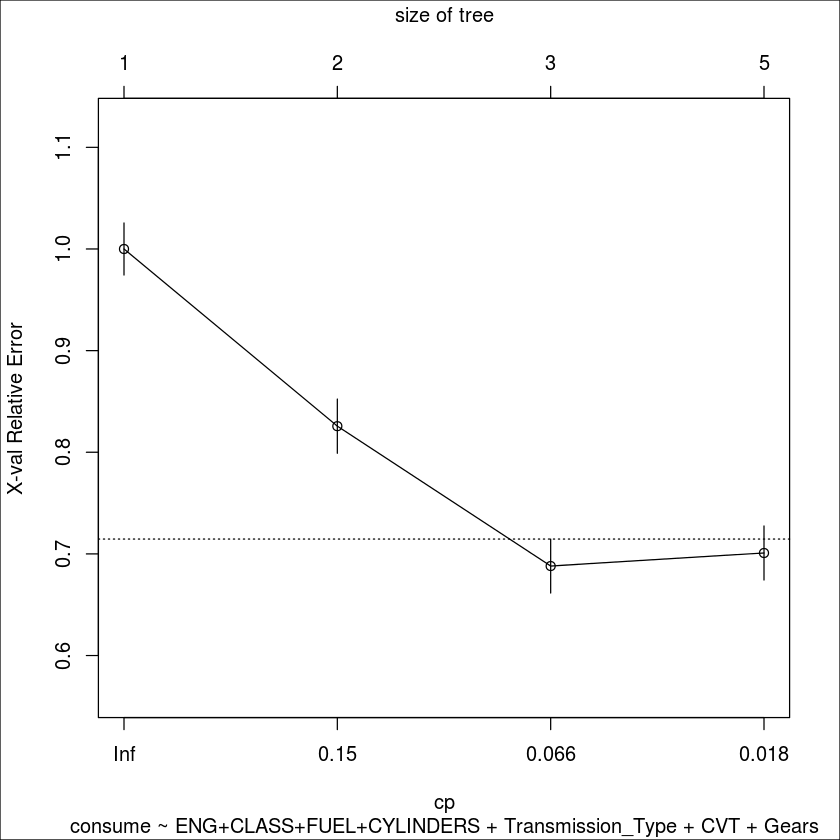

[1] "Confusion Matrix for  consume ~ ENG+CLASS+FUEL+CYLINDERS + Transmission_Type + CVT + Gears"
   pred
     1  2  3  4  5  6  7
  1  0  0  3  0  0  0  0
  2  0 29 21  0  0  0  0
  3  0  3 58  8  0  0  0
  4  0  0 14 35  3  0  0
  5  0  0  1 12  8  0  0
  6  0  0  0  3 12  0  0
  7  0  0  0  0  3  0  0
[1] "Error in model \" consume ~ ENG+CLASS+FUEL+CYLINDERS + Transmission_Type + CVT + Gears \": 0.389671361502347"
[1] "Model :  consume ~ ENG+CLASS+FUEL+CYLINDERS"


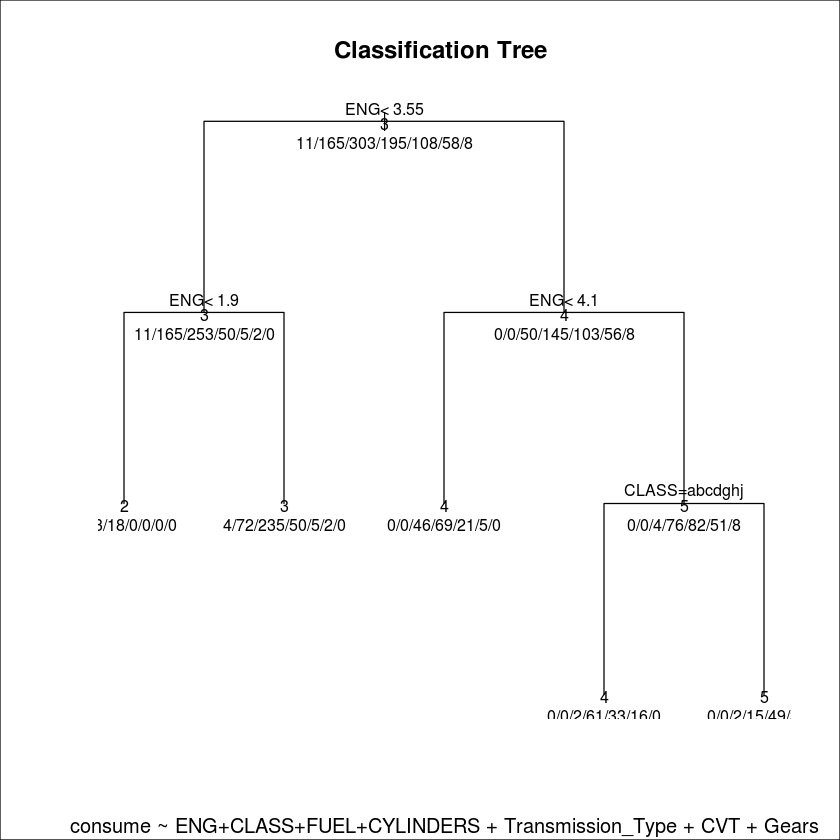


Classification tree:
rpart(formula = possible_model, data = train_data, method = "class", 
    control = rpart.control(minsplit = 100, minbucket = 100, 
        xval = 10))

Variables actually used in tree construction:
[1] CLASS ENG  

Root node error: 545/848 = 0.64269

n= 848 

        CP nsplit rel error  xerror     xstd
1 0.174312      0   1.00000 1.00000 0.025605
2 0.137615      1   0.82569 0.82569 0.026666
3 0.031193      2   0.68807 0.68807 0.026537
4 0.010000      4   0.62569 0.66972 0.026456


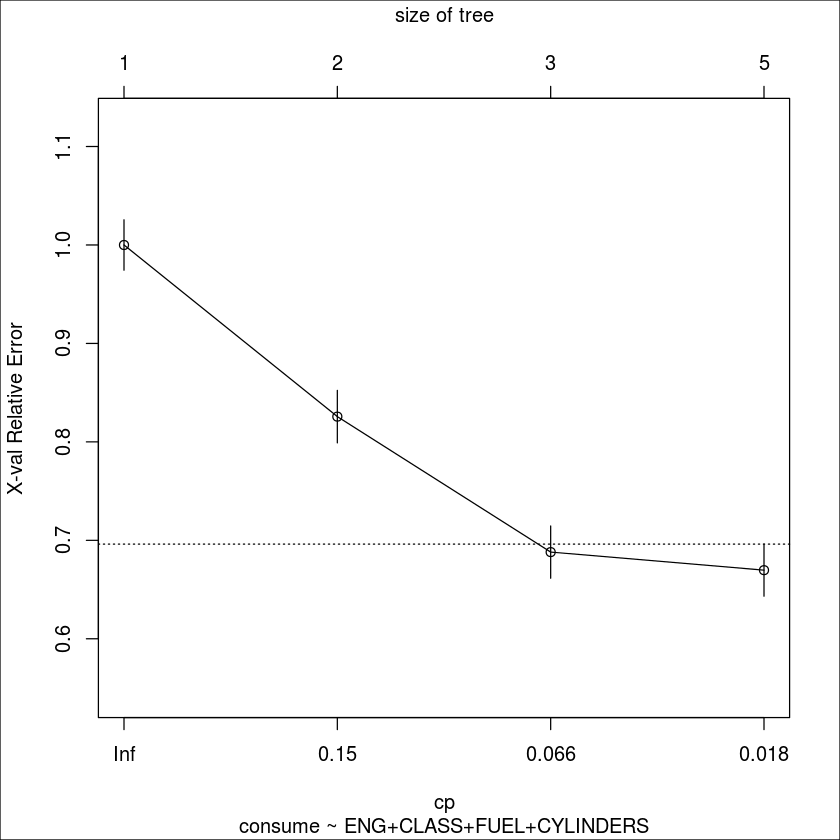

[1] "Confusion Matrix for  consume ~ ENG+CLASS+FUEL+CYLINDERS"
   pred
     1  2  3  4  5  6  7
  1  0  0  3  0  0  0  0
  2  0 29 21  0  0  0  0
  3  0  3 58  8  0  0  0
  4  0  0 14 35  3  0  0
  5  0  0  1 12  8  0  0
  6  0  0  0  3 12  0  0
  7  0  0  0  0  3  0  0
[1] "Error in model \" consume ~ ENG+CLASS+FUEL+CYLINDERS \": 0.389671361502347"
[1] "Model :  consume ~ CITY_L + HWY_L + CITY_MI + HWY_MI + CO2"


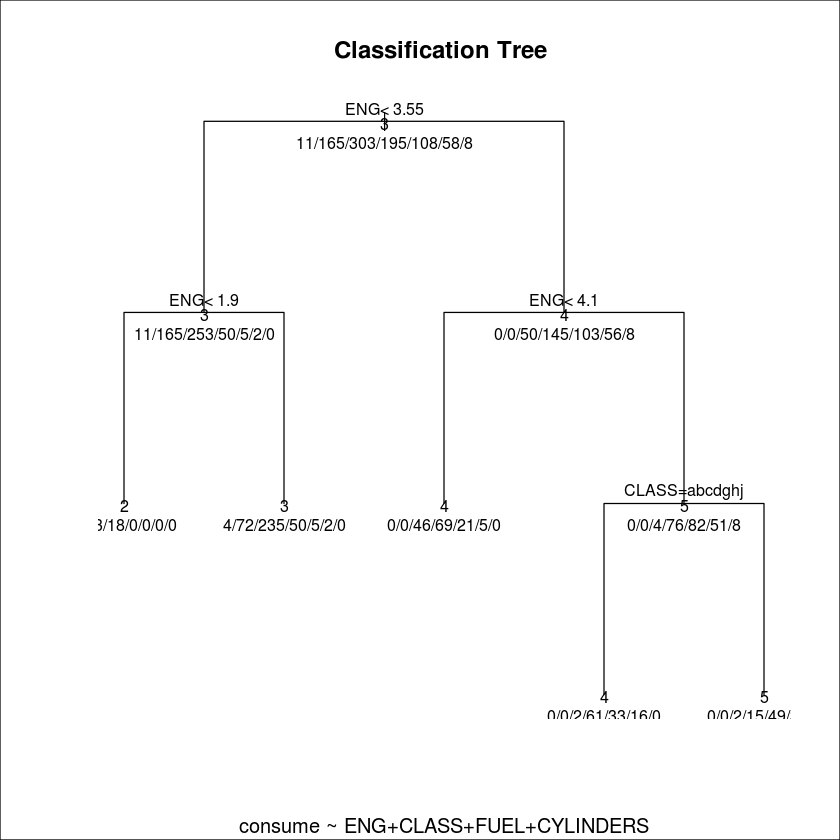


Classification tree:
rpart(formula = possible_model, data = train_data, method = "class", 
    control = rpart.control(minsplit = 100, minbucket = 100, 
        xval = 10))

Variables actually used in tree construction:
[1] CITY_L CO2   

Root node error: 545/848 = 0.64269

n= 848 

       CP nsplit rel error  xerror     xstd
1 0.33394      0   1.00000 1.00000 0.025605
2 0.28807      1   0.66606 0.67339 0.026473
3 0.17798      2   0.37798 0.38532 0.023064
4 0.01000      3   0.20000 0.21284 0.018361


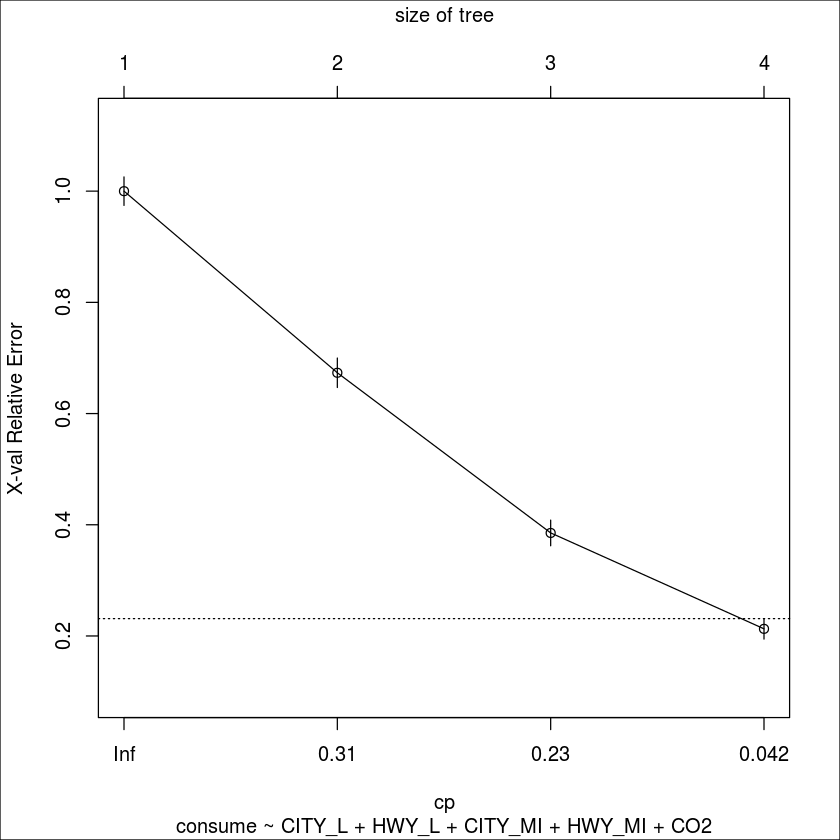

[1] "Confusion Matrix for  consume ~ CITY_L + HWY_L + CITY_MI + HWY_MI + CO2"
   pred
     1  2  3  4  5  6  7
  1  0  3  0  0  0  0  0
  2  0 49  1  0  0  0  0
  3  0  2 65  2  0  0  0
  4  0  0  4 46  2  0  0
  5  0  0  0  1 20  0  0
  6  0  0  0  0 15  0  0
  7  0  0  0  0  3  0  0
[1] "Error in model \" consume ~ CITY_L + HWY_L + CITY_MI + HWY_MI + CO2 \": 0.154929577464789"


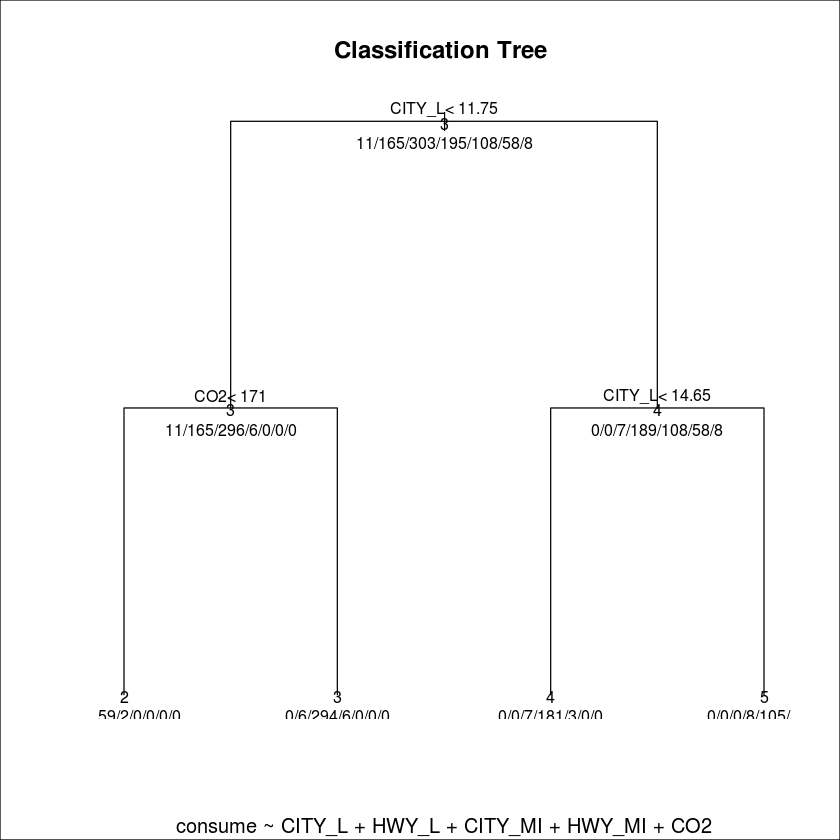

In [67]:
model_errors = c()
vars_used  = c()
fueldata5 = fueldata4
no_of_observations = nrow(fueldata4)
fueldata5$recordId = seq(1,no_of_observations)
percent_split=0.8
train_data = fueldata5[sample(1:no_of_observations,size = as.integer(percent_split * no_of_observations)),]
query= sprintf("select * from fueldata5 where recordId not in (%s)",paste(train_data$recordId,collapse=','))

test_data = sqldf(query)
print(paste('No of Test : ',nrow(test_data),' | No in Train : ',nrow(train_data),' | % Split :',
            (percent_split*100),'%'))
println()
for(possible_model in possible_models){
        print(paste('Model : ',possible_model))
        
        model = rpart(possible_model,data=train_data,method="class",
                      control=rpart.control(
                          minsplit=100,
                          minbucket=100,
                          xval=10 #10 Fold Validation
                      ))
        vars_used = c(vars_used,paste(unique(model$frame$var),collapse=',')) #collects vars used in model in important order
        plotcp(model,main="",sub=possible_model)
        box("outer")
        printcp(model)
        plot(model, uniform=TRUE)
        title(main=sprintf("Classification Tree "),sub=possible_model)
        text(model, use.n=TRUE, all=TRUE, cex=.8)
        box("outer")
        println()

        pred = predict(model,newdata=test_data,type="class")
        mc = table(test_data$consume,pred)

        println()
        print(paste("Confusion Matrix for ",possible_model))
        print(mc)

        err = 1.0 - sum(test_data$consume == pred)/sum(mc)
        print(paste('Error in model "',possible_model,'":',err))
        println()
        model_errors=c(model_errors, err)   
}


In [68]:
"Error in Each Model"
data.frame(Error=model_errors,Model=possible_models,Critical_Features=vars_used)


[1] "Error in Each Model"

Error
1 0.3896714
2 0.3896714
3 0.1549296
                                                                 Model
1 consume ~ ENG+CLASS+FUEL+CYLINDERS + Transmission_Type + CVT + Gears
2                                   consume ~ ENG+CLASS+FUEL+CYLINDERS
3                    consume ~ CITY_L + HWY_L + CITY_MI + HWY_MI + CO2
  Critical_Features
1  ENG,<leaf>,CLASS
2  ENG,<leaf>,CLASS
3 CITY_L,CO2,<leaf>

[1] "<center><h3>Composite Model</h3></center>"

[1] "Model :  consume ~ ENG + CLASS + CITY_L + CO2"

Classification tree:
rpart(formula = possible_model, data = train_data, method = "class", 
    control = rpart.control(minsplit = 50, xval = 10))

Variables actually used in tree construction:
[1] CITY_L CO2   

Root node error: 545/848 = 0.64269

n= 848 

        CP nsplit rel error  xerror     xstd
1 0.333945      0   1.00000 1.00000 0.025605
2 0.288073      1   0.66606 0.67523 0.026482
3 0.177982      2   0.37798 0.38716 0.023100
4 0.093578      3   0.20000 0.20917 0.018227
5 0.010000      4   0.10642 0.11560 0.014012


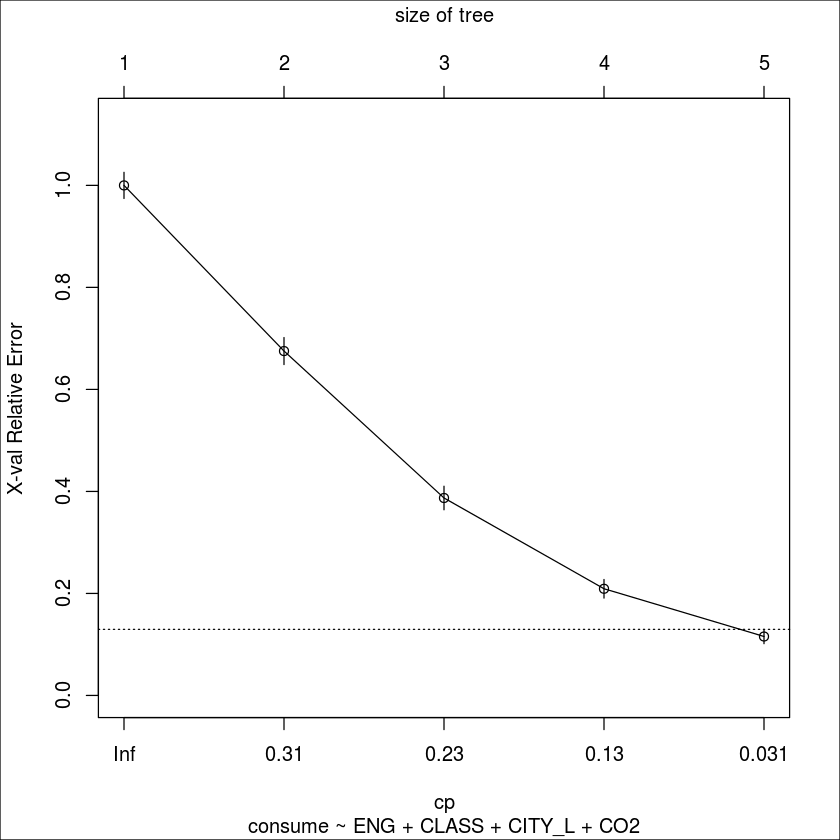

[1] "--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------"

[1] "--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------"

[1] "Confusion Matrix for  consume ~ ENG + CLASS + CITY_L + CO2"
   pred
     1  2  3  4  5  6  7
  1  0  3  0  0  0  0  0
  2  0 49  1  0  0  0  0
  3  0  2 65  2  0  0  0
  4  0  0  4 46  2  0  0
  5  0  0  0  1 20  0  0
  6  0  0  0  0  1 14  0
  7  0  0  0  0  0  3  0
[1] "Error in model \" consume ~ ENG + CLASS + CITY_L + CO2 \": 0.0892018779342723"


[1] "--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------"

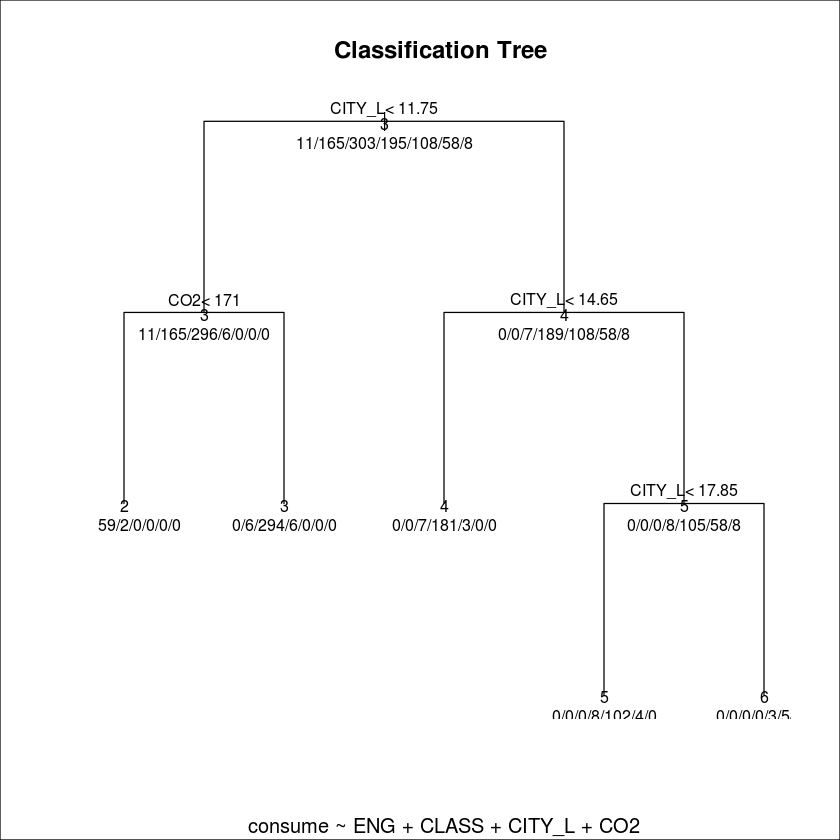

In [72]:
#Based on the critical features identified in the above models a better model overall may be
"<center><h3>Composite Model</h3></center>"
possible_model='consume ~ ENG + CLASS + CITY_L + CO2'
        print(paste('Model : ',possible_model))
        
        model = rpart(possible_model,data=train_data,method="class",
                      control=rpart.control(
                          minsplit=50,
                         # minbucket=100,
                          xval=10 #10 Fold Validation
                      ))
        vars_used = c(vars_used,paste(unique(model$frame$var),collapse=',')) #collects vars used in model in important order
        plotcp(model,main="",sub=possible_model)
        box("outer")
        printcp(model)
        plot(model, uniform=TRUE)
        title(main=sprintf("Classification Tree "),sub=possible_model)
        text(model, use.n=TRUE, all=TRUE, cex=.8)
        box("outer")
        println()

        pred = predict(model,newdata=test_data,type="class")
        mc = table(test_data$consume,pred)

        println()
        print(paste("Confusion Matrix for ",possible_model))
        print(mc)

        err = 1.0 - sum(test_data$consume == pred)/sum(mc)
        print(paste('Error in model "',possible_model,'":',err))
        println()
        model_errors=c(model_errors, err)

## Does separating by the class of Car leverage a better model?

Based on the distribution of vehicles across classes as plotted earlier, there is the possibility of attempting to build models with group sizes of 6 - 56 observations. This sample size is significanlt small, especially when most of the data does not follow a normal distribution. Furthermoew, identifying a prediction error using the 80/20 split would be even less significant and would more or less underfit the data. 

The following has been generated as hints to possible factors that may impact a class of car, however some should be heavily scrutinized due to the sample size. 

NB. Figures surrounded by green have a sample size exceeding 30

[1] "--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------"

[1] "Possible Models for  COMPACT  -  169  observation(s)"
[1] "Model :  consume ~ ENG+FUEL+CYLINDERS + Transmission_Type + CVT + Gears"

Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] ENG   FUEL  Gears

Root node error: 97/169 = 0.57396

n= 169 

        CP nsplit rel error  xerror     xstd
1 0.309278      0   1.00000 1.00000 0.066273
2 0.123711      1   0.69072 0.69072 0.065558
3 0.056701      2   0.56701 0.59794 0.063630
4 0.020619      4   0.45361 0.49485 0.060436
5 0.010000      6   0.41237 0.49485 0.060436


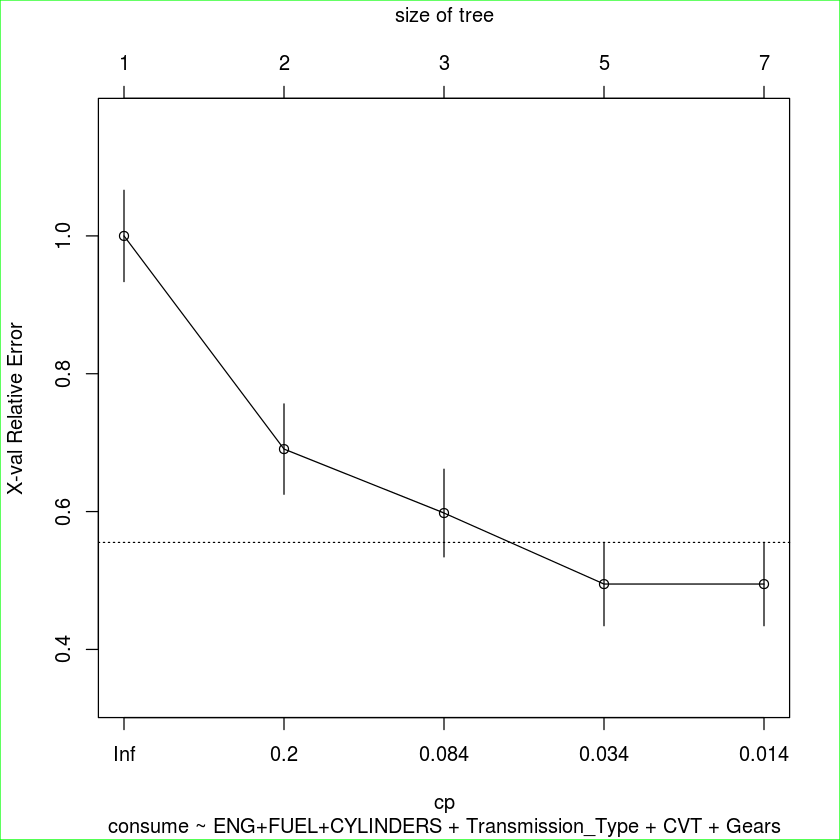

[1] "Model :  consume ~ ENG+FUEL+CYLINDERS"


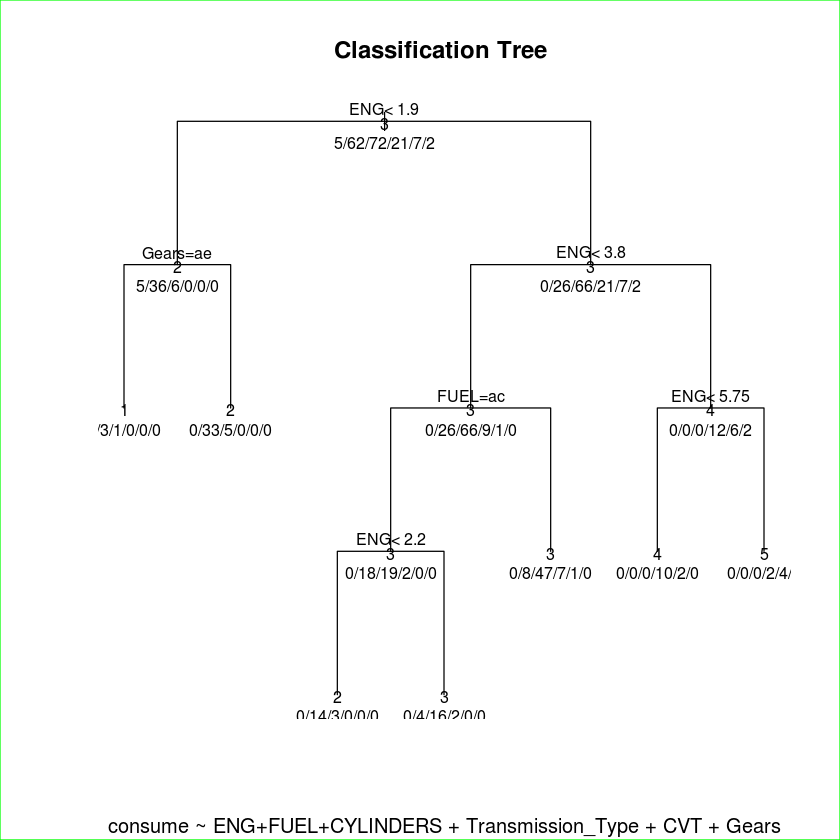


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] ENG  FUEL

Root node error: 97/169 = 0.57396

n= 169 

        CP nsplit rel error  xerror     xstd
1 0.309278      0   1.00000 1.00000 0.066273
2 0.123711      1   0.69072 0.69072 0.065558
3 0.056701      2   0.56701 0.56701 0.062794
4 0.020619      4   0.45361 0.45361 0.058812
5 0.010000      5   0.43299 0.45361 0.058812


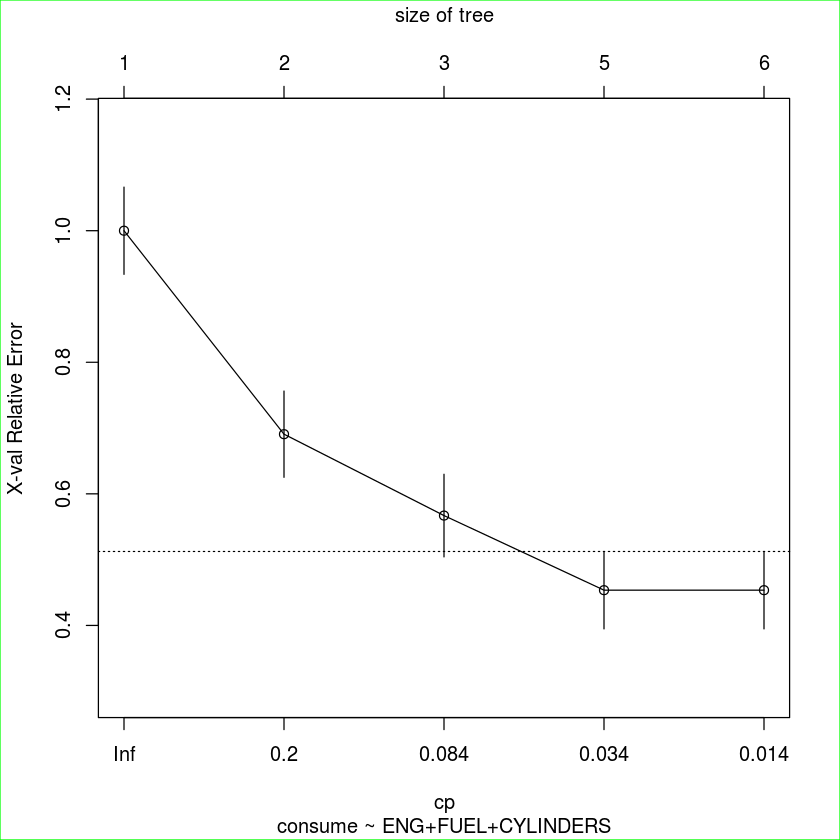

[1] "Model :  consume ~ CITY_L + HWY_L + CITY_MI + HWY_MI + CO2"


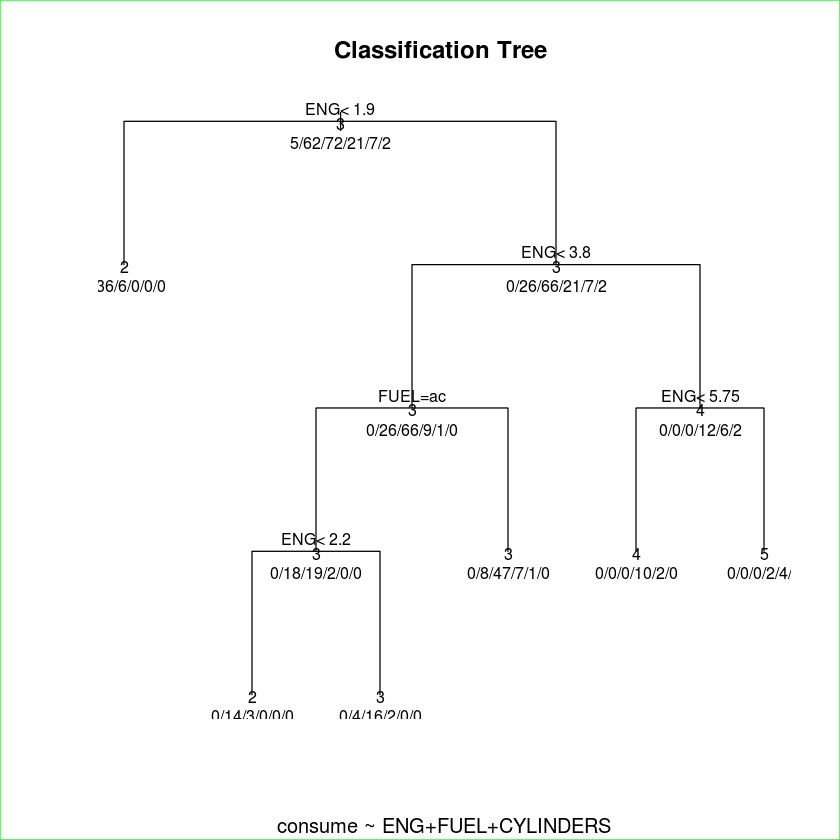


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] CITY_L CO2   

Root node error: 97/169 = 0.57396

n= 169 

        CP nsplit rel error  xerror     xstd
1 0.587629      0  1.000000 1.00000 0.066273
2 0.206186      1  0.412371 0.46392 0.059238
3 0.072165      2  0.206186 0.32990 0.052507
4 0.030928      3  0.134021 0.31959 0.051869
5 0.010309      4  0.103093 0.30928 0.051210
6 0.010000      5  0.092784 0.29897 0.050530


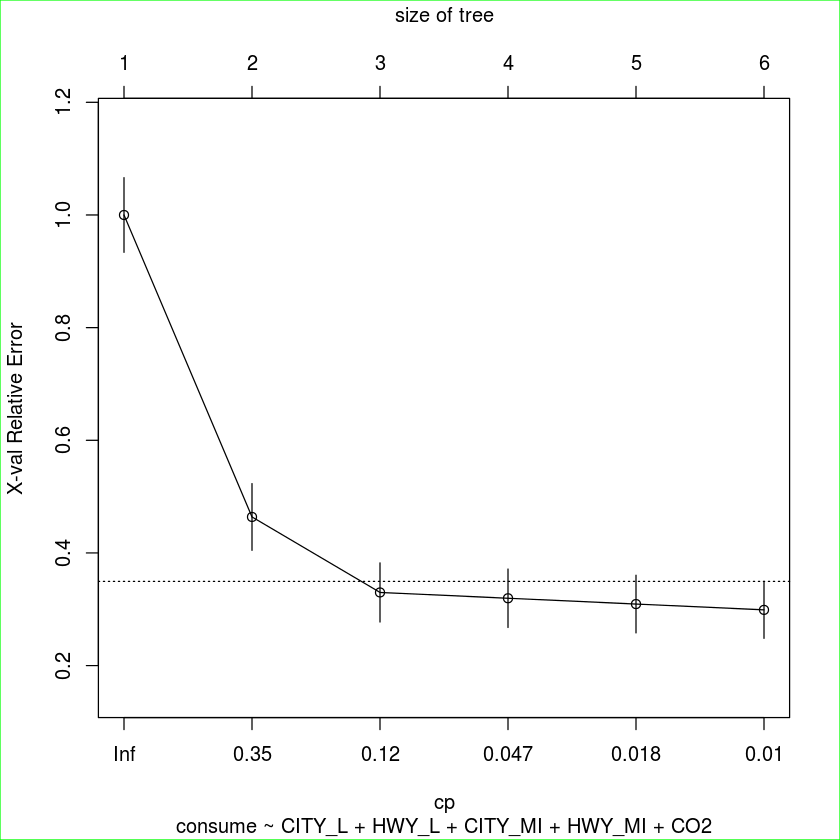

[1] "Possible Models for  SUVSMALL  -  154  observation(s)"
[1] "Model :  consume ~ ENG+FUEL+CYLINDERS + Transmission_Type + CVT + Gears"


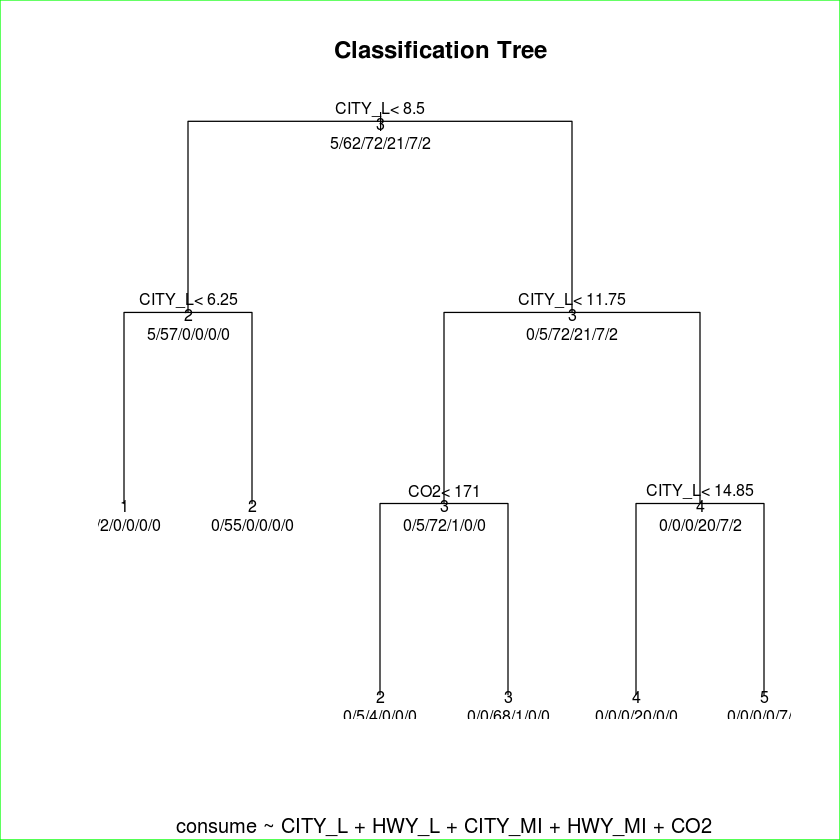


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] ENG   FUEL  Gears

Root node error: 57/154 = 0.37013

n= 154 

        CP nsplit rel error  xerror     xstd
1 0.350877      0   1.00000 1.00000 0.105121
2 0.052632      1   0.64912 0.64912 0.093016
3 0.017544      2   0.59649 0.73684 0.096961
4 0.010000      4   0.56140 0.77193 0.098353


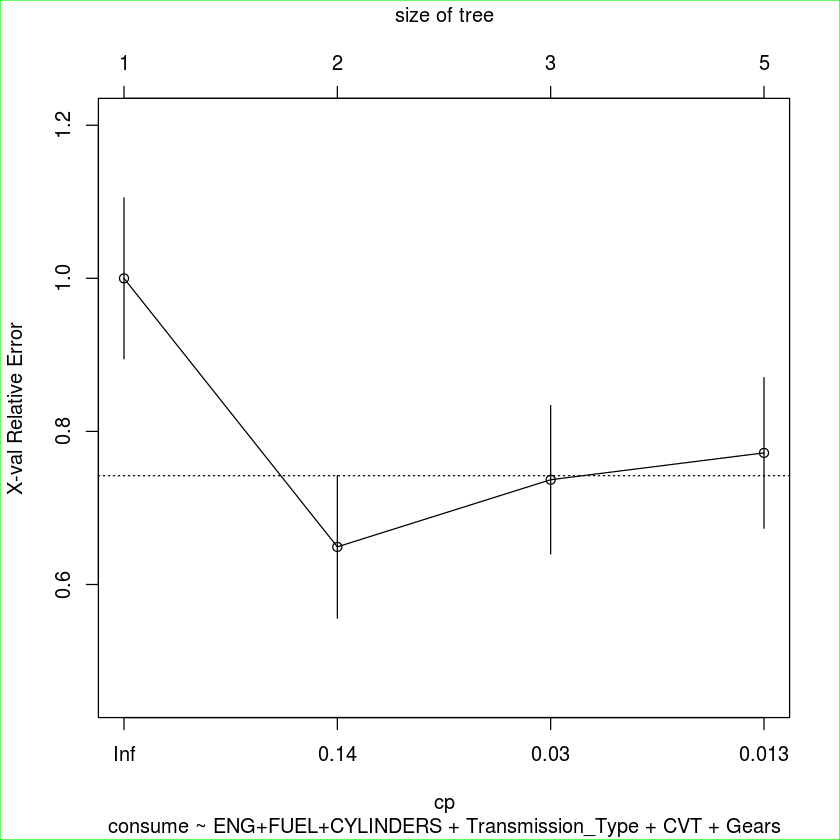

[1] "Model :  consume ~ ENG+FUEL+CYLINDERS"


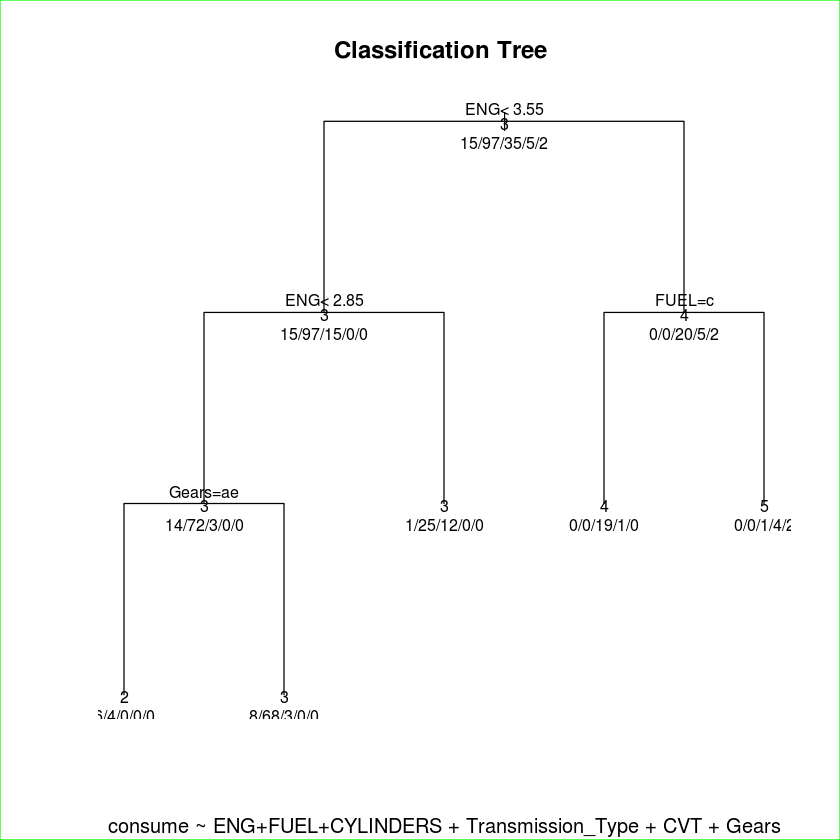


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] ENG  FUEL

Root node error: 57/154 = 0.37013

n= 154 

        CP nsplit rel error  xerror     xstd
1 0.350877      0   1.00000 1.00000 0.105121
2 0.052632      1   0.64912 0.64912 0.093016
3 0.010000      2   0.59649 0.64912 0.093016


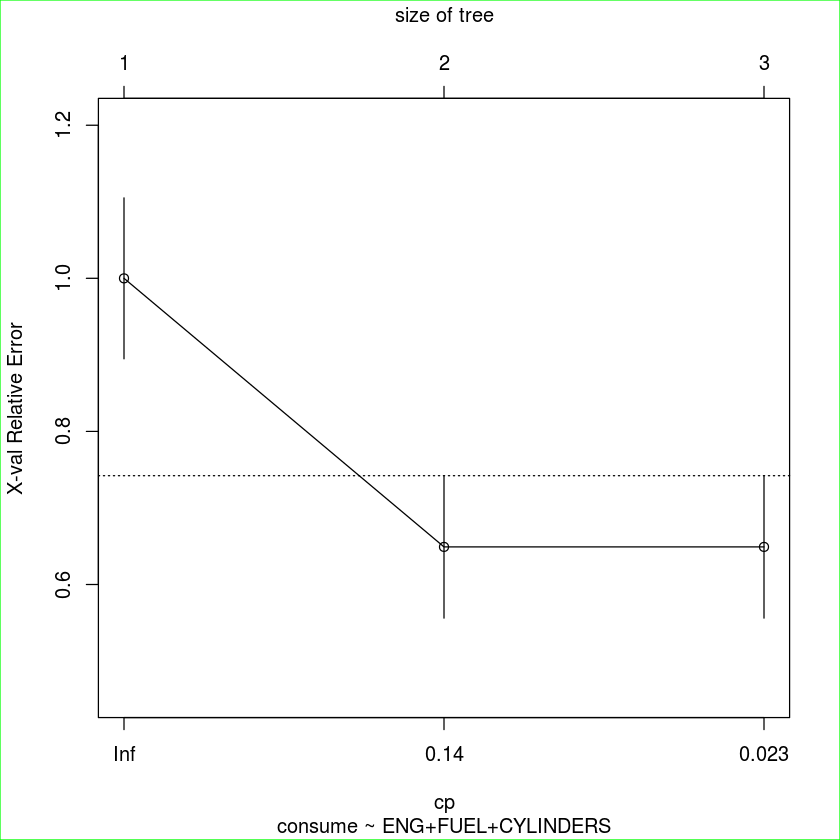

[1] "Model :  consume ~ CITY_L + HWY_L + CITY_MI + HWY_MI + CO2"


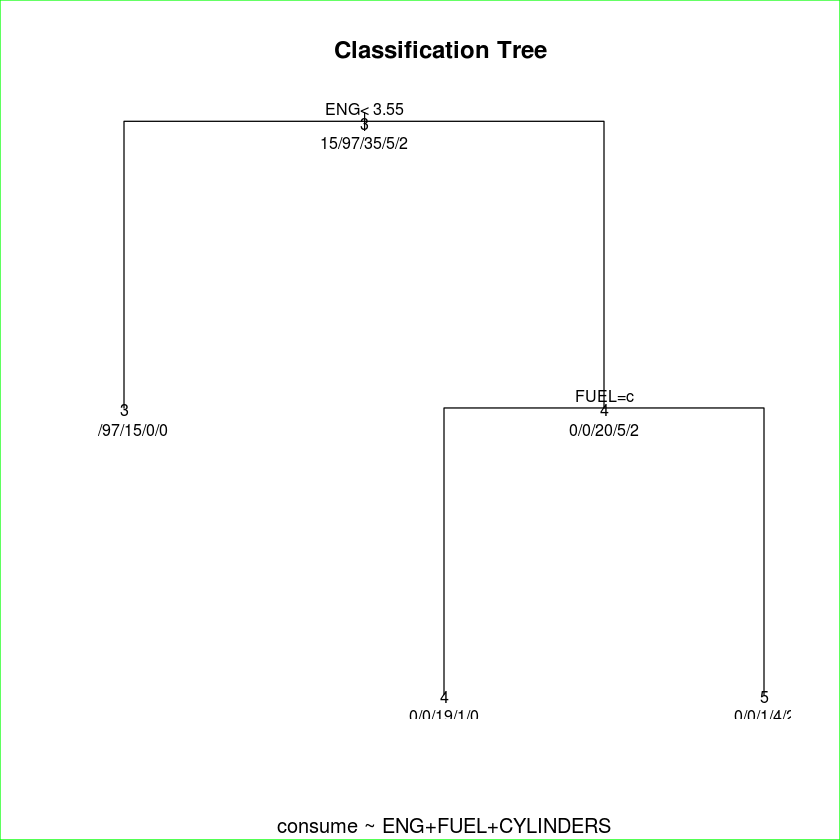


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] CITY_L CO2   

Root node error: 57/154 = 0.37013

n= 154 

        CP nsplit rel error   xerror     xstd
1 0.614035      0  1.000000 1.000000 0.105121
2 0.245614      1  0.385965 0.385965 0.076184
3 0.087719      2  0.140351 0.157895 0.051070
4 0.010000      3  0.052632 0.087719 0.038587


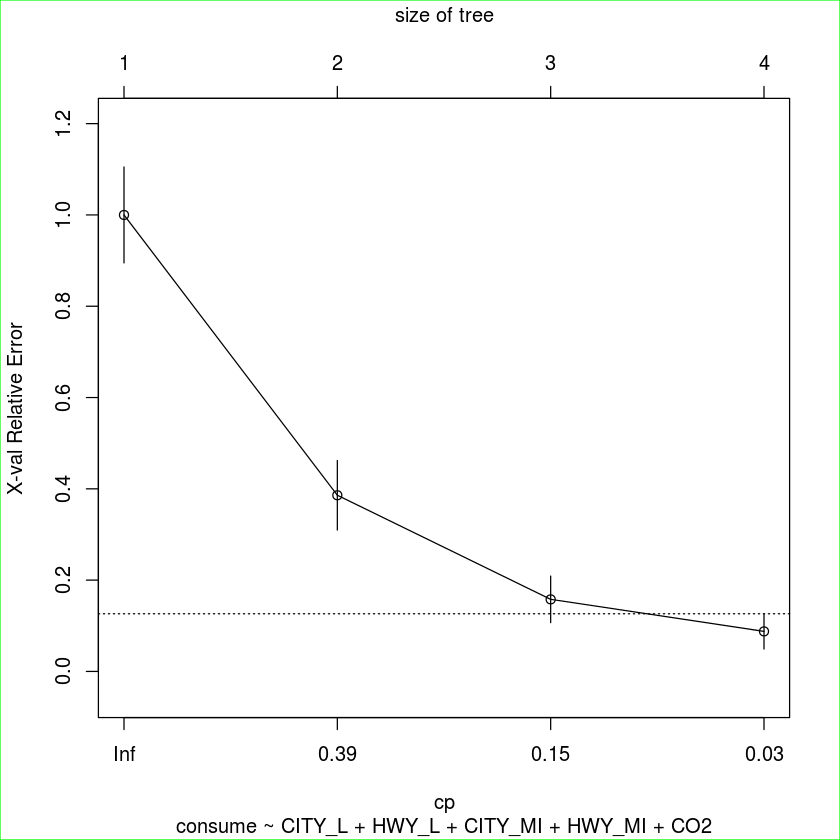

[1] "Possible Models for  MIDSIZE  -  184  observation(s)"
[1] "Model :  consume ~ ENG+FUEL+CYLINDERS + Transmission_Type + CVT + Gears"


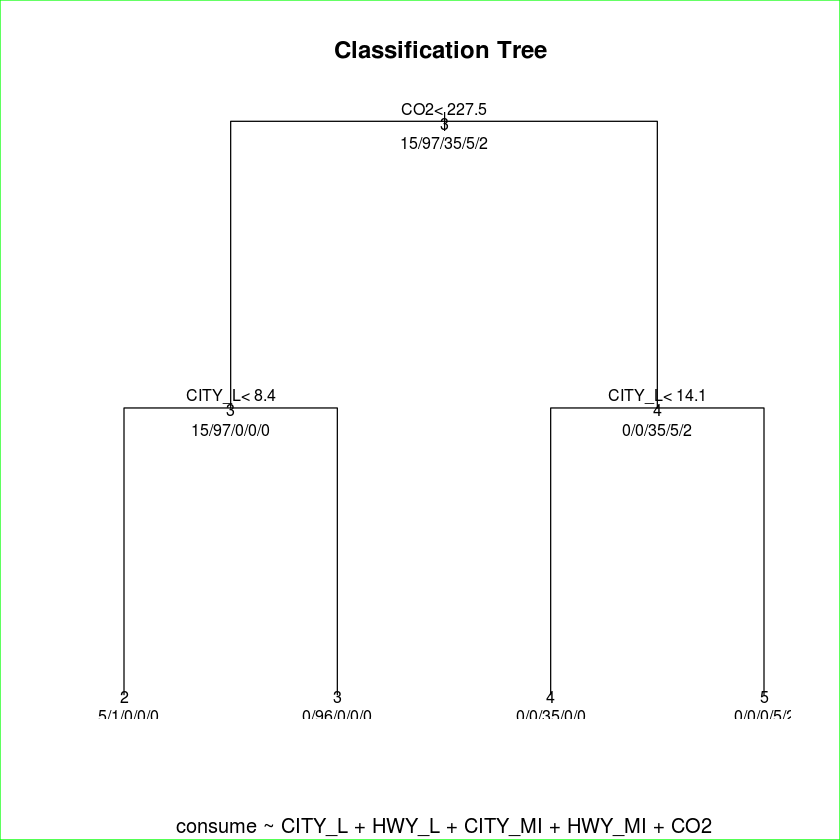


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] CVT       CYLINDERS ENG       FUEL      Gears    

Root node error: 117/184 = 0.63587

n= 184 

        CP nsplit rel error  xerror     xstd
1 0.264957      0   1.00000 1.11111 0.052793
2 0.153846      1   0.73504 0.73504 0.057845
3 0.085470      2   0.58120 0.63248 0.056848
4 0.034188      3   0.49573 0.49573 0.053865
5 0.017094      5   0.42735 0.46154 0.052793
6 0.010000      8   0.37607 0.48718 0.053610


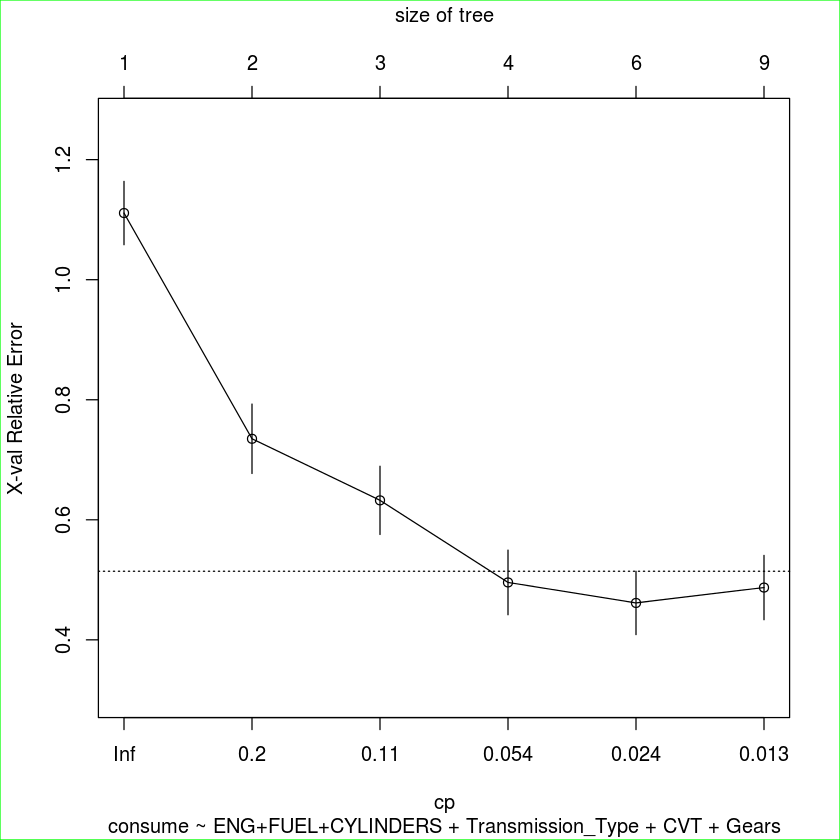

[1] "Model :  consume ~ ENG+FUEL+CYLINDERS"


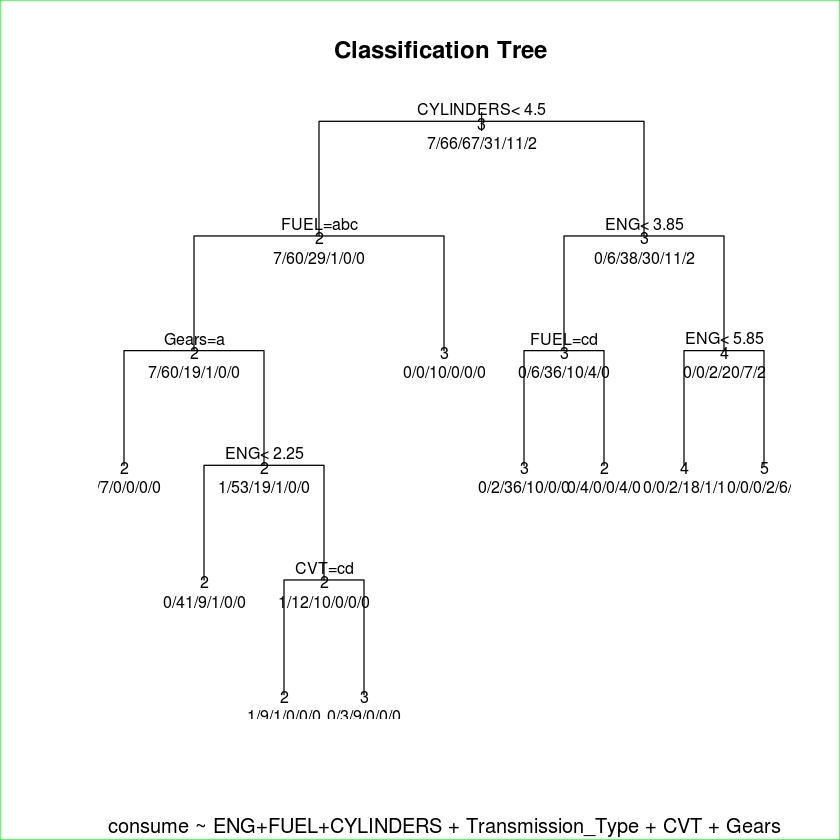


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] CYLINDERS ENG       FUEL     

Root node error: 117/184 = 0.63587

n= 184 

        CP nsplit rel error  xerror     xstd
1 0.264957      0   1.00000 1.15385 0.051247
2 0.153846      1   0.73504 0.87179 0.057625
3 0.085470      2   0.58120 0.59829 0.056287
4 0.034188      3   0.49573 0.50427 0.054111
5 0.010000      5   0.42735 0.47009 0.053074


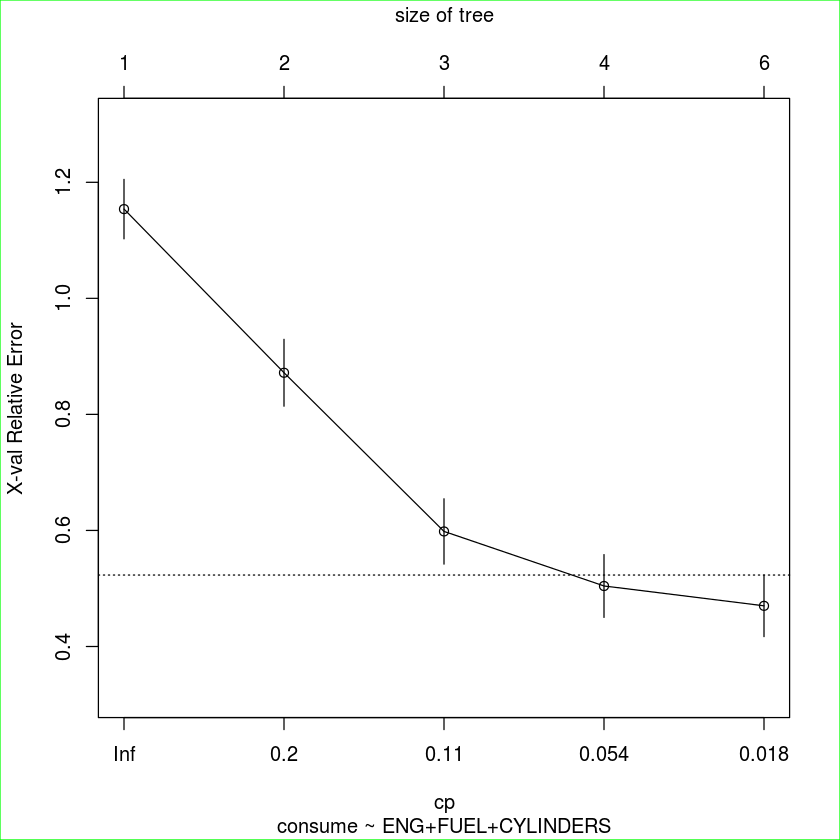

[1] "Model :  consume ~ CITY_L + HWY_L + CITY_MI + HWY_MI + CO2"


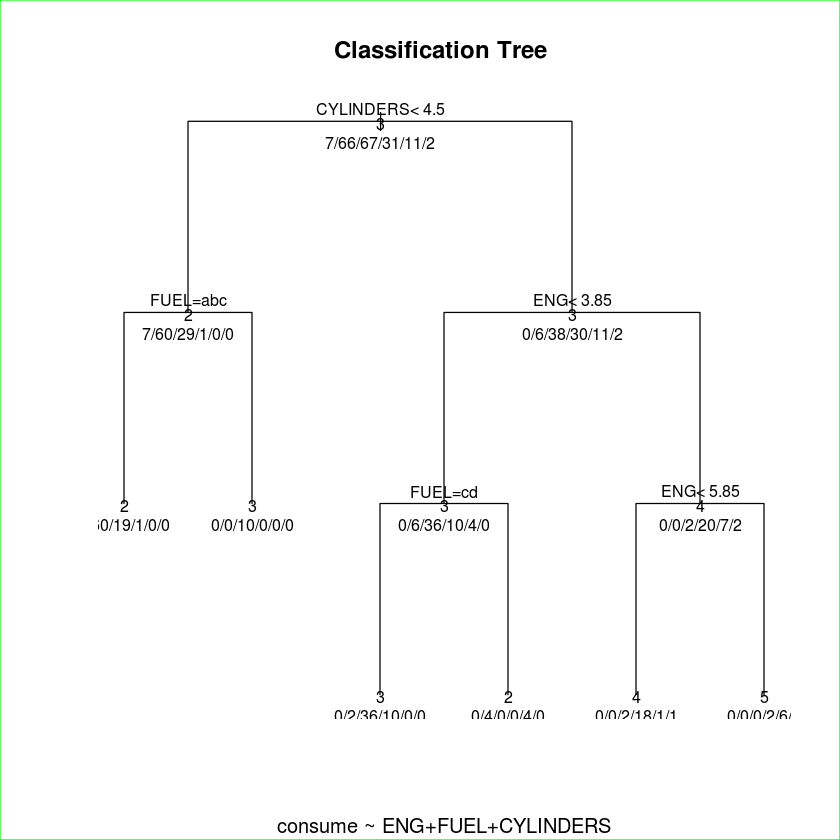


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] CITY_L CO2    HWY_L 

Root node error: 117/184 = 0.63587

n= 184 

        CP nsplit rel error  xerror     xstd
1 0.555556      0  1.000000 1.15385 0.051247
2 0.256410      1  0.444444 0.44444 0.052203
3 0.068376      2  0.188034 0.20513 0.039045
4 0.059829      3  0.119658 0.18803 0.037616
5 0.010000      4  0.059829 0.11111 0.029708


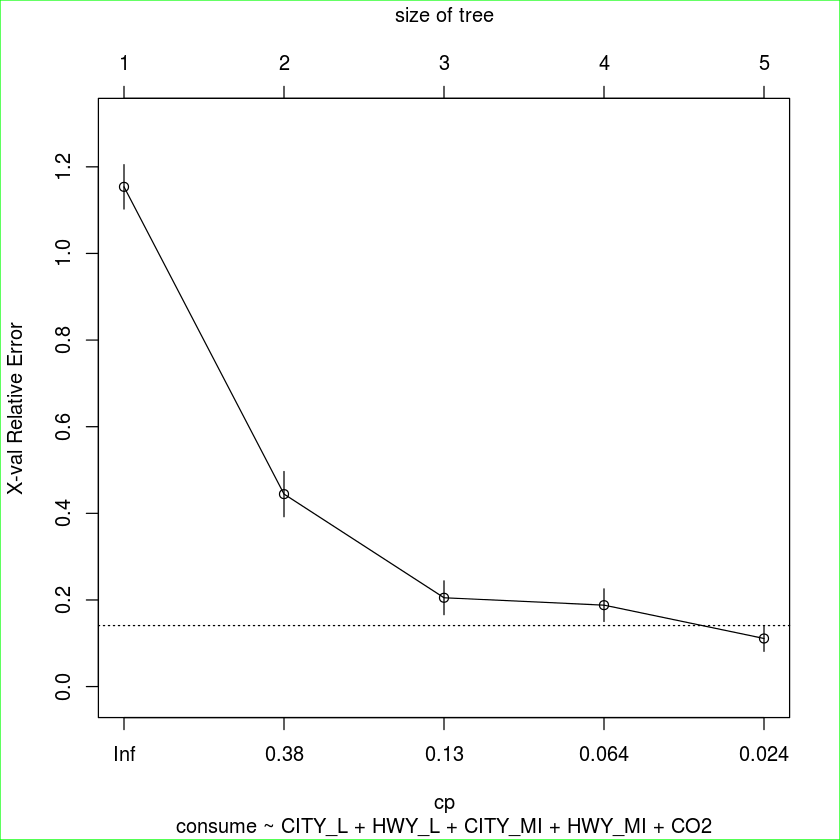

[1] "Possible Models for  MINICOMPACT  -  47  observation(s)"
[1] "Model :  consume ~ ENG+FUEL+CYLINDERS + Transmission_Type + CVT + Gears"


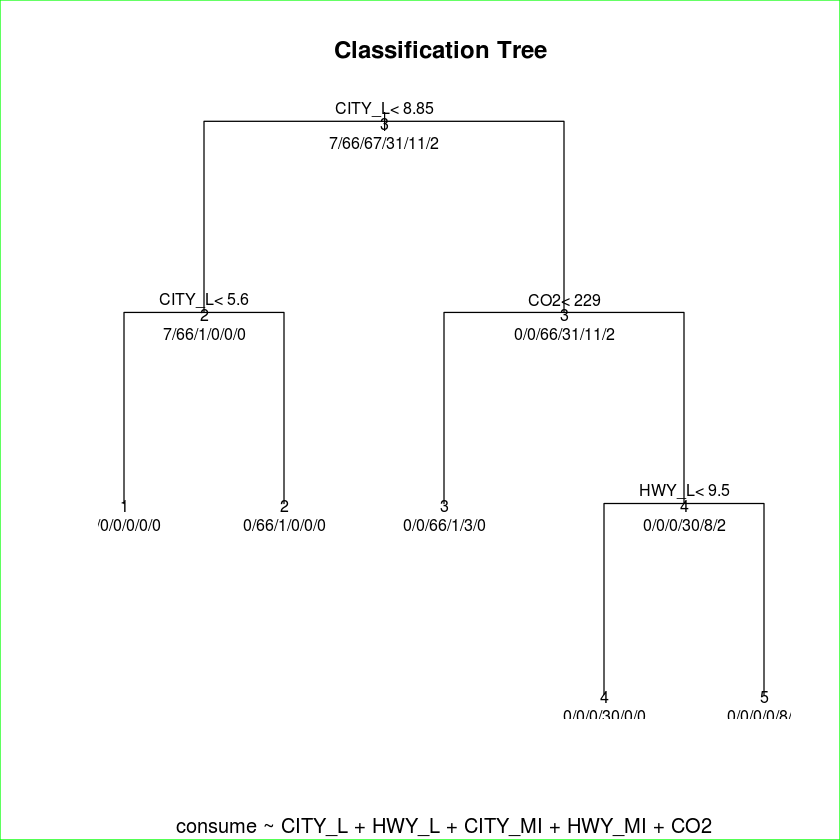


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] ENG

Root node error: 29/47 = 0.61702

n= 47 

       CP nsplit rel error  xerror     xstd
1 0.51724      0   1.00000 1.31034 0.093018
2 0.20690      1   0.48276 0.55172 0.112020
3 0.01000      2   0.27586 0.37931 0.100092


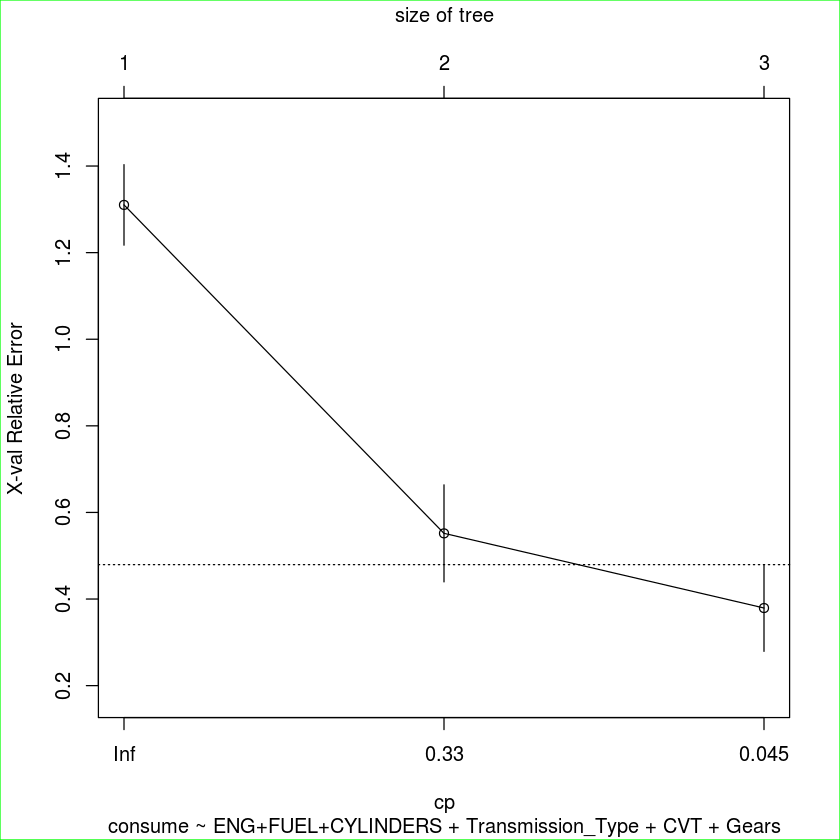

[1] "Model :  consume ~ ENG+FUEL+CYLINDERS"


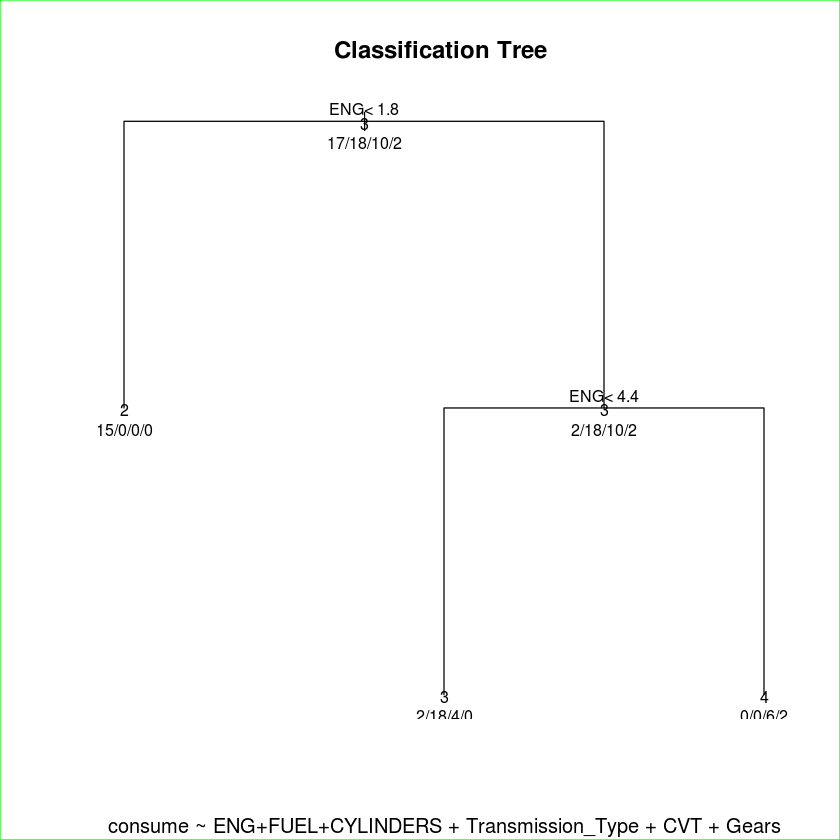


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] ENG

Root node error: 29/47 = 0.61702

n= 47 

       CP nsplit rel error  xerror     xstd
1 0.51724      0   1.00000 1.34483 0.088844
2 0.20690      1   0.48276 0.55172 0.112020
3 0.01000      2   0.27586 0.48276 0.108112


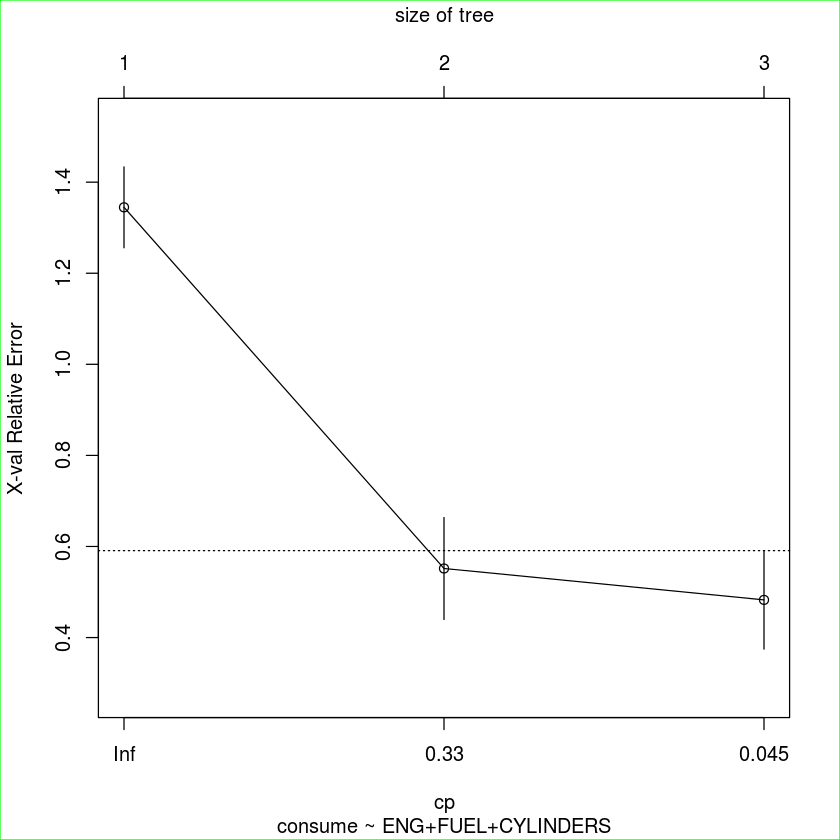

[1] "Model :  consume ~ CITY_L + HWY_L + CITY_MI + HWY_MI + CO2"


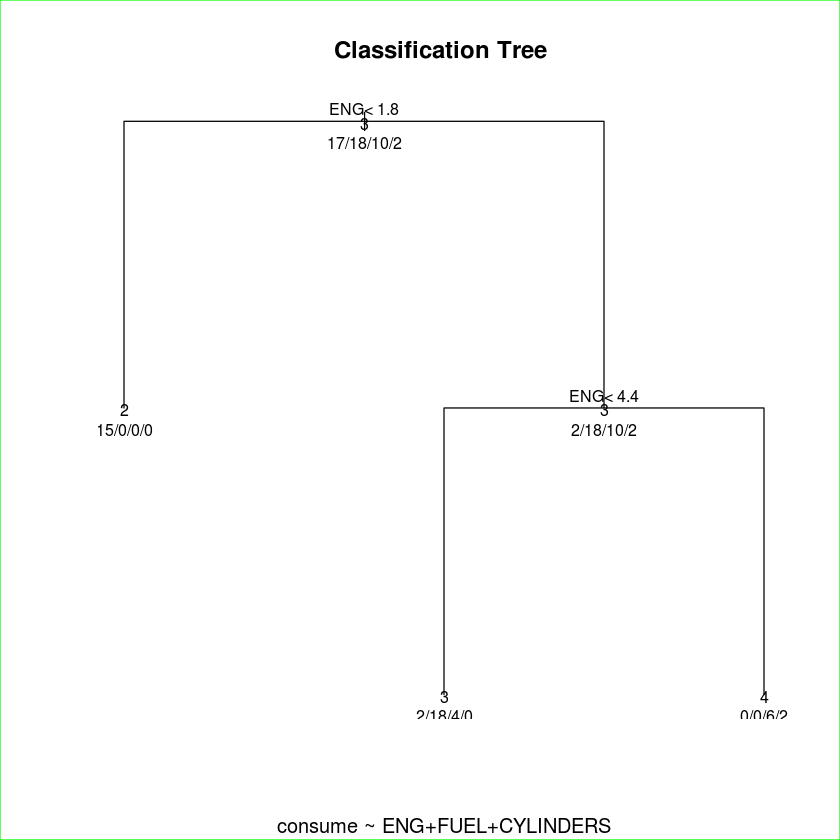


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] CITY_L

Root node error: 29/47 = 0.61702

n= 47 

       CP nsplit rel error   xerror     xstd
1 0.58621      0  1.000000 1.172414 0.105746
2 0.34483      1  0.413793 0.413793 0.103081
3 0.01000      2  0.068966 0.068966 0.047717


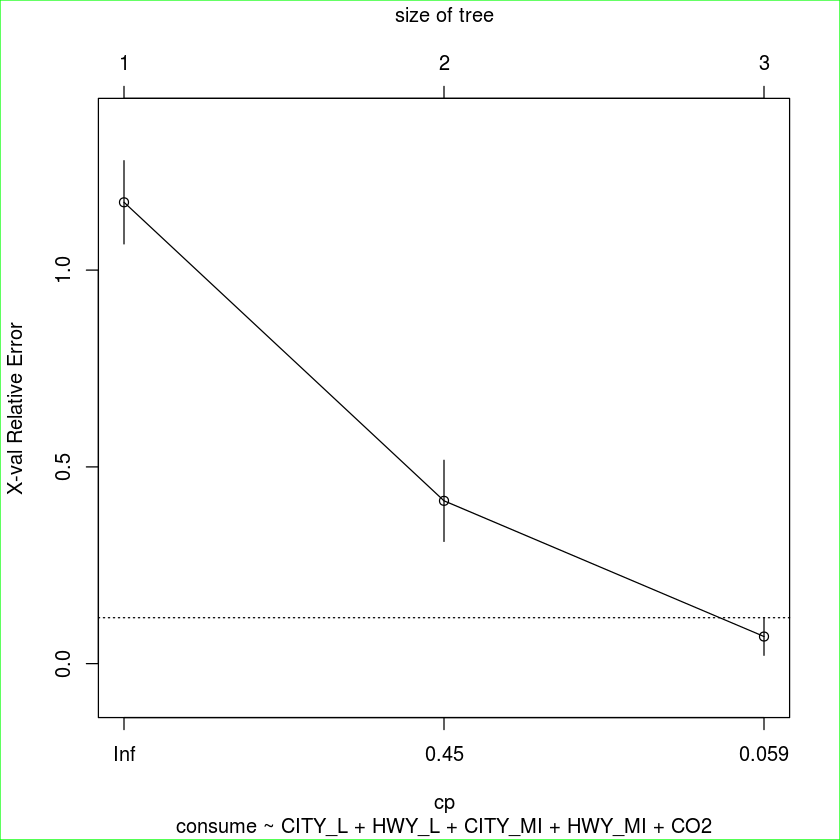

[1] "Possible Models for  SUBCOMPACT  -  64  observation(s)"
[1] "Model :  consume ~ ENG+FUEL+CYLINDERS + Transmission_Type + CVT + Gears"


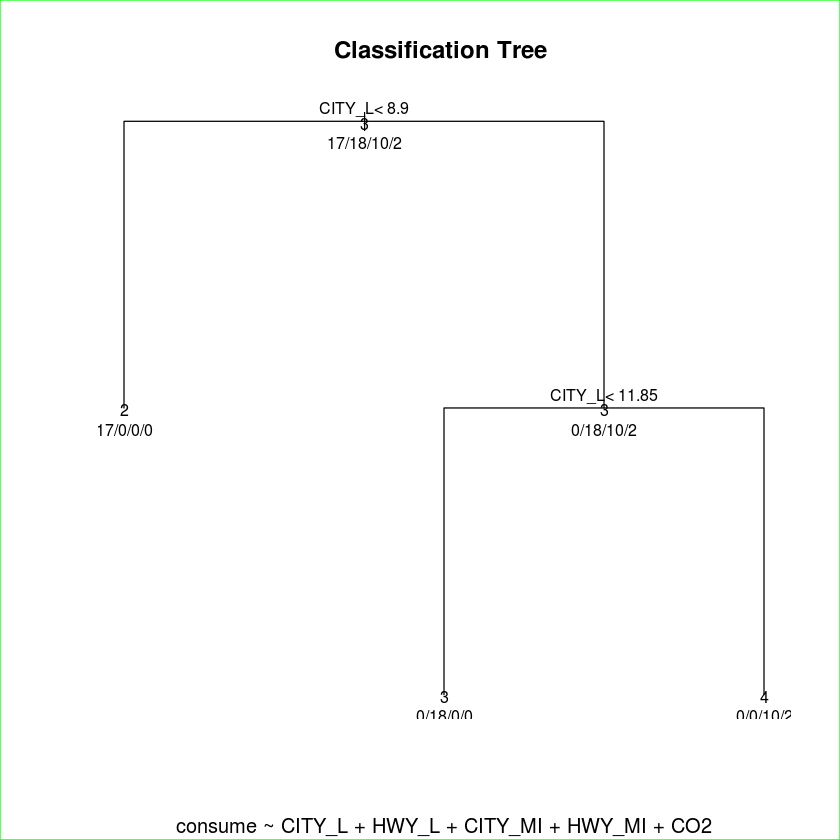


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] ENG

Root node error: 41/64 = 0.64062

n= 64 

       CP nsplit rel error  xerror     xstd
1 0.36585      0   1.00000 1.00000 0.093623
2 0.26829      1   0.63415 0.65854 0.096363
3 0.02439      2   0.36585 0.48780 0.090441
4 0.01000      3   0.34146 0.56098 0.093623


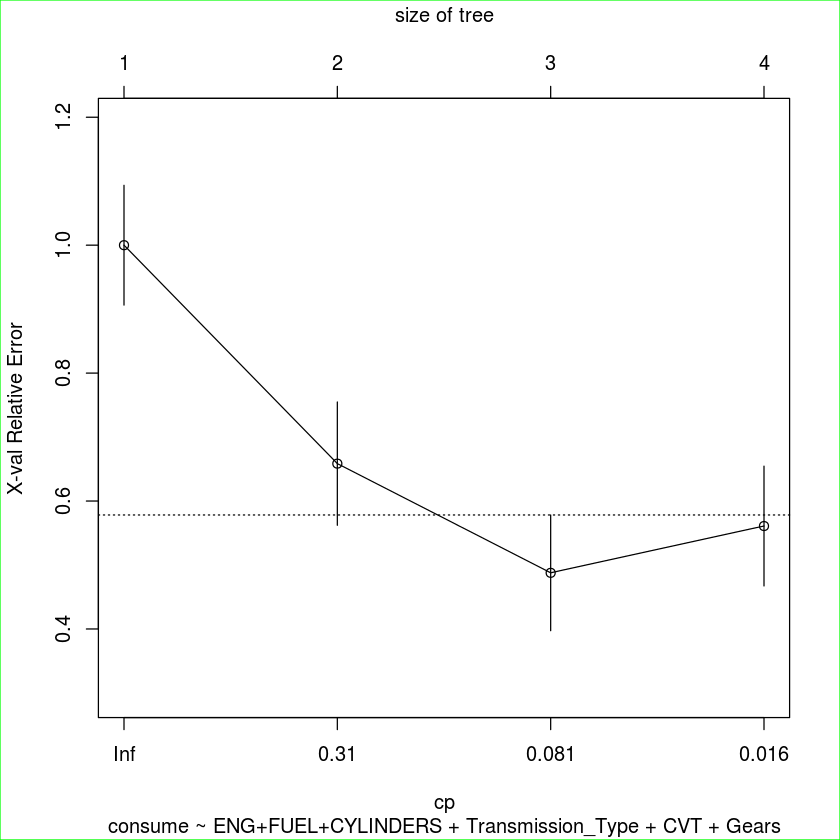

[1] "Model :  consume ~ ENG+FUEL+CYLINDERS"


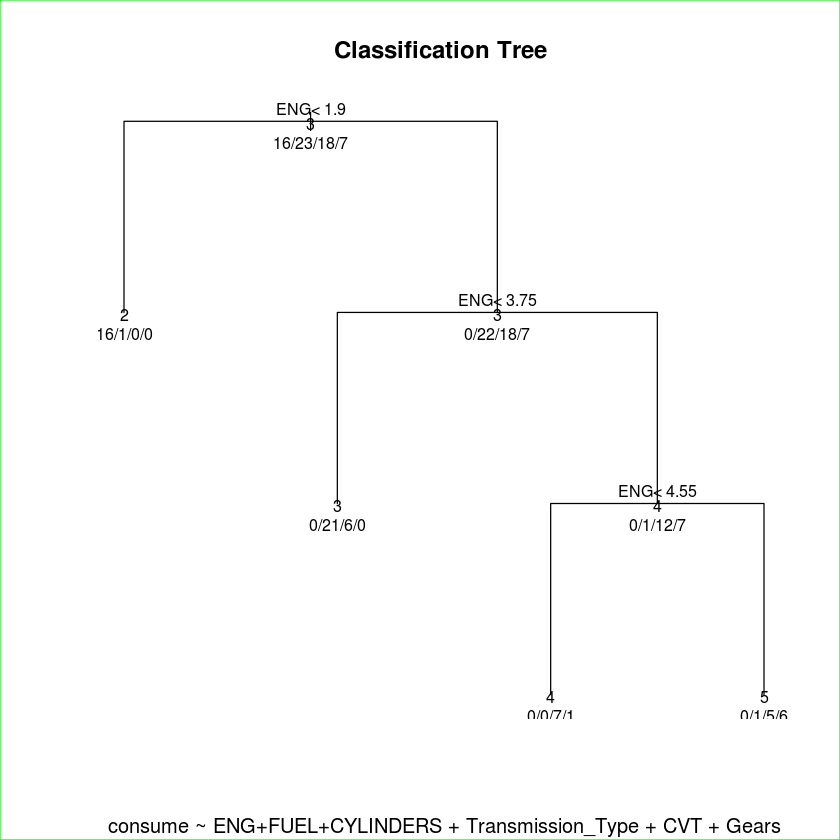


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] ENG

Root node error: 41/64 = 0.64062

n= 64 

       CP nsplit rel error  xerror     xstd
1 0.36585      0   1.00000 1.00000 0.093623
2 0.26829      1   0.63415 0.63415 0.095831
3 0.02439      2   0.36585 0.43902 0.087729
4 0.01000      3   0.34146 0.46341 0.089148


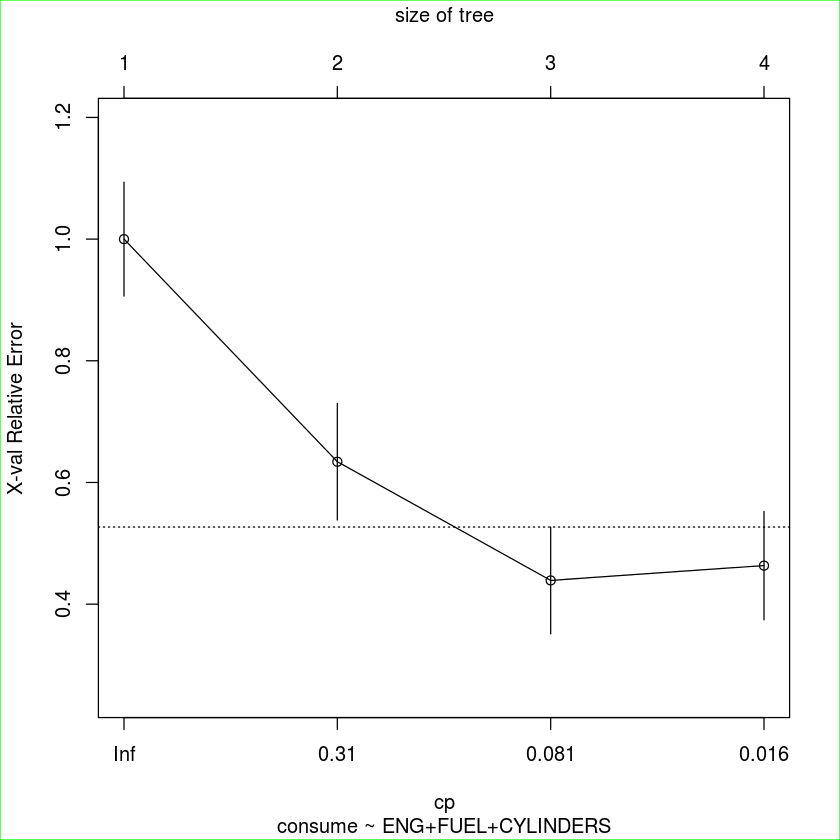

[1] "Model :  consume ~ CITY_L + HWY_L + CITY_MI + HWY_MI + CO2"


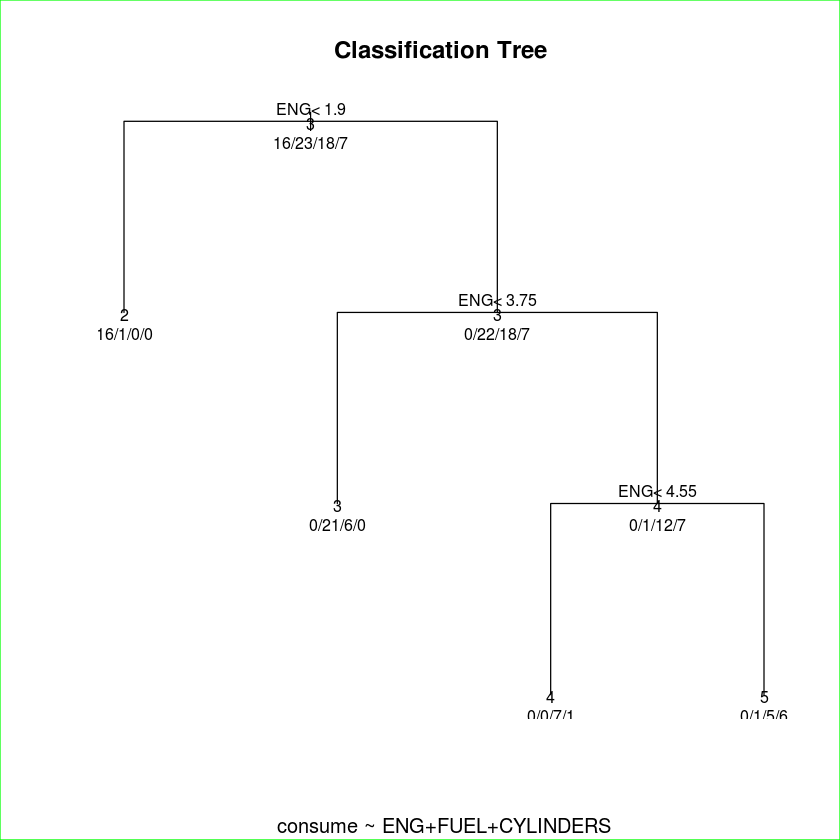


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] CITY_L HWY_L 

Root node error: 41/64 = 0.64062

n= 64 

       CP nsplit rel error  xerror     xstd
1 0.43902      0   1.00000 1.00000 0.093623
2 0.39024      1   0.56098 0.80488 0.097513
3 0.17073      2   0.17073 0.24390 0.070847
4 0.01000      3   0.00000 0.17073 0.060899


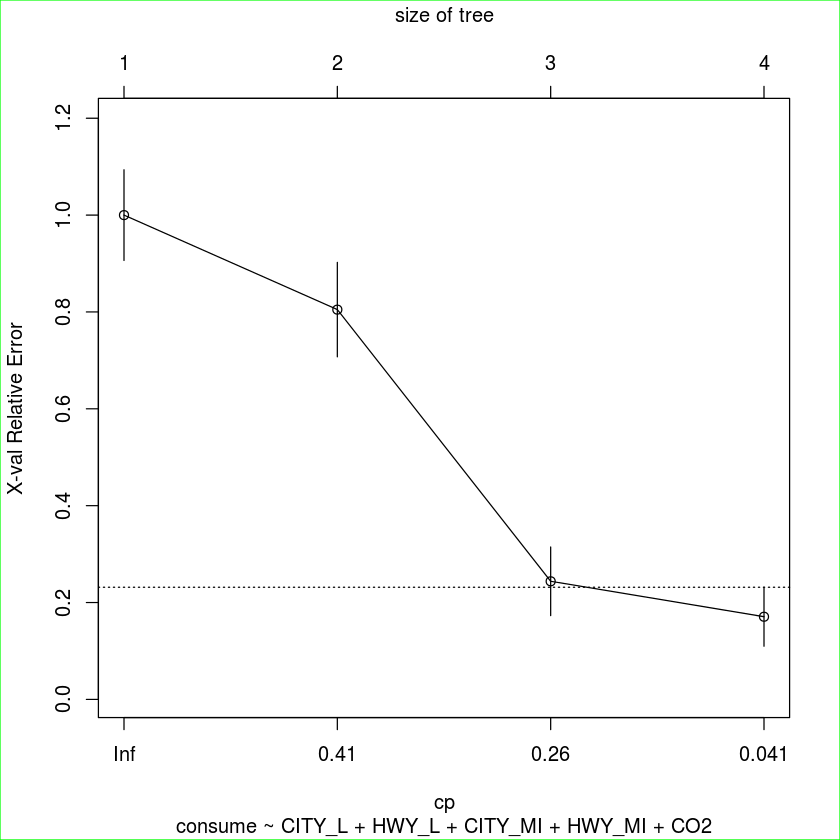

[1] "Possible Models for  TWOSEATER  -  71  observation(s)"
[1] "Model :  consume ~ ENG+FUEL+CYLINDERS + Transmission_Type + CVT + Gears"


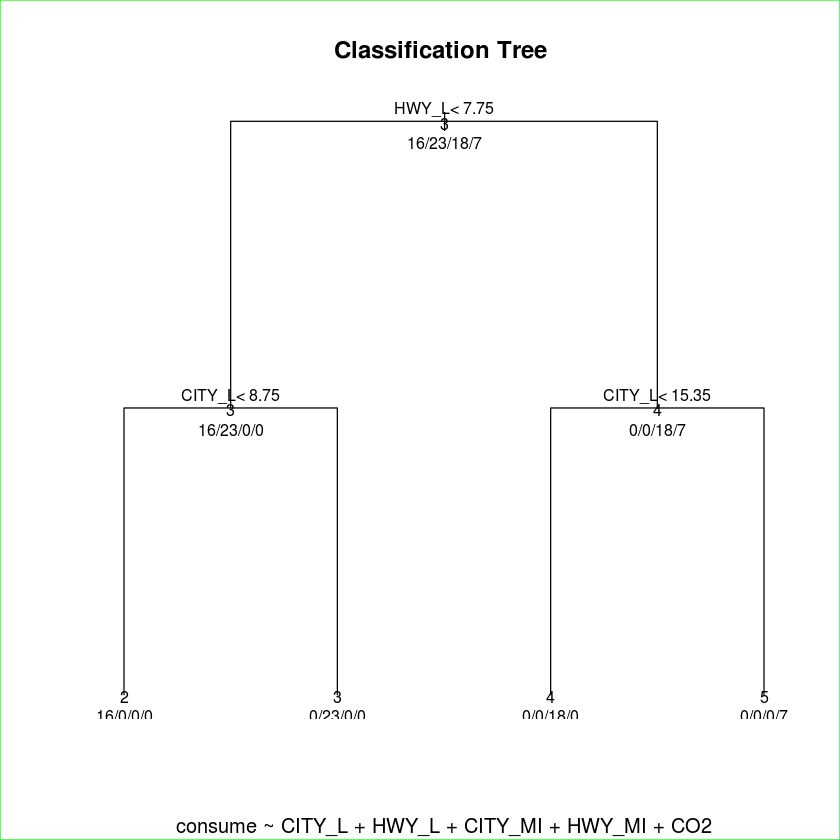


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] ENG               Transmission_Type

Root node error: 46/71 = 0.64789

n= 71 

       CP nsplit rel error  xerror     xstd
1 0.34783      0   1.00000 1.00000 0.087491
2 0.23913      1   0.65217 0.67391 0.090850
3 0.10870      2   0.41304 0.45652 0.083600
4 0.01000      3   0.30435 0.39130 0.079687


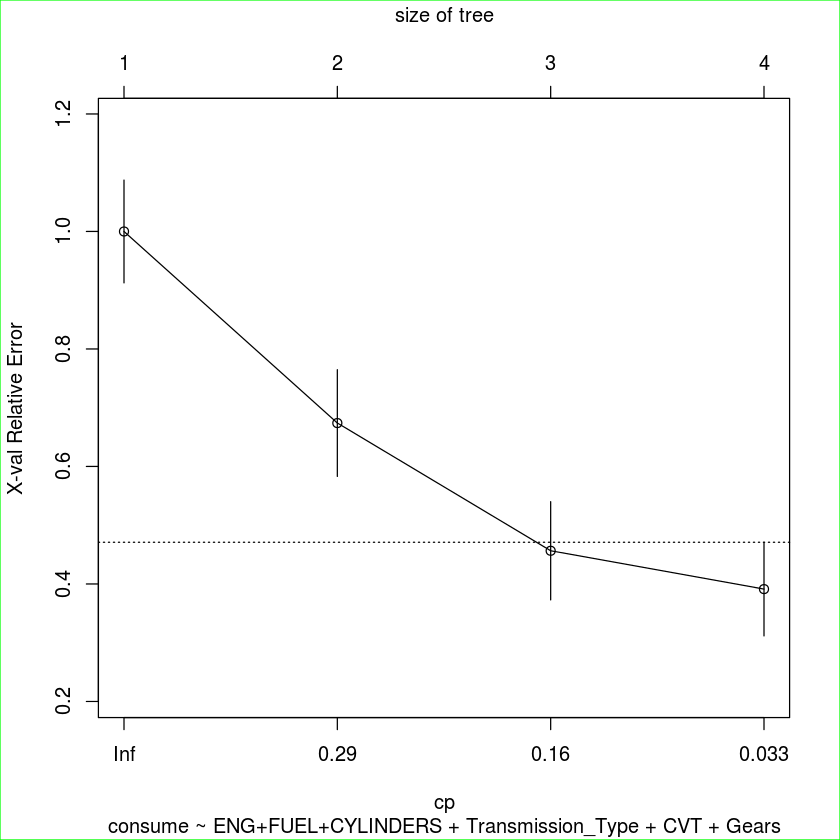

[1] "Model :  consume ~ ENG+FUEL+CYLINDERS"


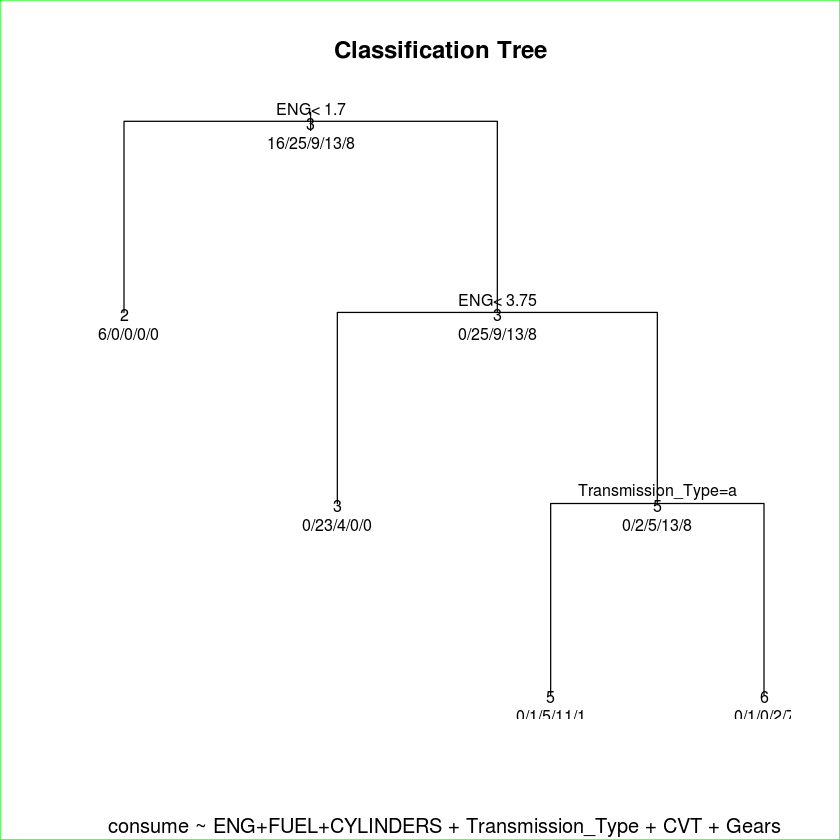


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] CYLINDERS ENG      

Root node error: 46/71 = 0.64789

n= 71 

        CP nsplit rel error  xerror     xstd
1 0.347826      0   1.00000 1.00000 0.087491
2 0.239130      1   0.65217 0.65217 0.090483
3 0.065217      2   0.41304 0.45652 0.083600
4 0.010000      3   0.34783 0.43478 0.082397


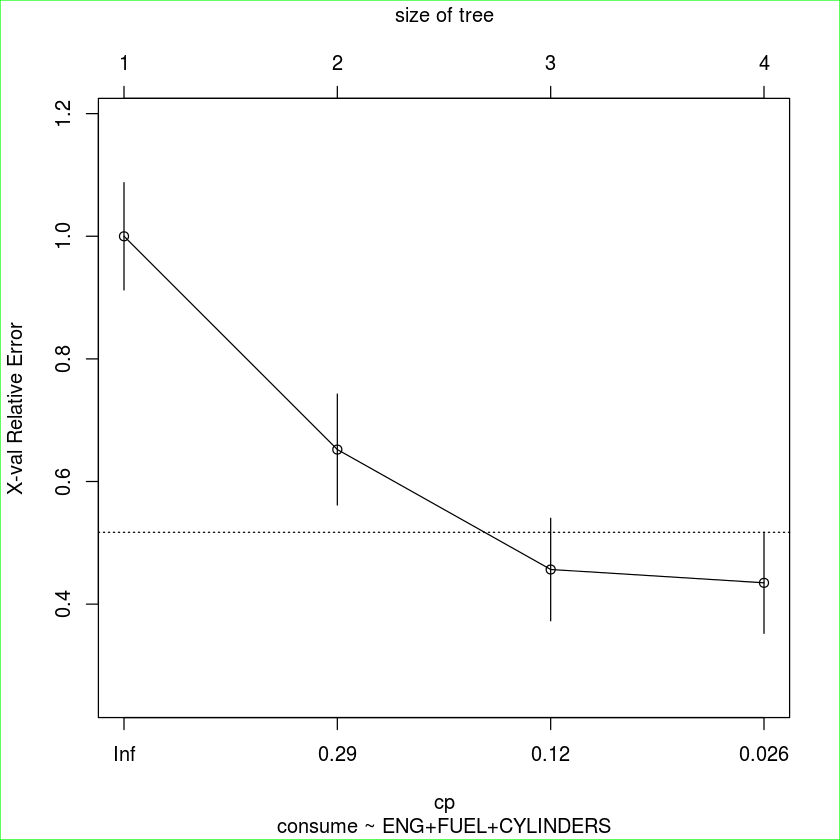

[1] "Model :  consume ~ CITY_L + HWY_L + CITY_MI + HWY_MI + CO2"


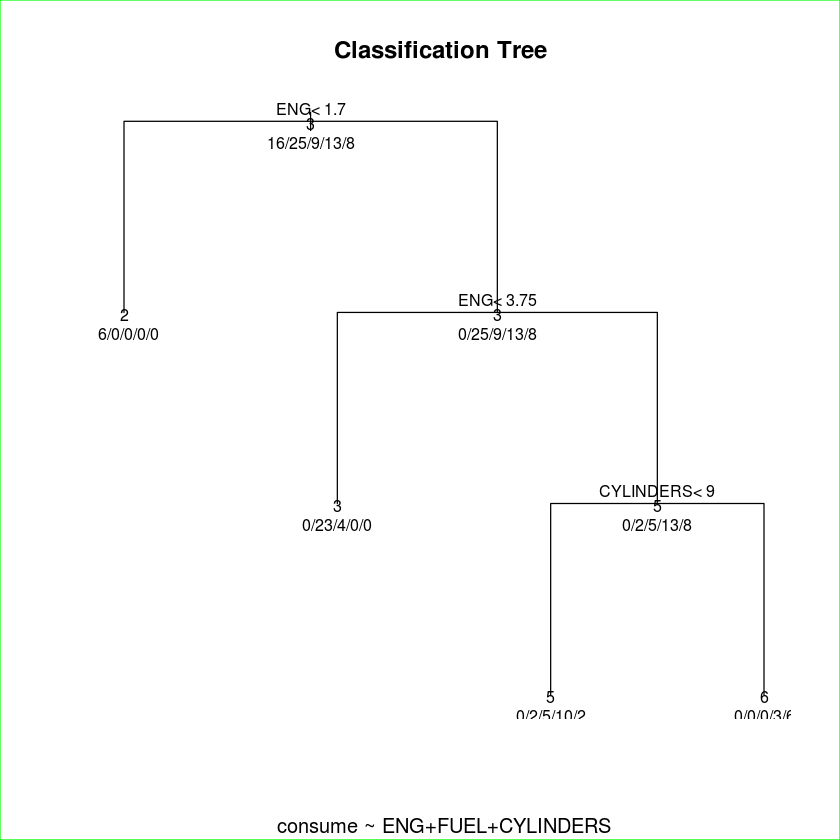


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] CITY_L CO2   

Root node error: 46/71 = 0.64789

n= 71 

       CP nsplit rel error  xerror     xstd
1 0.34783      0   1.00000 1.00000 0.087491
2 0.28261      1   0.65217 0.71739 0.091361
3 0.19565      2   0.36957 0.41304 0.081095
4 0.17391      3   0.17391 0.36957 0.078169
5 0.01000      4   0.00000 0.34783 0.076534


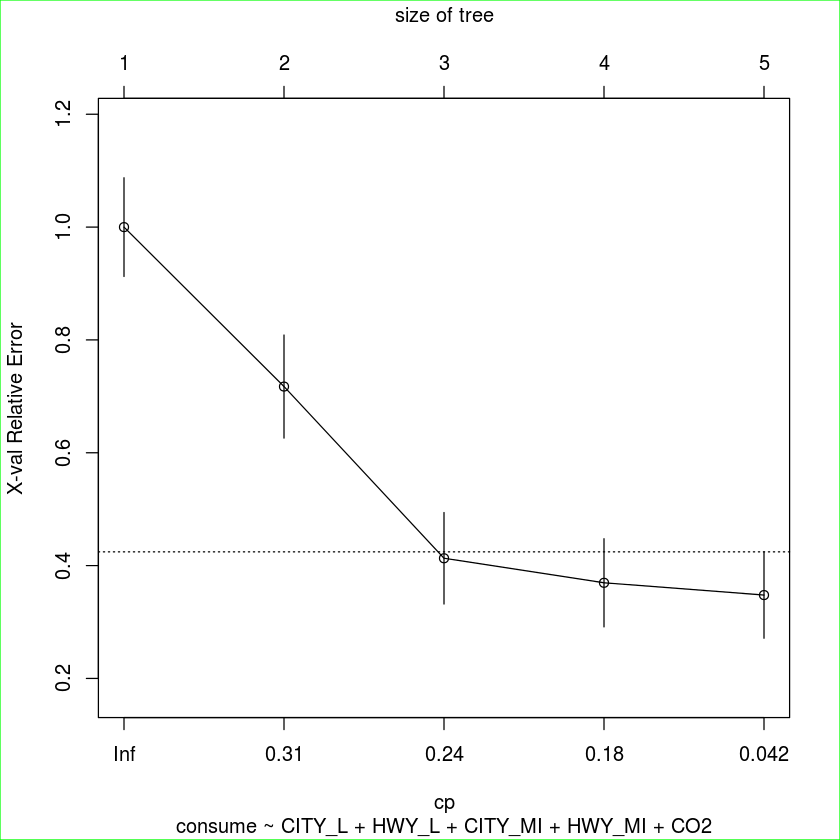

[1] "Possible Models for  FULLSIZE  -  82  observation(s)"
[1] "Model :  consume ~ ENG+FUEL+CYLINDERS + Transmission_Type + CVT + Gears"


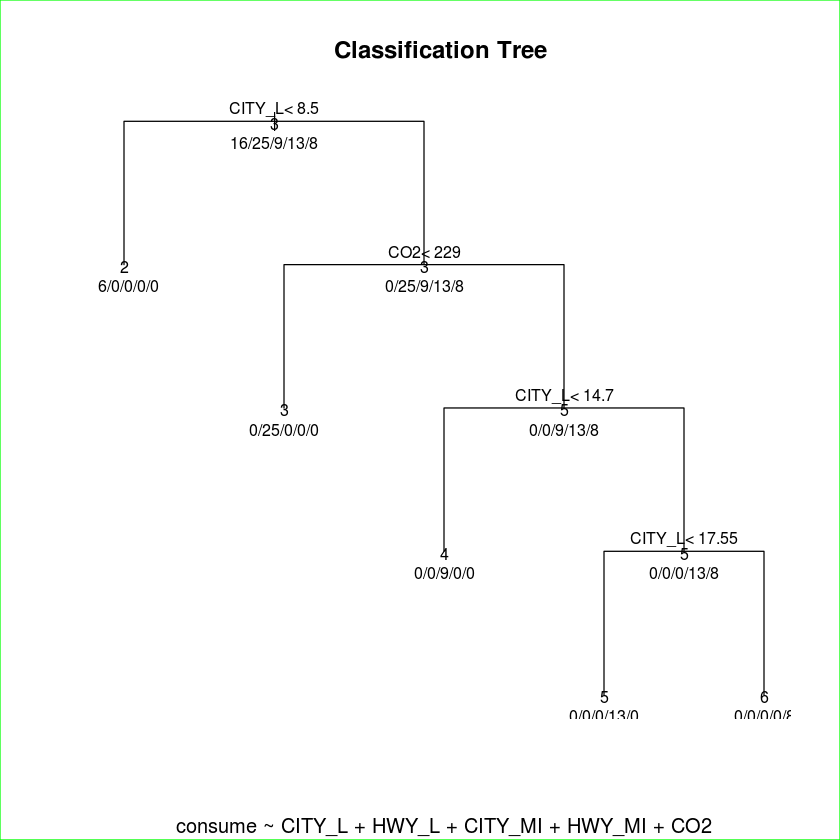


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] ENG  FUEL

Root node error: 49/82 = 0.59756

n= 82 

        CP nsplit rel error  xerror     xstd
1 0.408163      0   1.00000 1.14286 0.085996
2 0.122449      1   0.59184 0.61224 0.089014
3 0.040816      2   0.46939 0.51020 0.085075
4 0.010000      3   0.42857 0.53061 0.085996


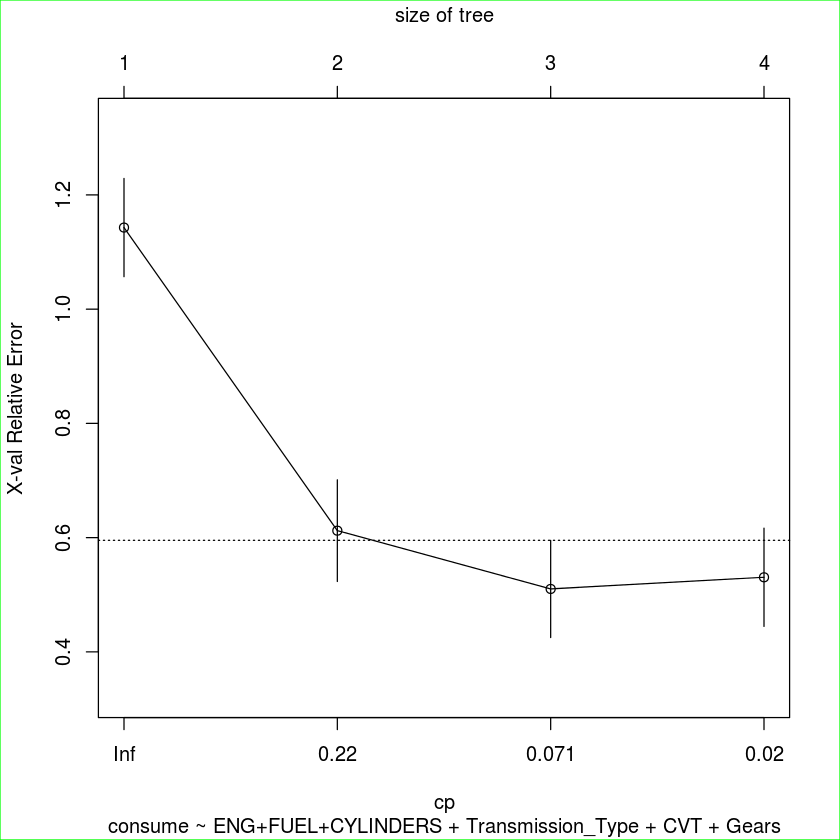

[1] "Model :  consume ~ ENG+FUEL+CYLINDERS"


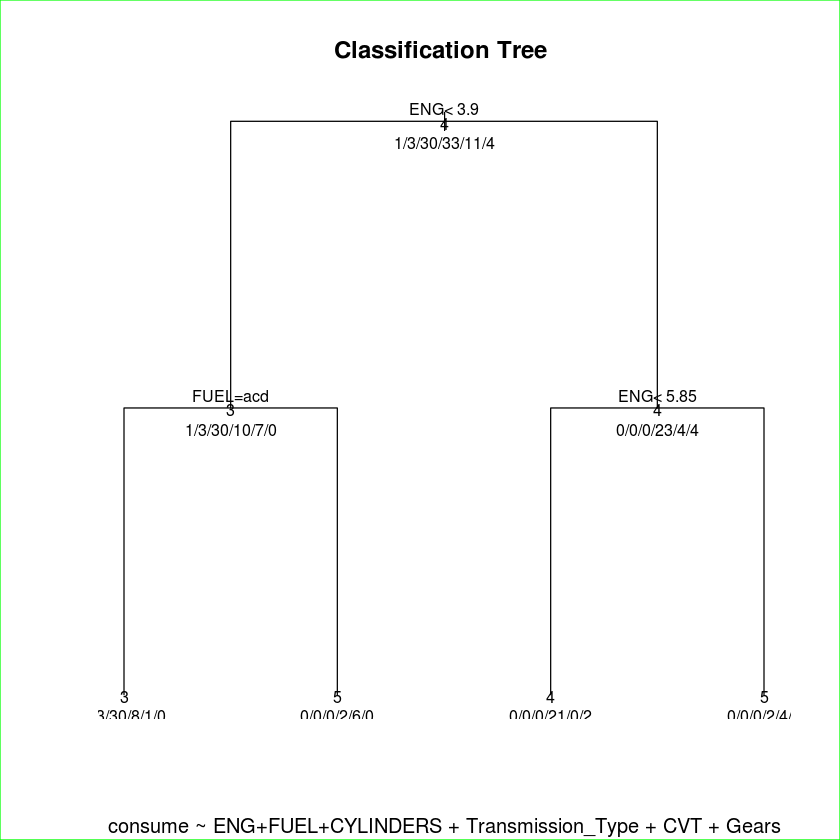


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] ENG  FUEL

Root node error: 49/82 = 0.59756

n= 82 

        CP nsplit rel error  xerror     xstd
1 0.408163      0   1.00000 1.18367 0.084085
2 0.122449      1   0.59184 0.61224 0.089014
3 0.040816      2   0.46939 0.48980 0.084085
4 0.010000      3   0.42857 0.44898 0.081881


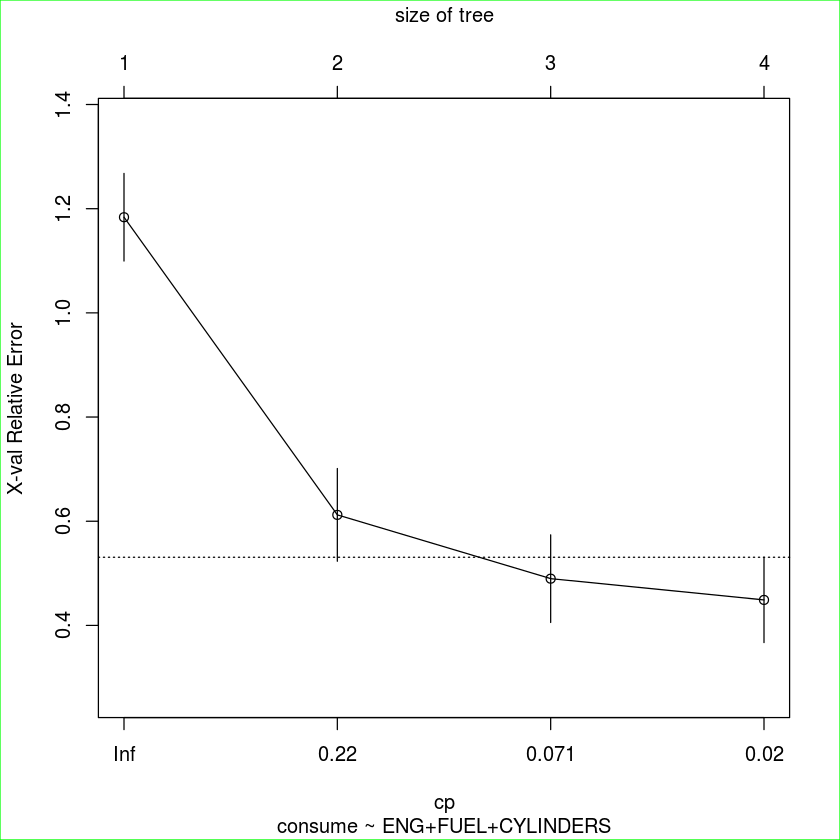

[1] "Model :  consume ~ CITY_L + HWY_L + CITY_MI + HWY_MI + CO2"


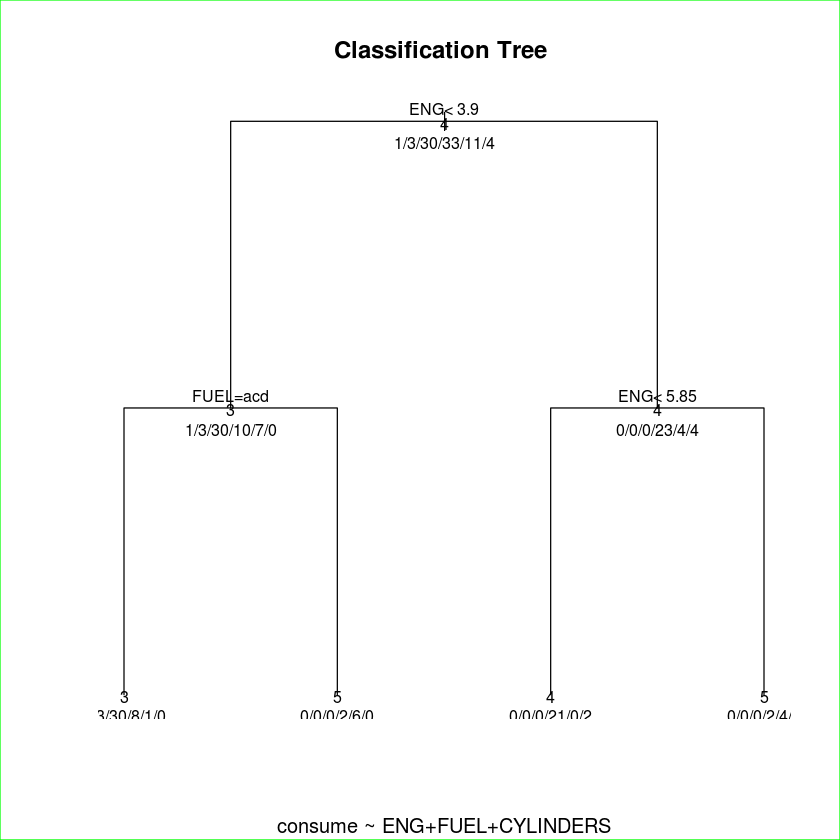


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] CITY_L HWY_L 

Root node error: 49/82 = 0.59756

n= 82 

       CP nsplit rel error  xerror     xstd
1 0.61224      0   1.00000 1.24490 0.080662
2 0.22449      1   0.38776 0.40816 0.079361
3 0.01000      2   0.16327 0.20408 0.060473


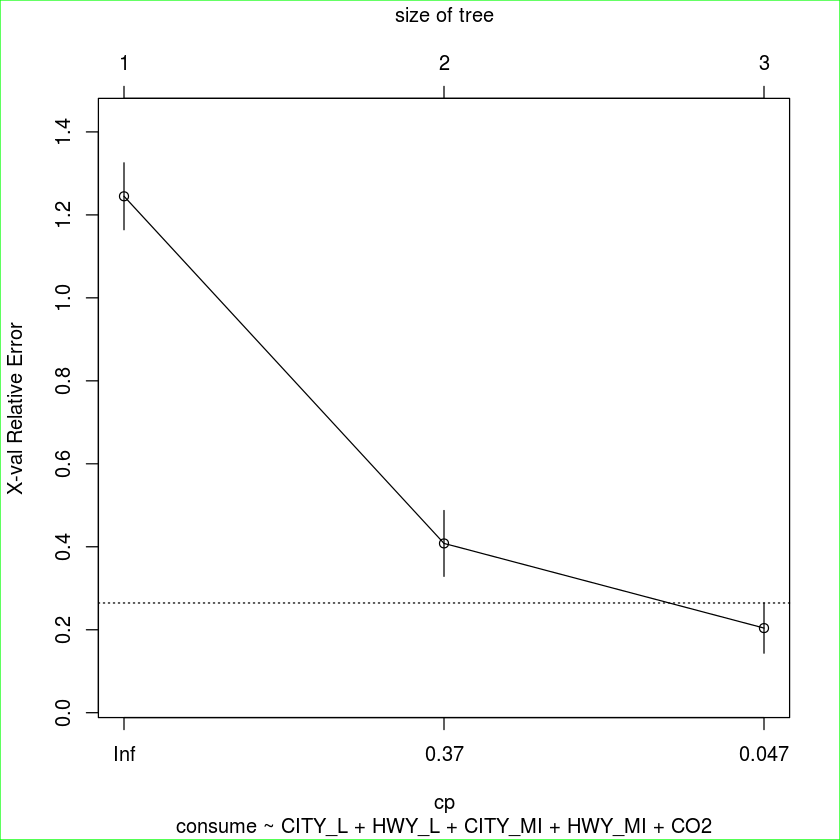

[1] "Possible Models for  STATIONWAGONSMALL  -  36  observation(s)"
[1] "Model :  consume ~ ENG+FUEL+CYLINDERS + Transmission_Type + CVT + Gears"


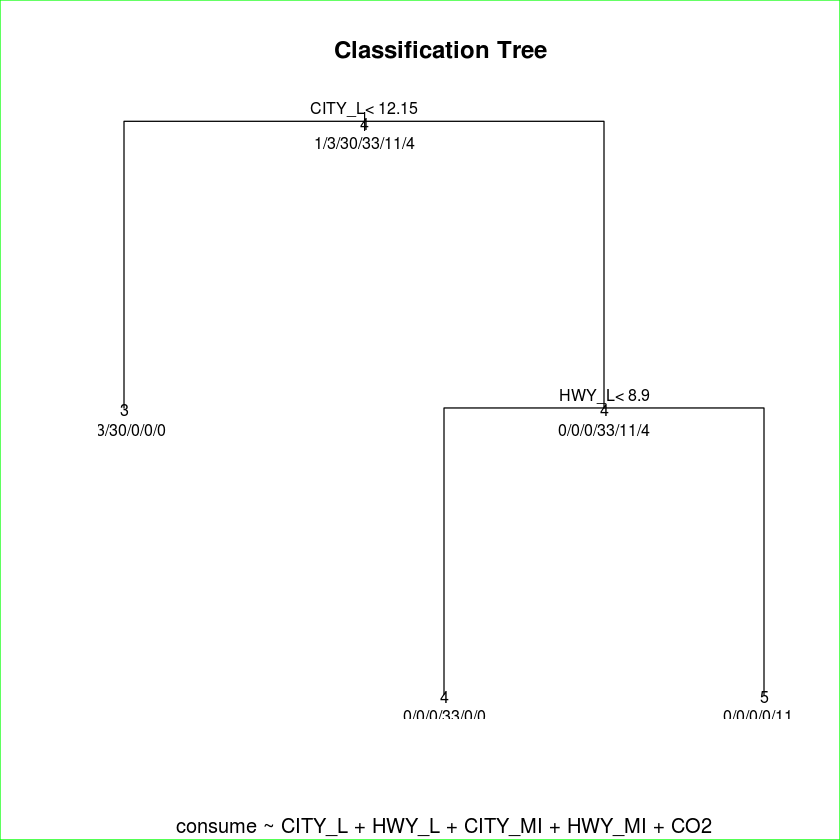


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] ENG   Gears

Root node error: 20/36 = 0.55556

n= 36 

    CP nsplit rel error xerror    xstd
1 0.35      0      1.00   1.35 0.12990
2 0.05      1      0.65   1.00 0.14907
3 0.01      2      0.60   1.15 0.14410


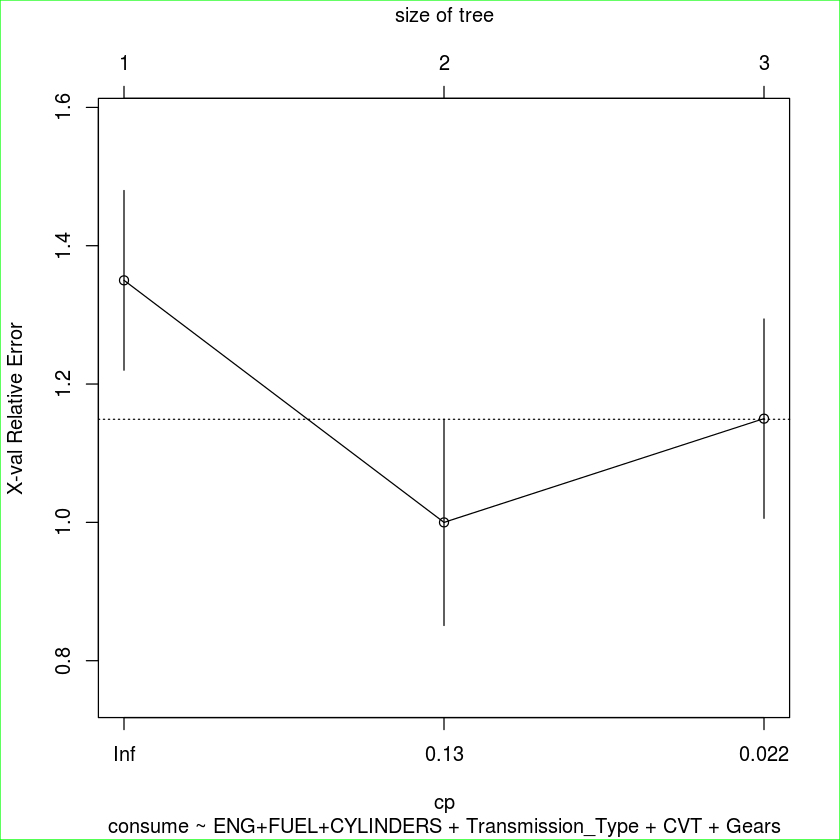

[1] "Model :  consume ~ ENG+FUEL+CYLINDERS"


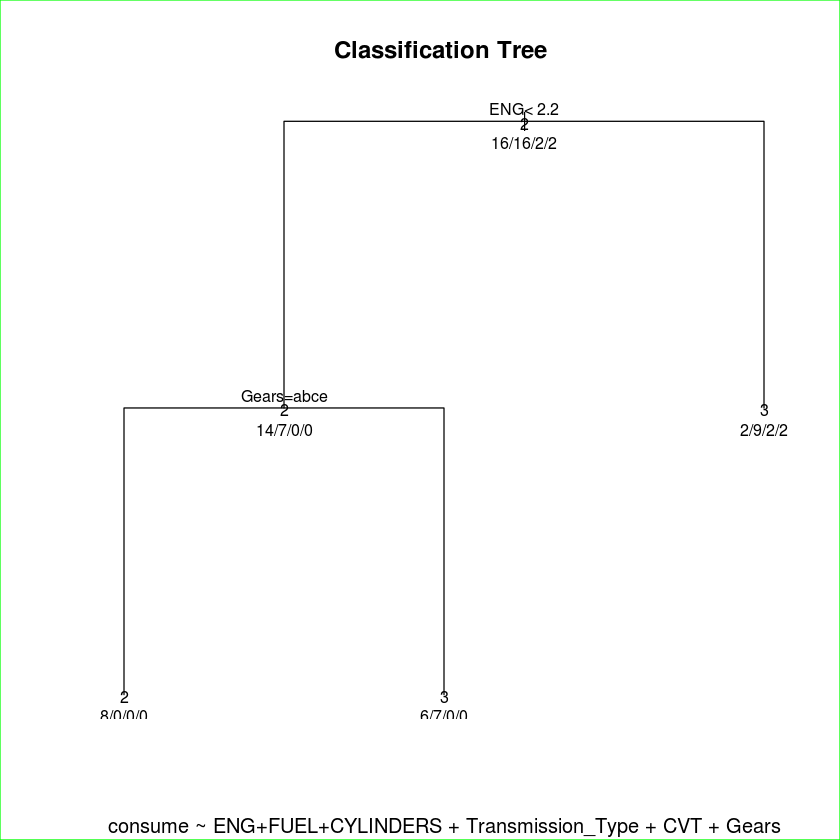


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] ENG

Root node error: 20/36 = 0.55556

n= 36 

    CP nsplit rel error xerror    xstd
1 0.35      0      1.00   1.30 0.13437
2 0.01      1      0.65   0.75 0.14790


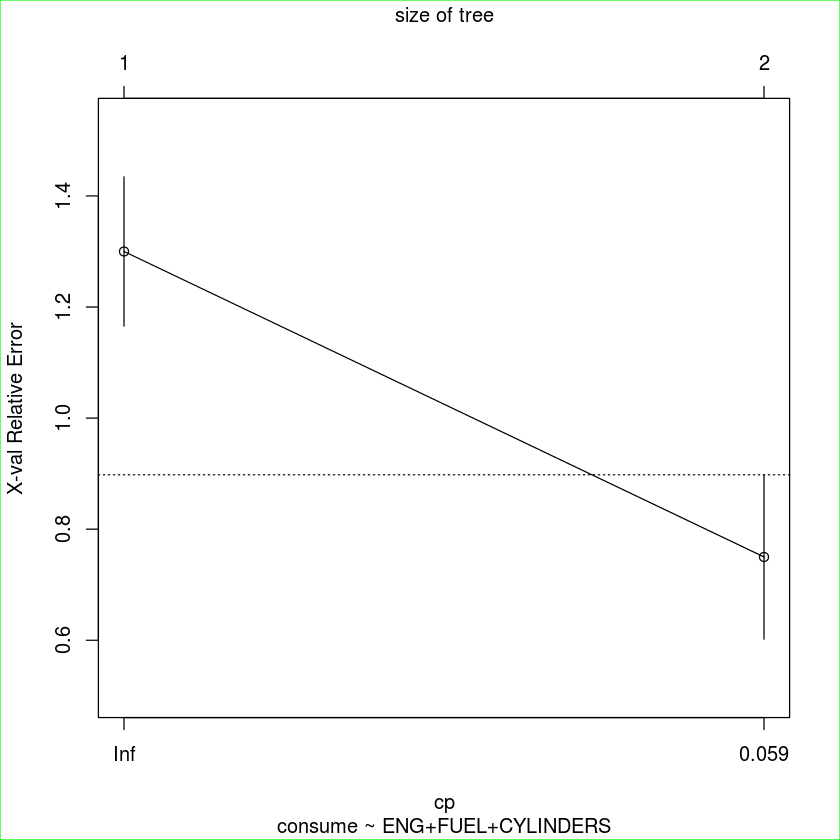

[1] "Model :  consume ~ CITY_L + HWY_L + CITY_MI + HWY_MI + CO2"


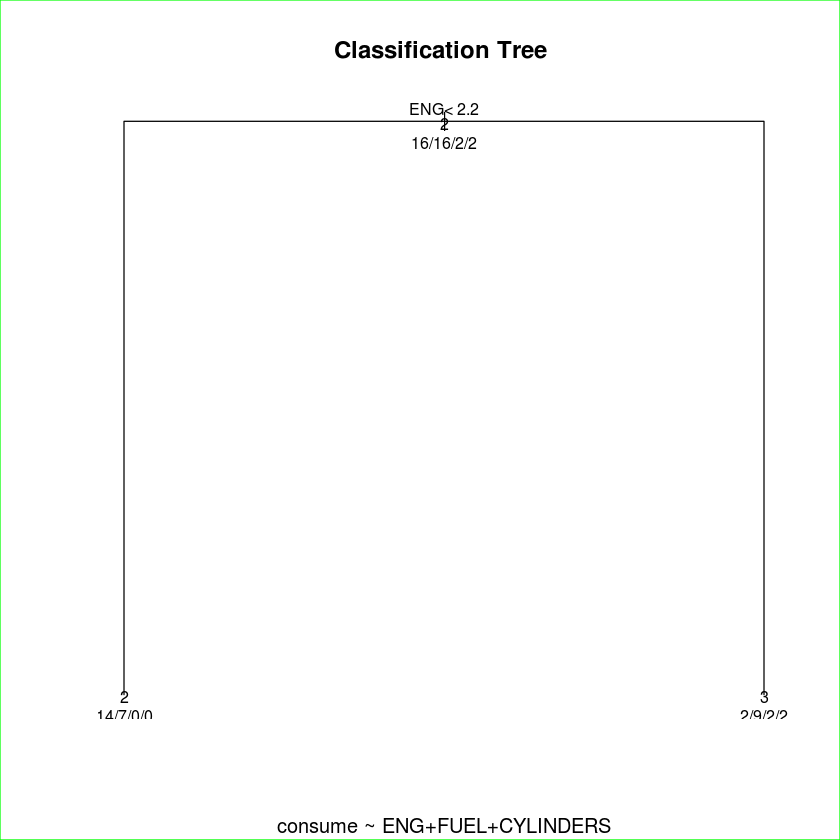


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] CO2

Root node error: 20/36 = 0.55556

n= 36 

    CP nsplit rel error xerror    xstd
1 0.80      0       1.0   1.35 0.12990
2 0.01      1       0.2   0.35 0.11873


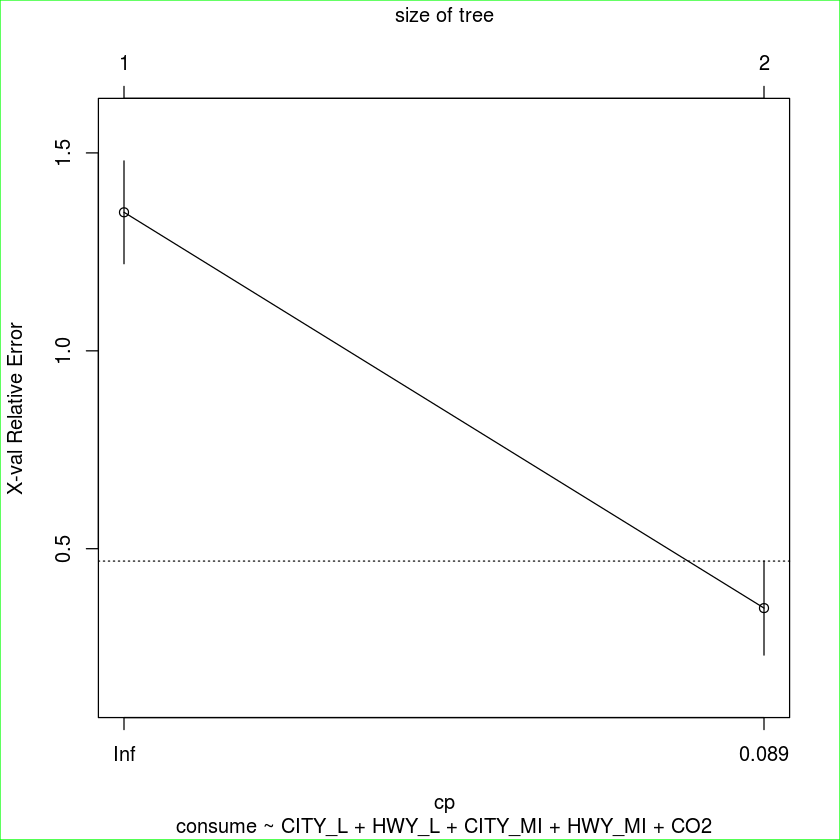

[1] "Possible Models for  SUVSTANDARD  -  112  observation(s)"
[1] "Model :  consume ~ ENG+FUEL+CYLINDERS + Transmission_Type + CVT + Gears"


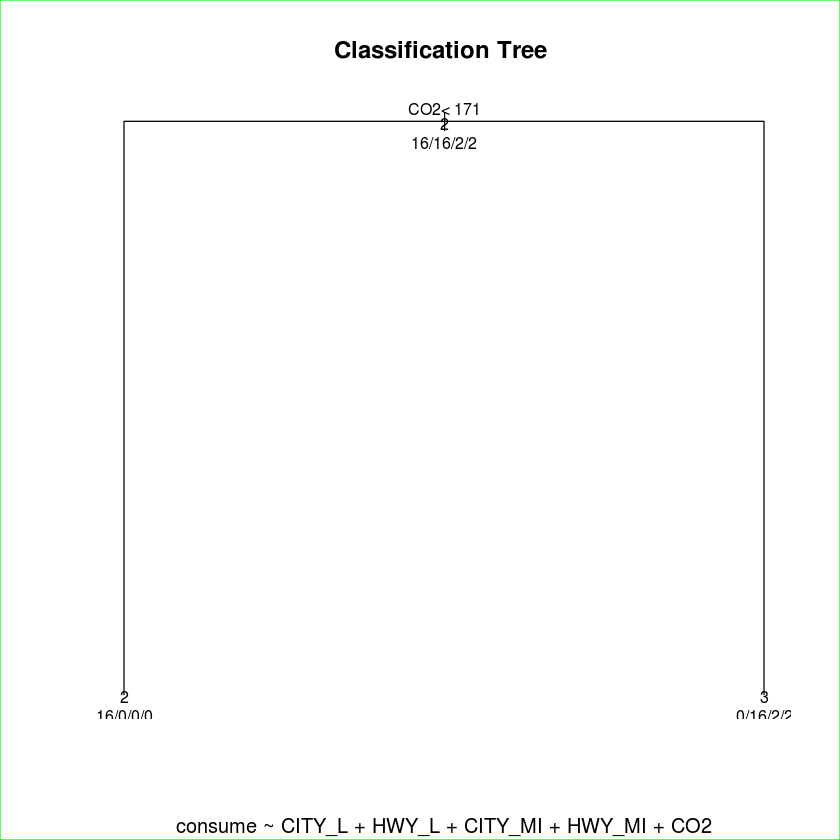


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] ENG  FUEL

Root node error: 65/112 = 0.58036

n= 112 

        CP nsplit rel error  xerror     xstd
1 0.292308      0   1.00000 1.00000 0.080350
2 0.230769      1   0.70769 0.70769 0.080099
3 0.046154      2   0.47692 0.53846 0.075467
4 0.041026      3   0.43077 0.61538 0.078014
5 0.010000      6   0.30769 0.64615 0.078823


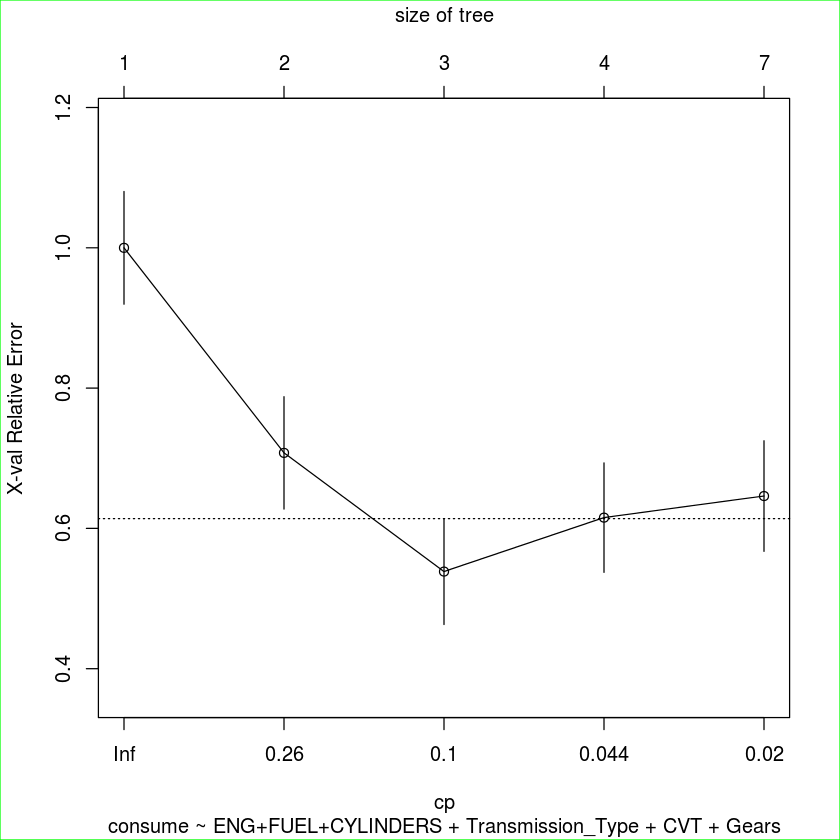

[1] "Model :  consume ~ ENG+FUEL+CYLINDERS"


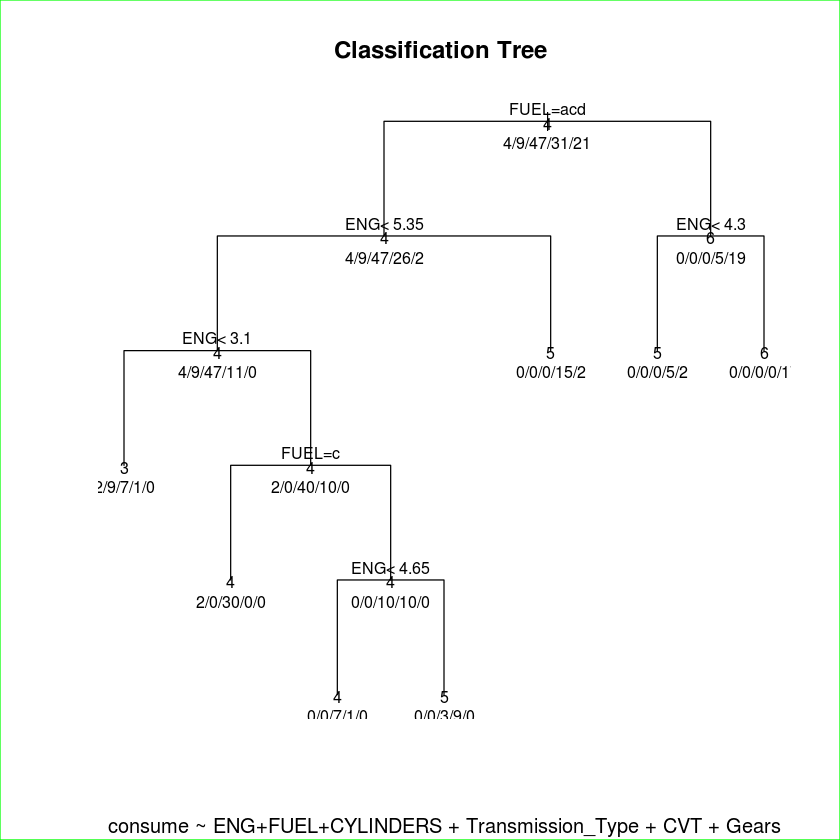


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] ENG  FUEL

Root node error: 65/112 = 0.58036

n= 112 

        CP nsplit rel error  xerror     xstd
1 0.292308      0   1.00000 1.00000 0.080350
2 0.230769      1   0.70769 0.76923 0.080939
3 0.046154      2   0.47692 0.56923 0.076579
4 0.041026      3   0.43077 0.60000 0.077566
5 0.010000      6   0.30769 0.61538 0.078014


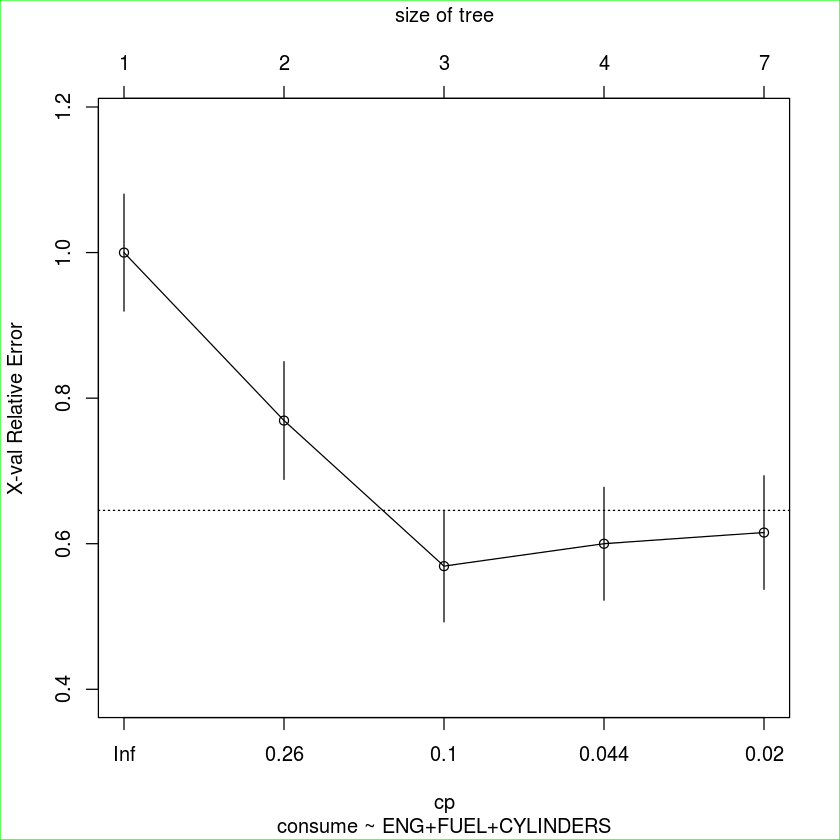

[1] "Model :  consume ~ CITY_L + HWY_L + CITY_MI + HWY_MI + CO2"


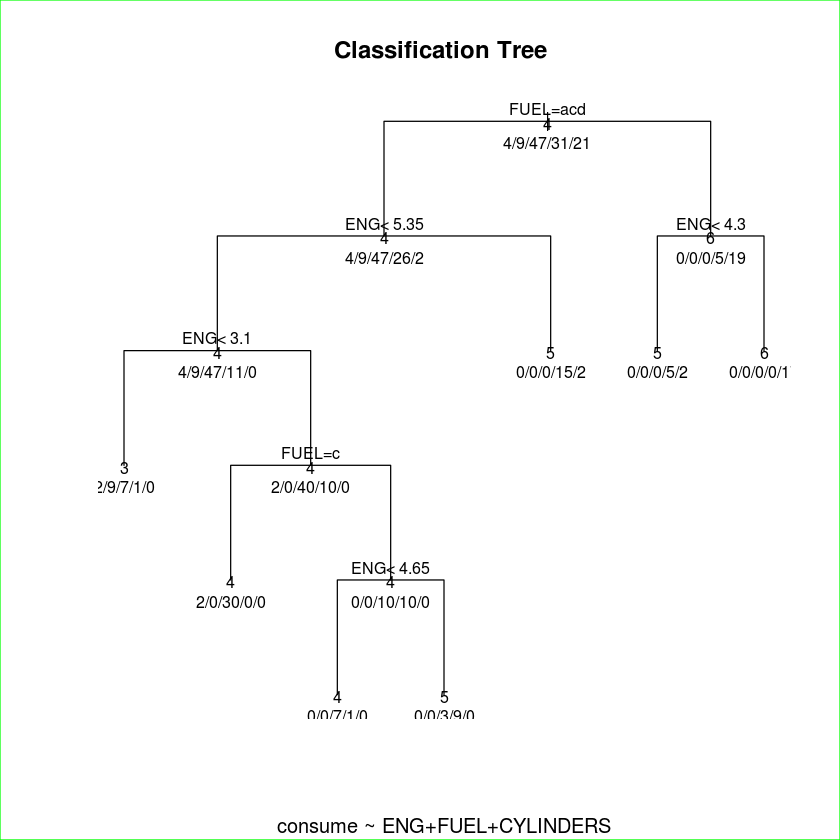


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] CITY_L

Root node error: 65/112 = 0.58036

n= 112 

       CP nsplit rel error  xerror     xstd
1 0.44615      0   1.00000 1.00000 0.080350
2 0.32308      1   0.55385 0.61538 0.078014
3 0.12308      2   0.23077 0.29231 0.061108
4 0.01000      3   0.10769 0.21538 0.053846


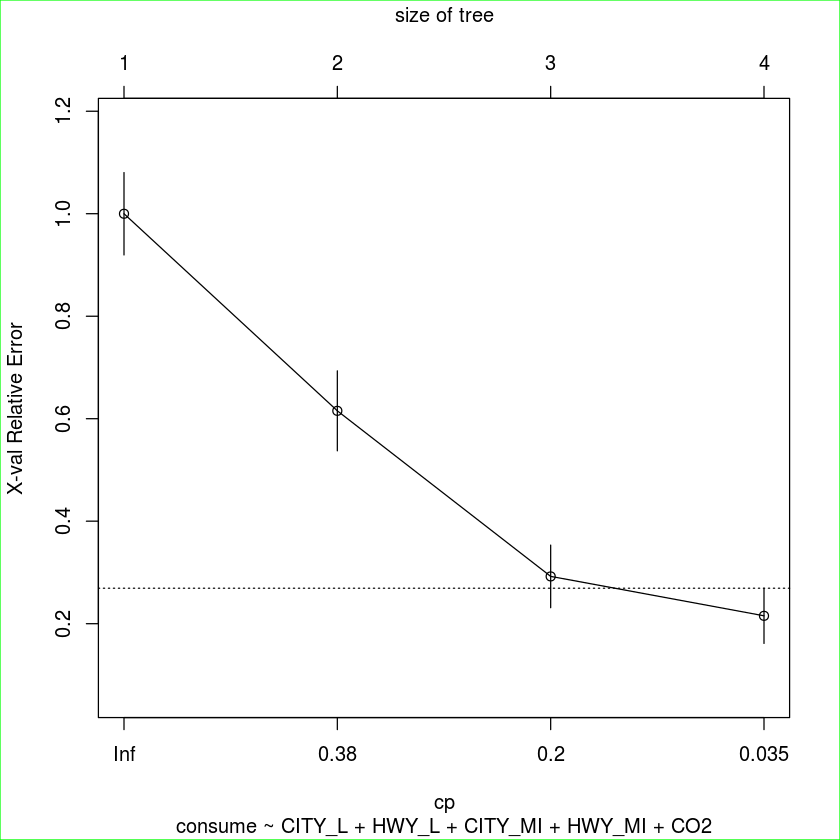

[1] "Possible Models for  VANCARGO  -  26  observation(s)"
[1] "Model :  consume ~ ENG+FUEL+CYLINDERS + Transmission_Type + CVT + Gears"


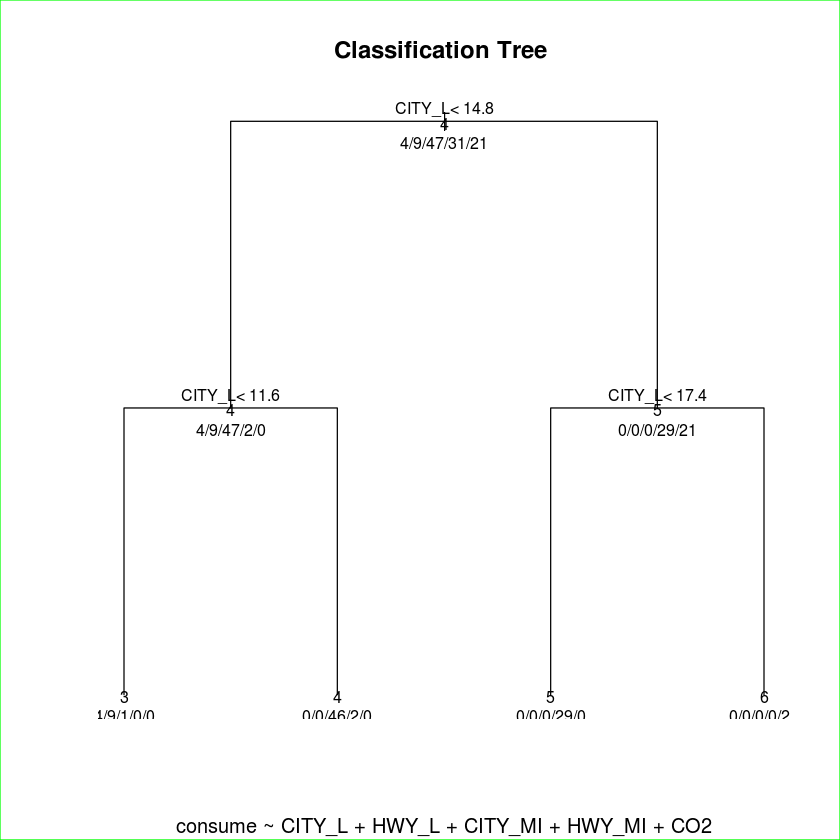


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] FUEL

Root node error: 14/26 = 0.53846

n= 26 

       CP nsplit rel error  xerror    xstd
1 0.42857      0   1.00000 1.00000 0.18157
2 0.01000      1   0.57143 0.57143 0.16810


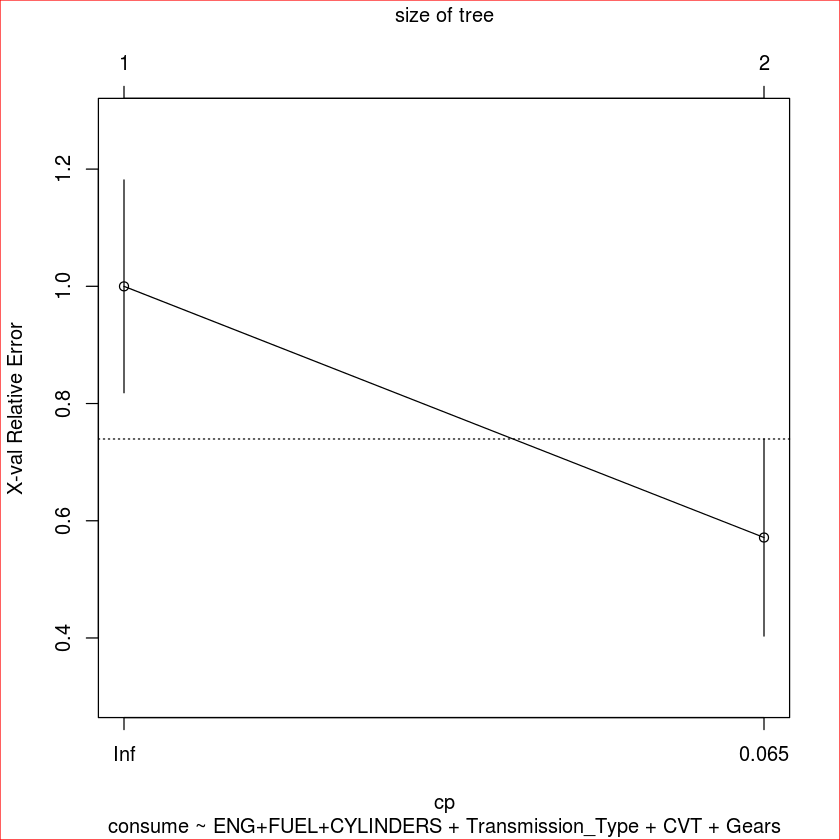

[1] "Model :  consume ~ ENG+FUEL+CYLINDERS"


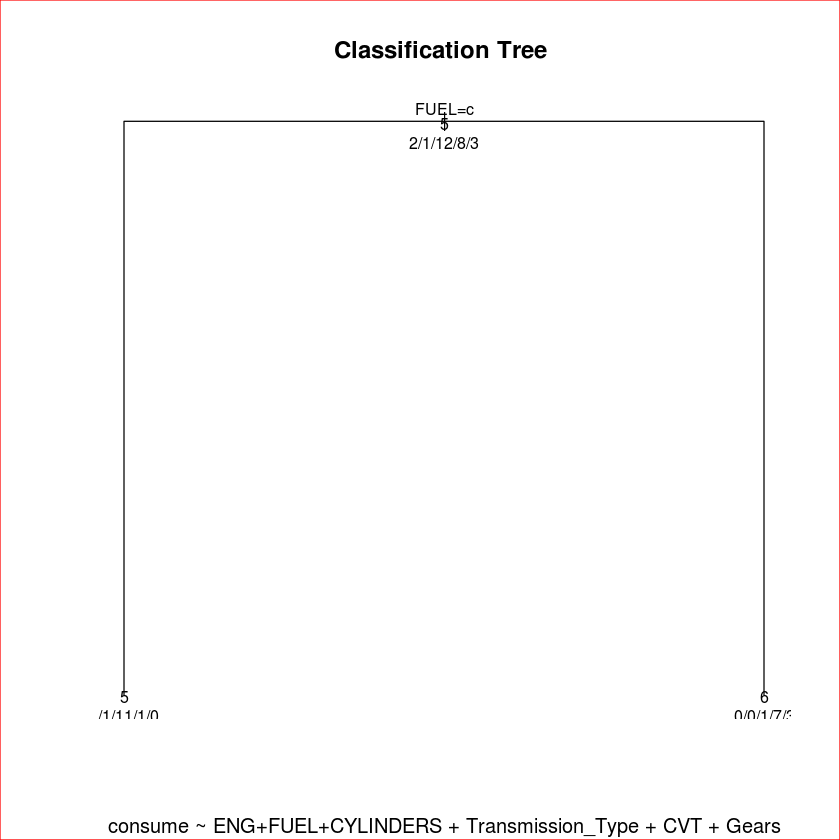


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] FUEL

Root node error: 14/26 = 0.53846

n= 26 

       CP nsplit rel error  xerror    xstd
1 0.42857      0   1.00000 1.00000 0.18157
2 0.01000      1   0.57143 0.57143 0.16810


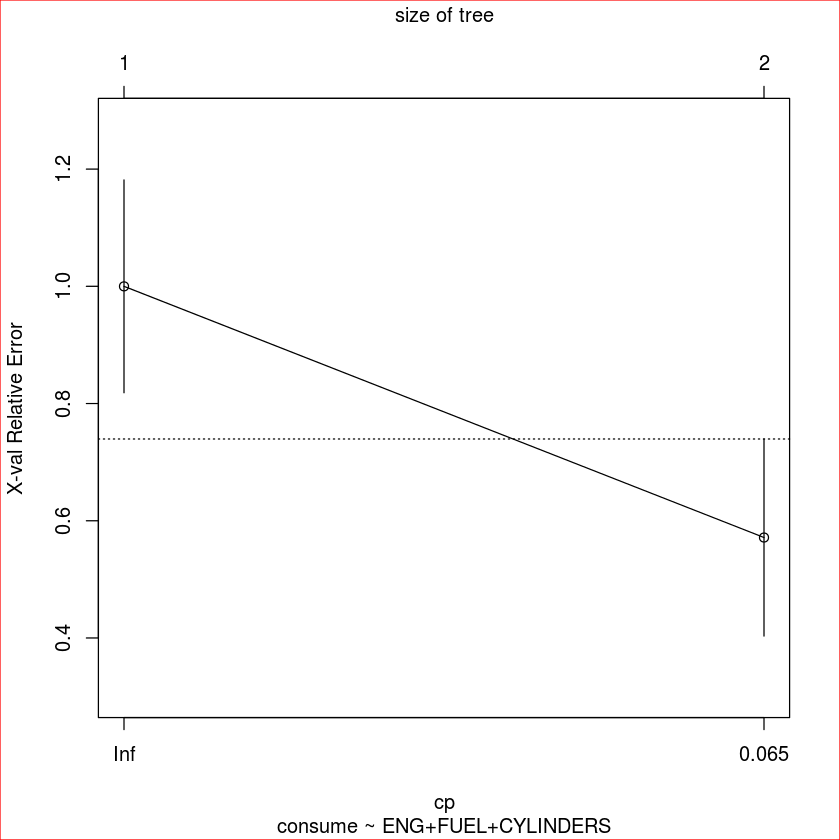

[1] "Model :  consume ~ CITY_L + HWY_L + CITY_MI + HWY_MI + CO2"


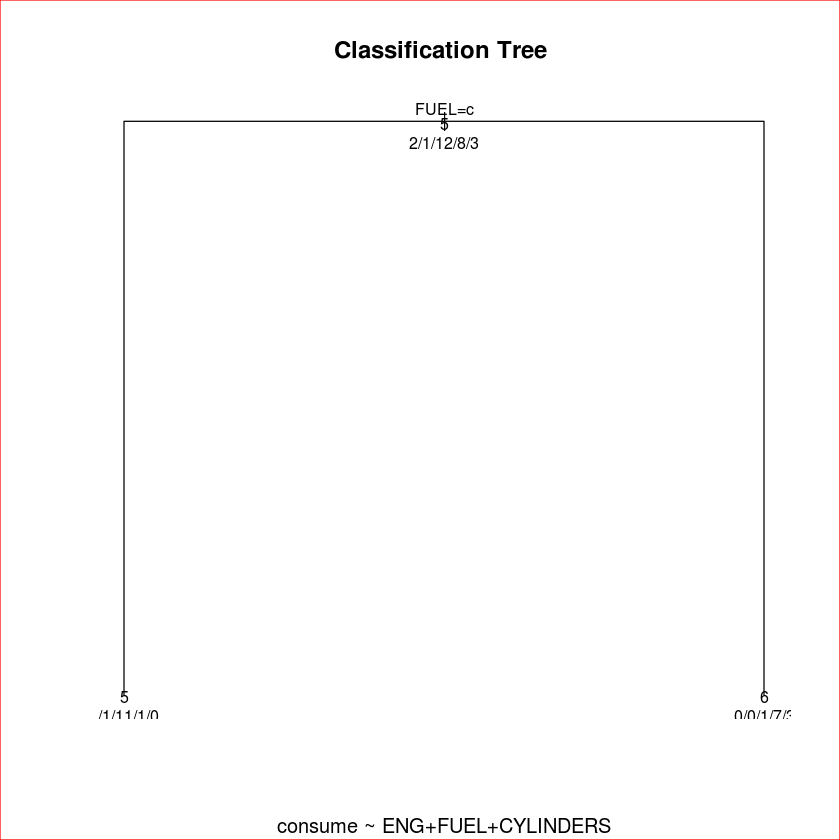


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] CITY_L

Root node error: 14/26 = 0.53846

n= 26 

       CP nsplit rel error xerror    xstd
1 0.57143      0   1.00000    1.0 0.18157
2 0.01000      1   0.42857    0.5 0.16155


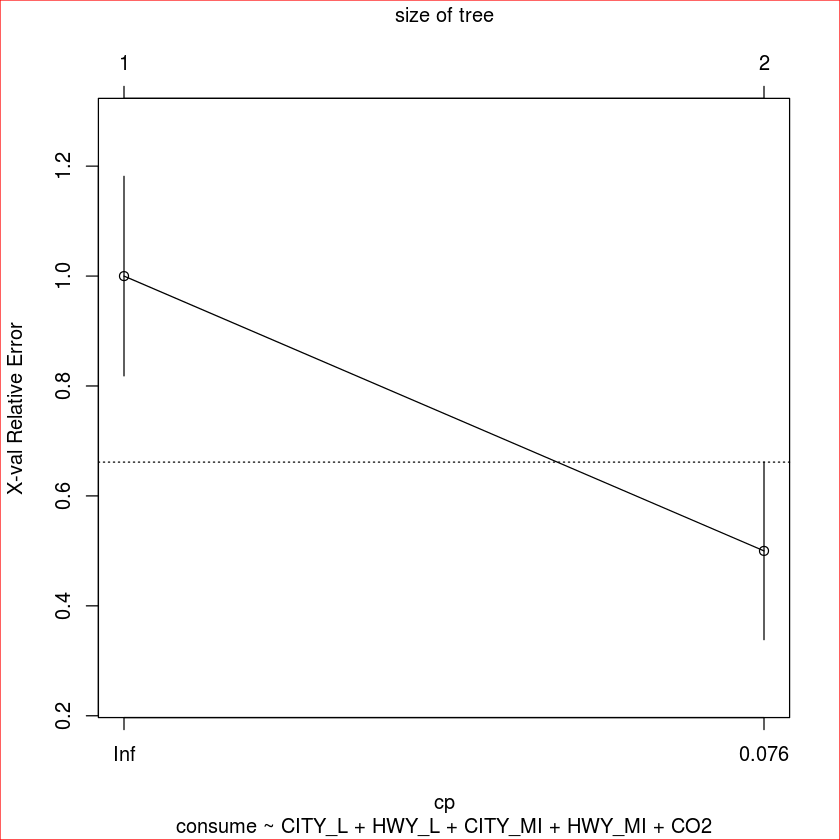

[1] "Possible Models for  VANPASSENGER  -  26  observation(s)"
[1] "Model :  consume ~ ENG+FUEL+CYLINDERS + Transmission_Type + CVT + Gears"


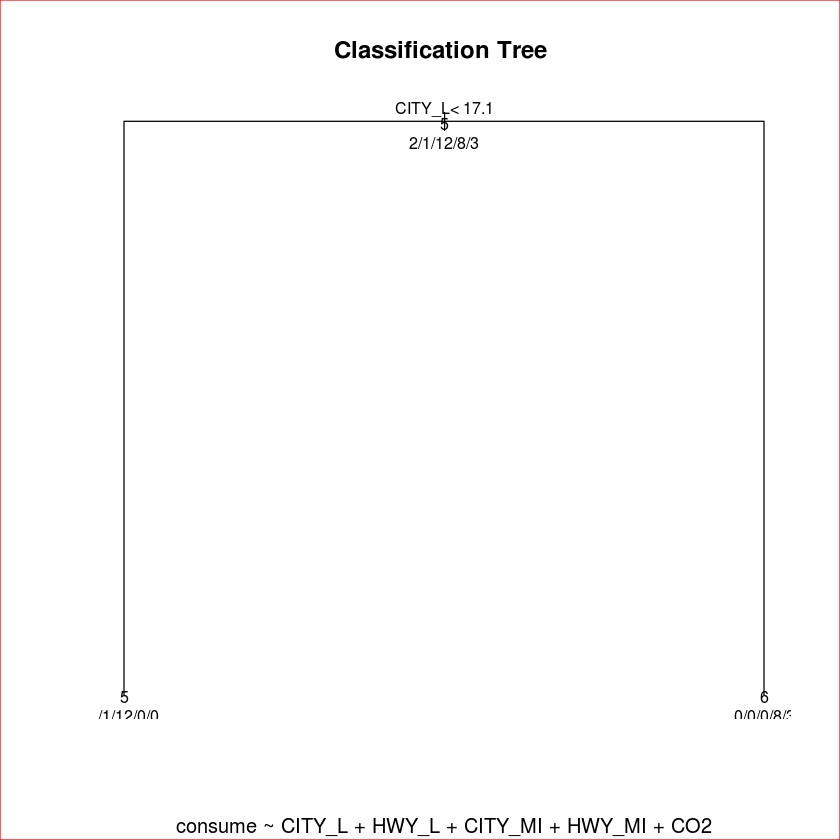


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] FUEL

Root node error: 14/26 = 0.53846

n= 26 

       CP nsplit rel error  xerror    xstd
1 0.42857      0   1.00000 1.00000 0.18157
2 0.01000      1   0.57143 0.57143 0.16810


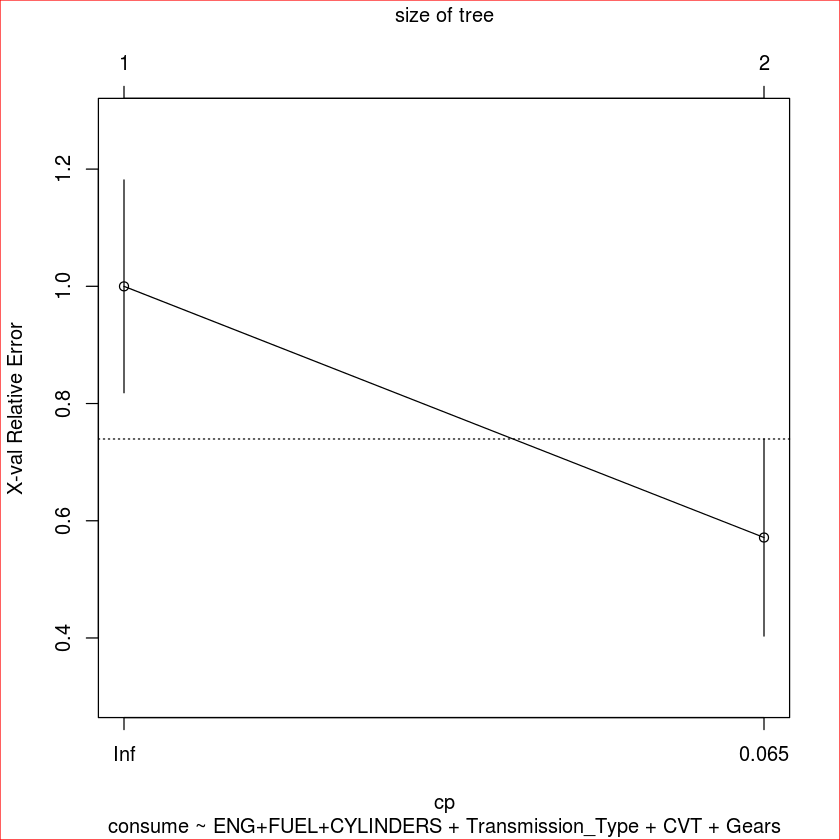

[1] "Model :  consume ~ ENG+FUEL+CYLINDERS"


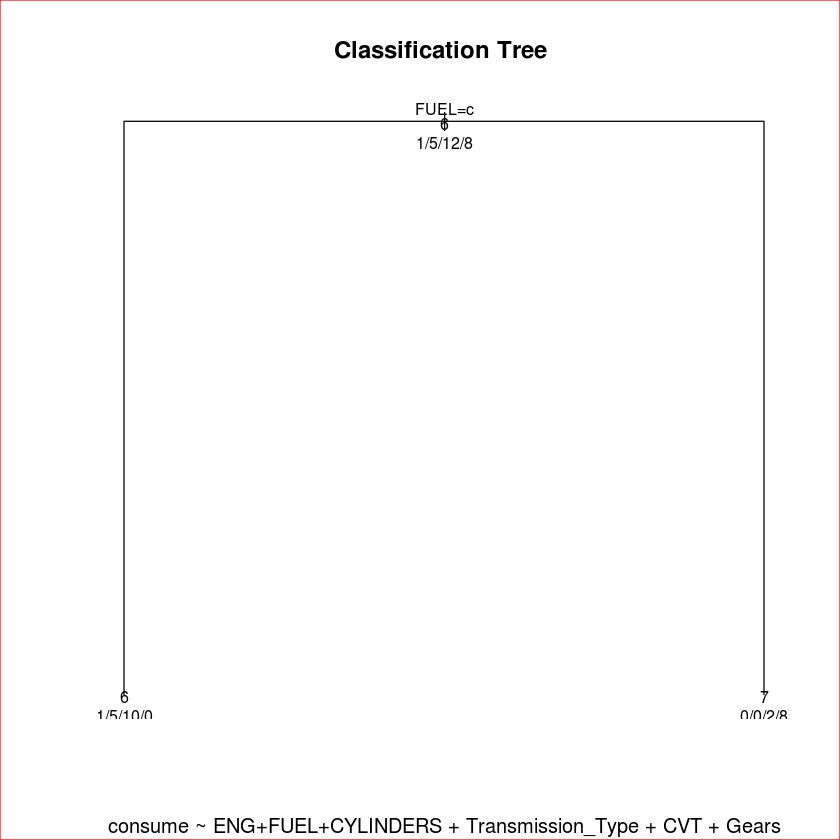


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] FUEL

Root node error: 14/26 = 0.53846

n= 26 

       CP nsplit rel error  xerror    xstd
1 0.42857      0   1.00000 1.00000 0.18157
2 0.01000      1   0.57143 0.57143 0.16810


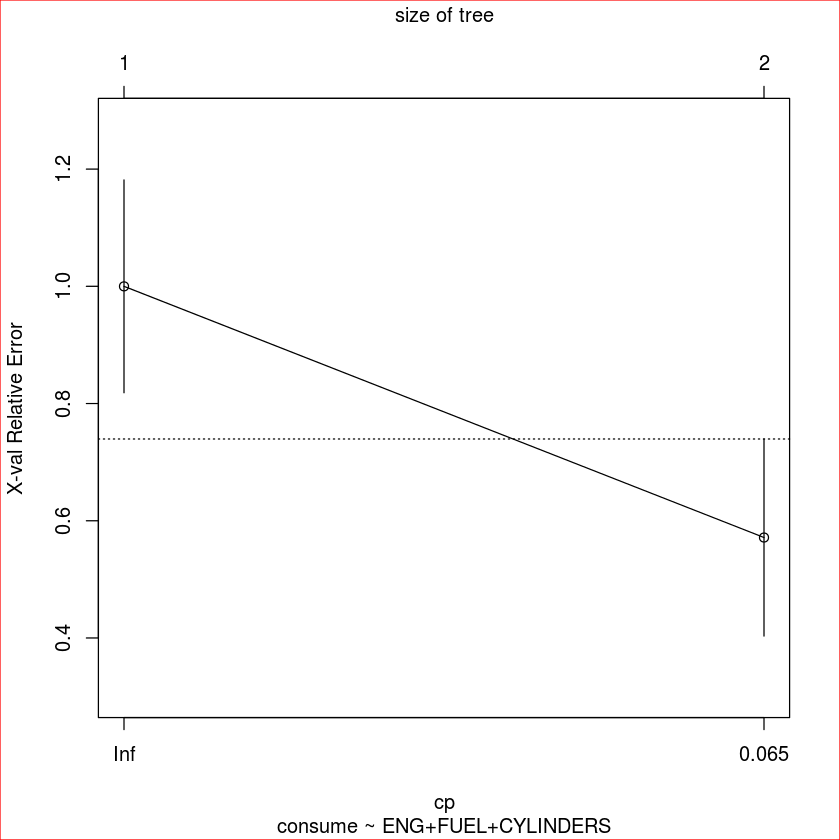

[1] "Model :  consume ~ CITY_L + HWY_L + CITY_MI + HWY_MI + CO2"


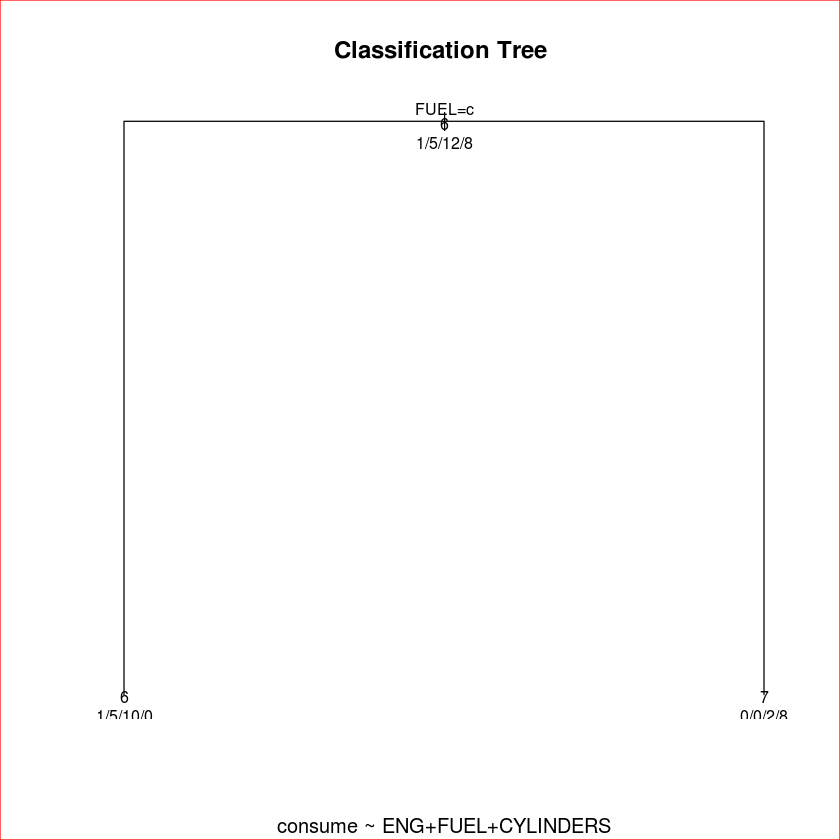


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] CITY_L

Root node error: 14/26 = 0.53846

n= 26 

       CP nsplit rel error  xerror    xstd
1 0.57143      0   1.00000 1.00000 0.18157
2 0.01000      1   0.42857 0.57143 0.16810


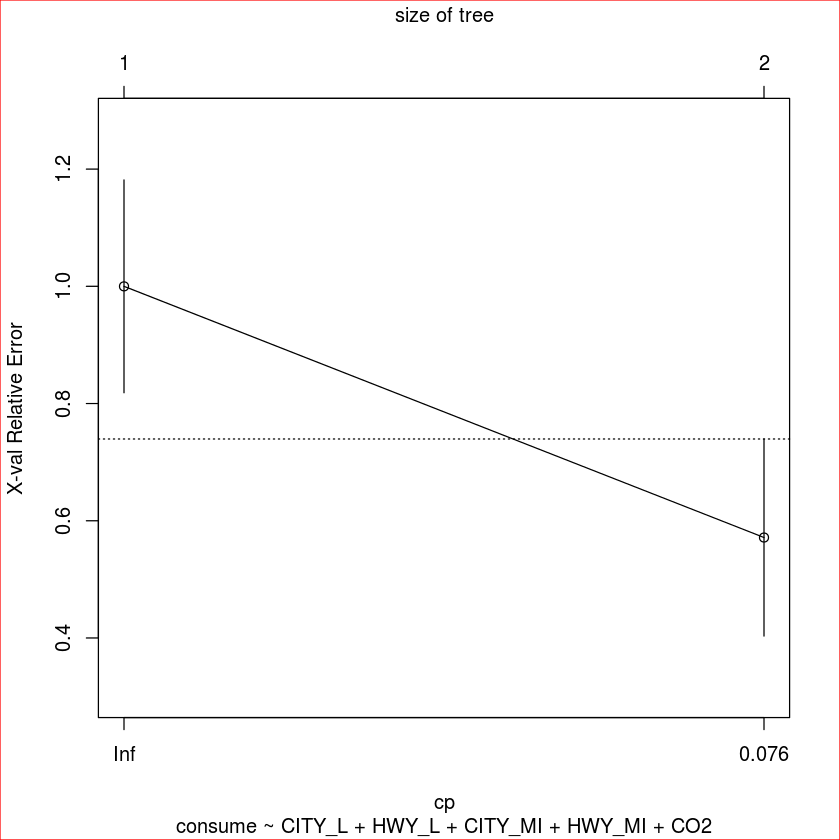

[1] "Possible Models for  PICKUPTRUCKSTANDARD  -  60  observation(s)"
[1] "Model :  consume ~ ENG+FUEL+CYLINDERS + Transmission_Type + CVT + Gears"


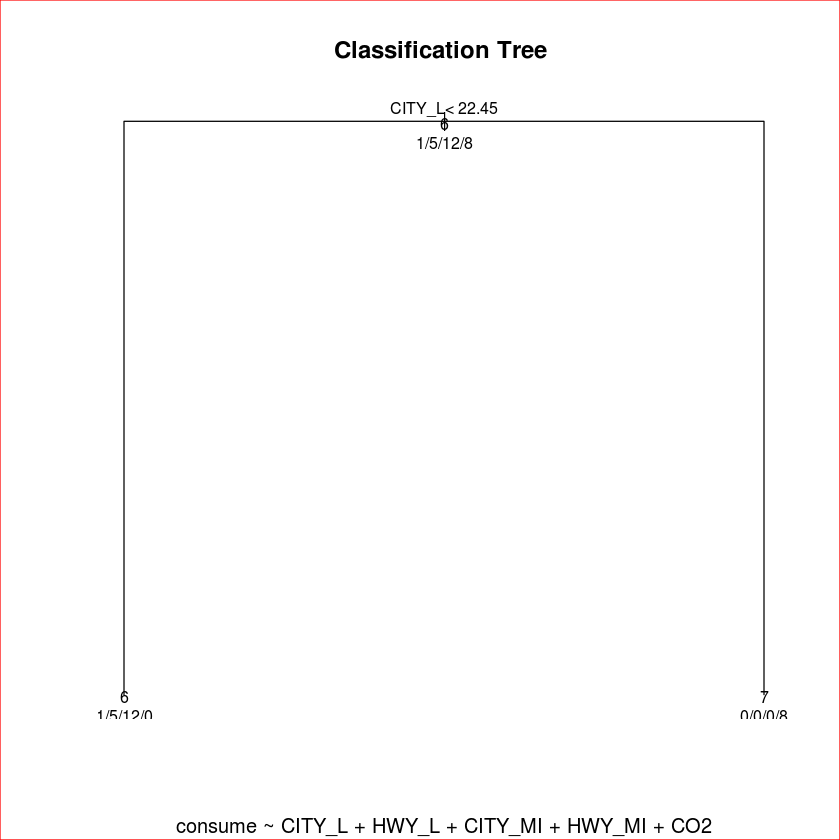


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] CVT  ENG  FUEL

Root node error: 36/60 = 0.6

n= 60 

        CP nsplit rel error  xerror    xstd
1 0.305556      0   1.00000 1.00000 0.10541
2 0.166667      1   0.69444 0.69444 0.10608
3 0.027778      2   0.52778 0.52778 0.10009
4 0.010000      3   0.50000 0.61111 0.10369


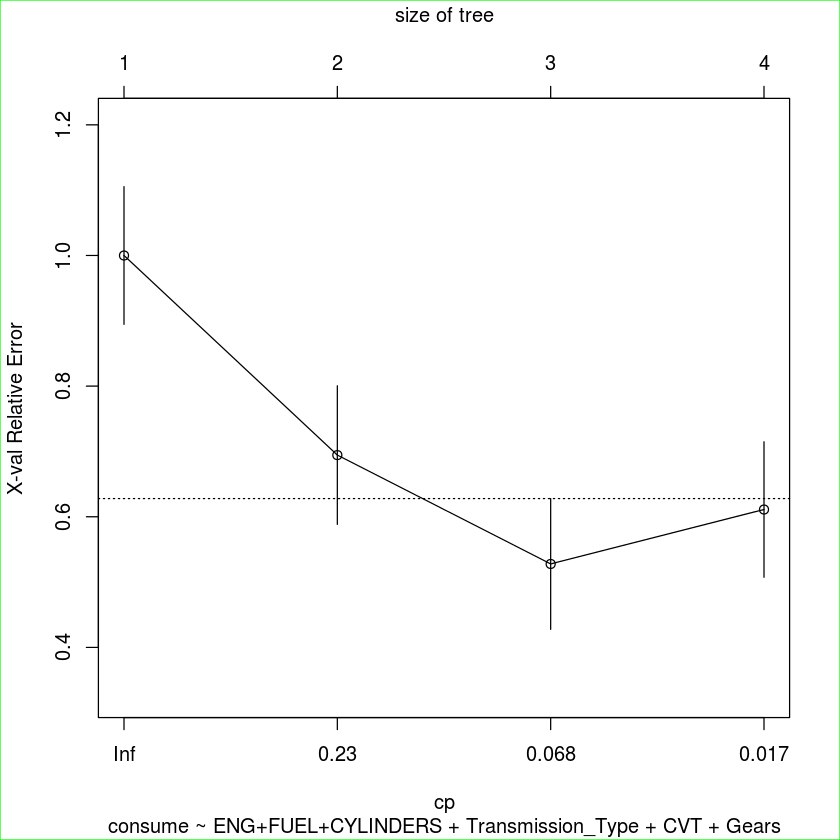

[1] "Model :  consume ~ ENG+FUEL+CYLINDERS"


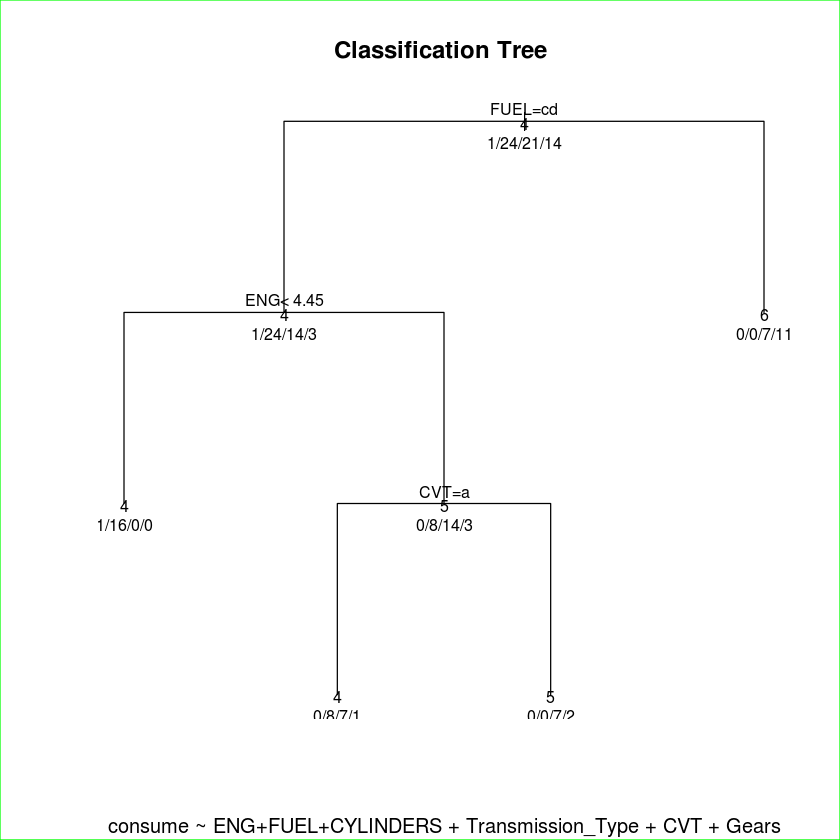


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] ENG  FUEL

Root node error: 36/60 = 0.6

n= 60 

       CP nsplit rel error  xerror    xstd
1 0.30556      0   1.00000 1.11111 0.10143
2 0.16667      1   0.69444 0.80556 0.10752
3 0.01000      2   0.52778 0.63889 0.10461


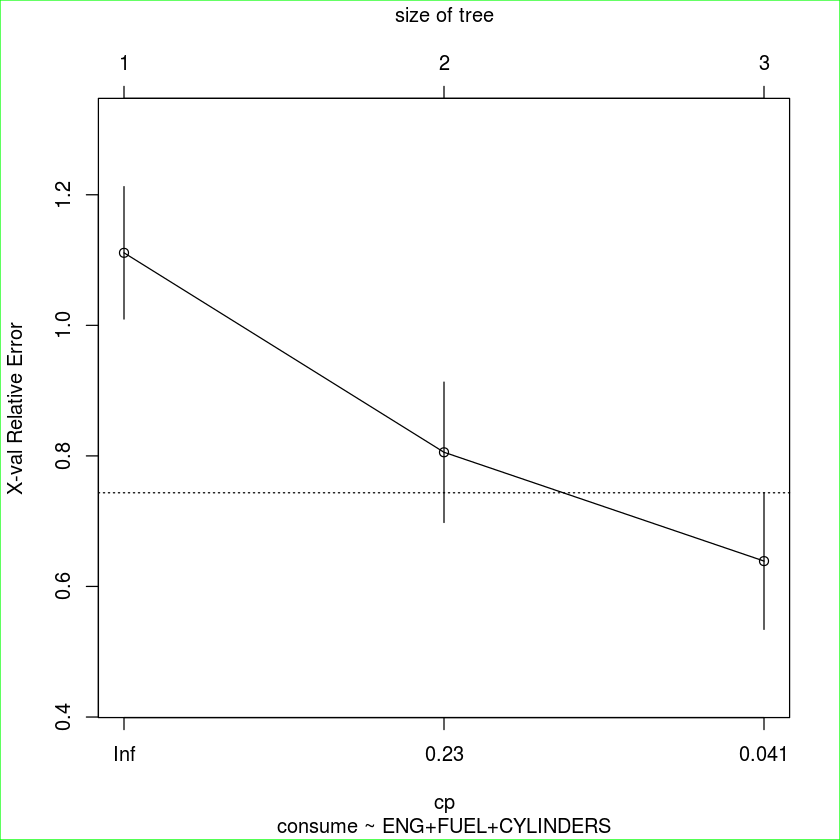

[1] "Model :  consume ~ CITY_L + HWY_L + CITY_MI + HWY_MI + CO2"


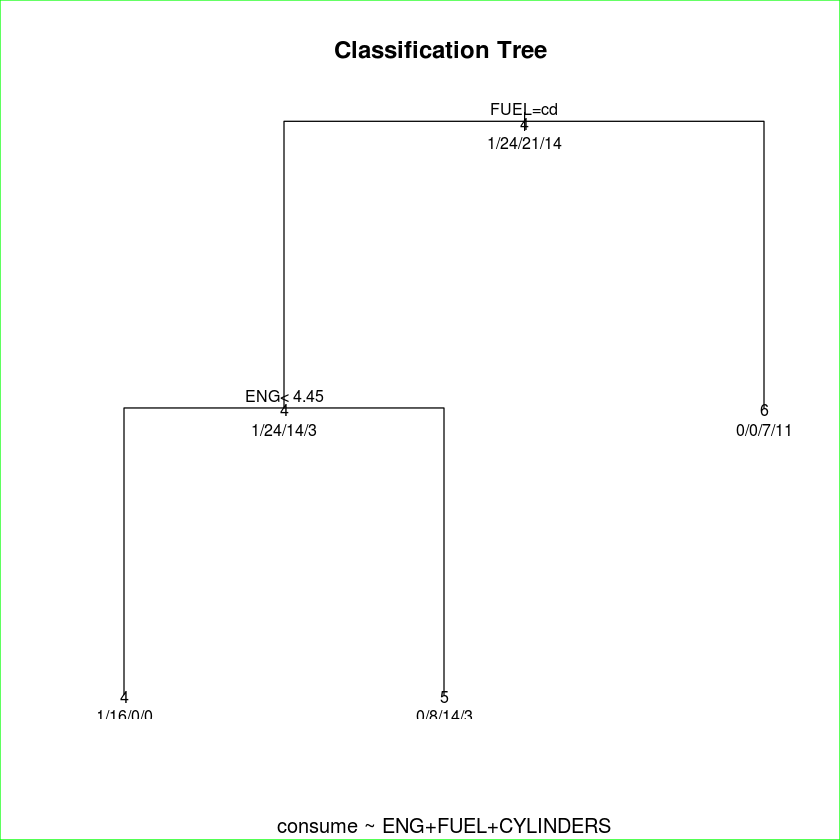


Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
[1] CITY_L HWY_L 

Root node error: 36/60 = 0.6

n= 60 

       CP nsplit rel error   xerror     xstd
1 0.55556      0  1.000000 1.000000 0.105409
2 0.38889      1  0.444444 0.472222 0.096957
3 0.01000      2  0.055556 0.083333 0.046894


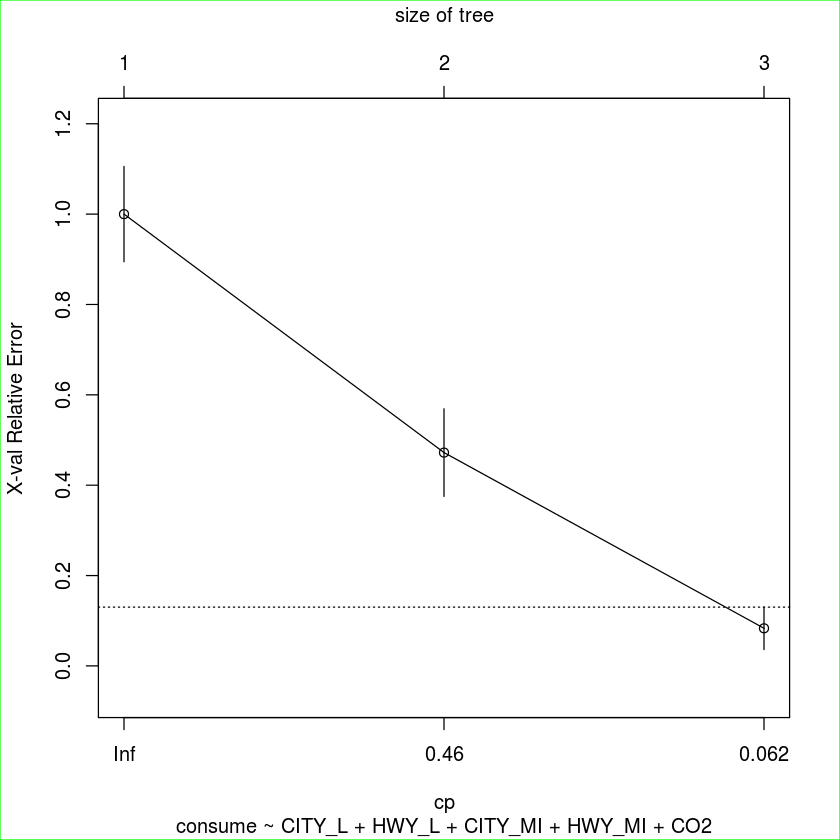

[1] "Possible Models for  MINIVAN  -  12  observation(s)"
[1] "Model :  consume ~ ENG+FUEL+CYLINDERS + Transmission_Type + CVT + Gears"

Classification tree:
rpart(formula = possible_model, data = fuelgroupdata, method = "class", 
    control = rpart.control())

Variables actually used in tree construction:
character(0)

Root node error: 7/12 = 0.58333

n= 12 

    CP nsplit rel error xerror xstd
1 0.01      0         1      0    0


ERROR: Error in plot.rpart(model, uniform = TRUE): fit is not a tree, just a root


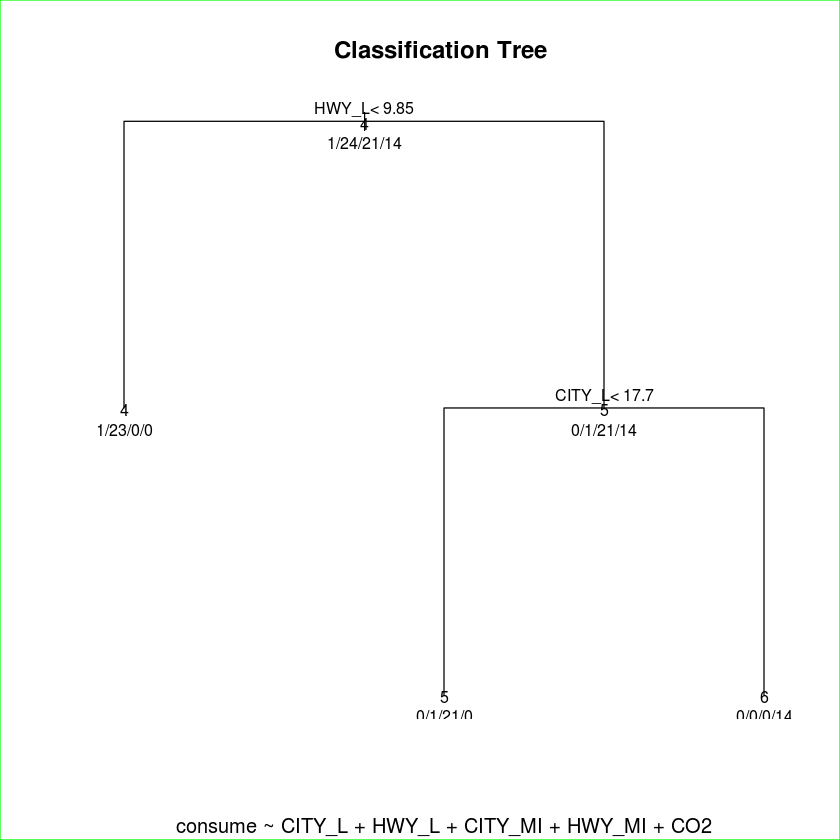

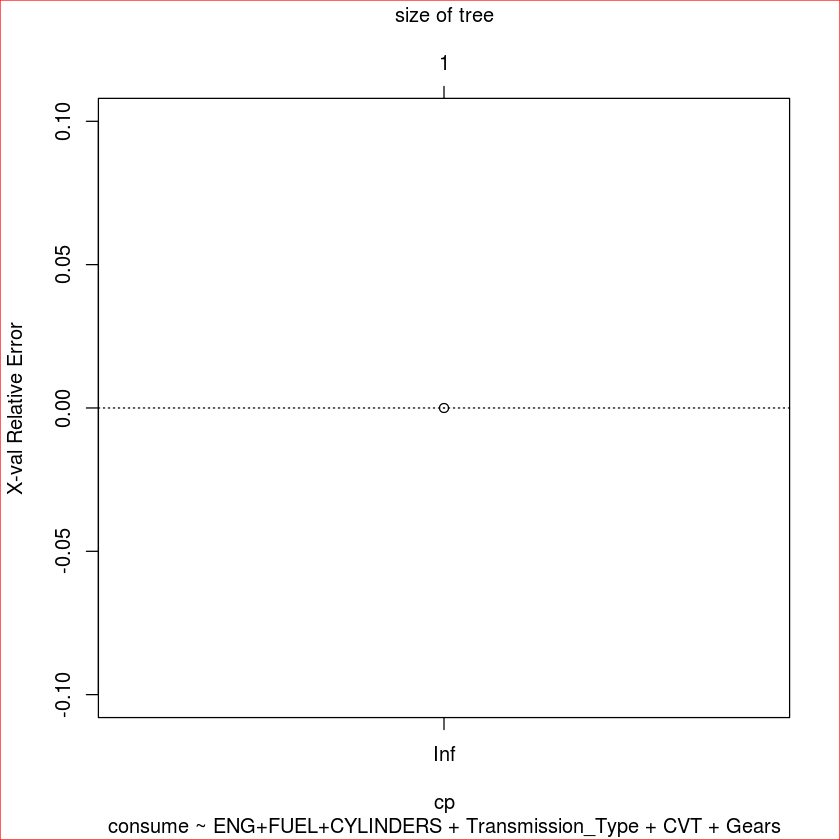

In [73]:
model_errors = c()


println()
for(fuelgroup in unique(fueldata5$CLASS)){
    fuelgroupdata = subset(fueldata5,CLASS==fuelgroup)
    #sqldf(sprintf("select * from fueldata5 where CLASS='%s'",fuelgroup))
    fuelgroupsize = nrow(fuelgroupdata)
    print(paste('Possible Models for ',fuelgroup,' - ',fuelgroupsize,' observation(s)'))
   
    if(fuelgroupsize == 0){
        
        break
    }
    
    for(possible_model in possible_models_per_class){
        print(paste('Model : ',possible_model))
        
        model = rpart(possible_model,data=fuelgroupdata,method="class",
                      control=rpart.control(
                          #minsplit=0.1*fuelgroupsize
                          #minbucket=100,
                          #xval=10 #10 Fold Validation
                      ))
        plotcp(model,main="",sub=possible_model)
        if(fuelgroupsize > 30){
            box("outer",col="green")
        }else{
            box("outer",col="red")
        }
        
        printcp(model)
        plot(model, uniform=TRUE)
        title(main=sprintf("Classification Tree "),sub=possible_model)
        text(model, use.n=TRUE, all=TRUE, cex=.8)
        if(fuelgroupsize > 30){
            box("outer",col="green")
        }else{
            box("outer",col="red")
        }
        println()

          
   }
  
}